## Use of linear Regression to predict a time serie

       V1       
 Min.   :10.05  
 1st Qu.:21.53  
 Median :35.75  
 Mean   :35.00  
 3rd Qu.:47.33  
 Max.   :60.36  

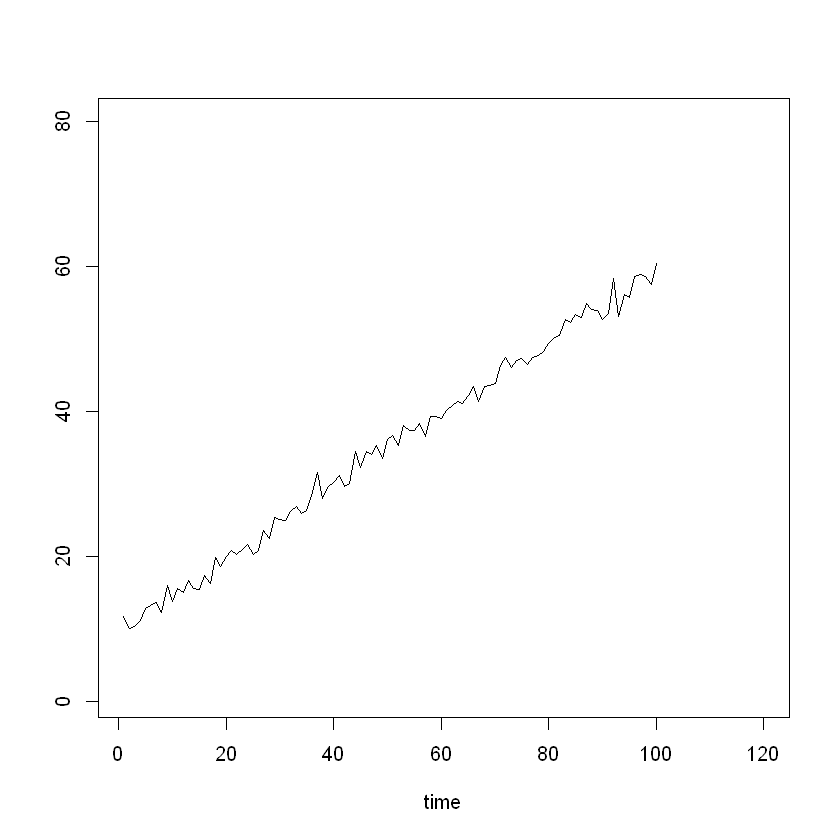

In [11]:
data_serie=read.table(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/serie1.txt")
plot(data_serie$V1,type='l',xlim=c(1,120),ylim=c(1,80),xlab='time',ylab='')
summary(data_serie)

In [2]:
head(data)

,V1
,<dbl>
1,11.71048
2,10.05097
3,10.37200
4,11.24996
5,12.86221
6,13.24769


In [14]:
t=1:100
x=data_serie$V1
model=lm(x~t)

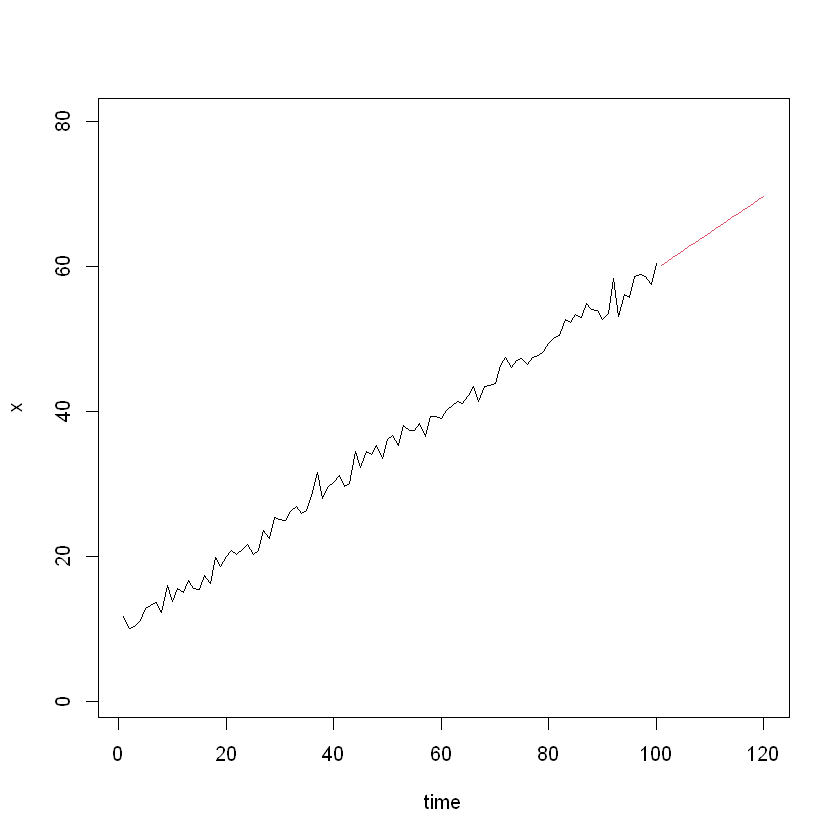

In [17]:
newt=data.frame(t=101:120)
p=predict(model,newt)
plot(t,x,type='l',xlim=c(1,120),ylim=c(1,80),xlab='time')
lines(newt$t,p,col=2)

## Creation of a Time Serie

In [18]:
Air = data("AirPassengers")

In [20]:
str(AirPassengers)

 Time-Series [1:144] from 1949 to 1961: 112 118 132 129 121 135 148 148 136 119 ...


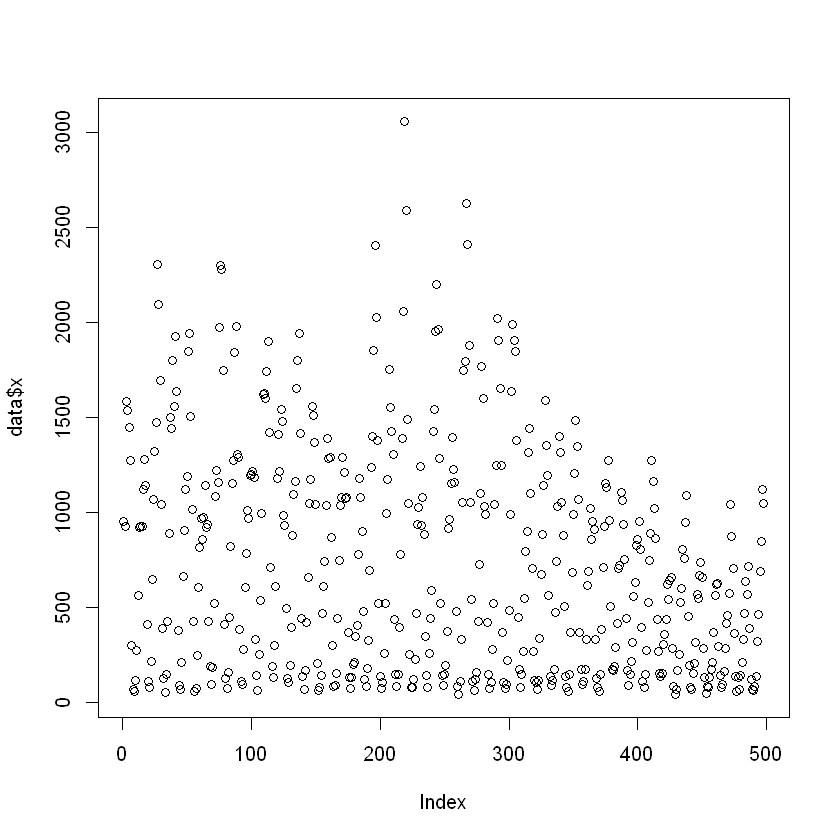

In [21]:
data=read.csv(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/varicelle.csv")
plot(data$x)


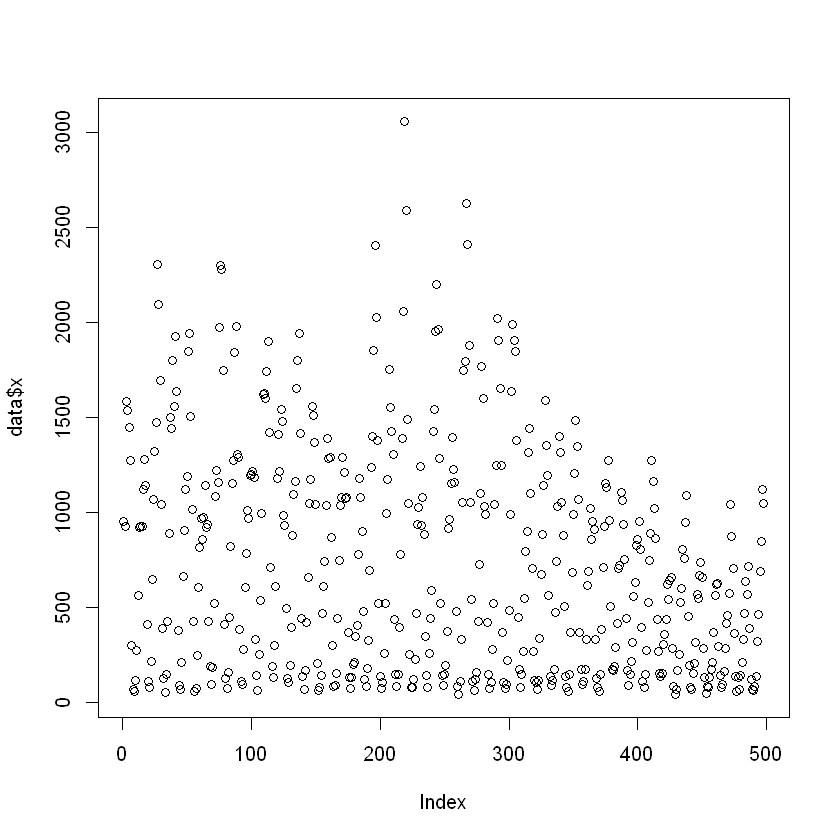

In [43]:
data=read.csv(file="varicelle.csv")
plot(data$x)


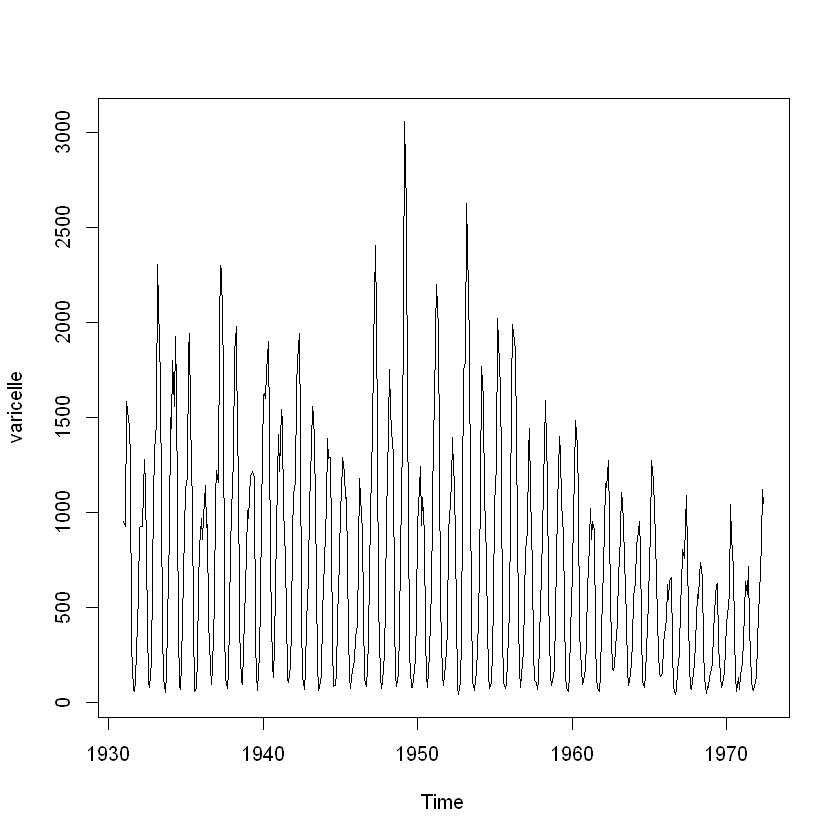

In [22]:
varicelle<-ts(data$x,start=c(1931,1),end=c(1972,6),freq=12)
plot(varicelle)

In [9]:
library(forecast)
library(ggplot2)
autoplot(varicelle) +
ggtitle('Number of varicella per months')+
xlab('year')+
ylab('Number of varicella')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: Error in autoplot(varicelle): objet 'varicelle' introuvable


In [25]:
install.packages('forecast')

Installing package into 'C:/Users/erick/R'
(as 'lib' is unspecified)

also installing the dependencies 'xts', 'TTR', 'quadprog', 'quantmod', 'fracdiff', 'lmtest', 'timeDate', 'tseries', 'urca', 'zoo'





  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.12   8.13              TRUE

  Binaries will be installed
package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erick\AppData\Local\Temp\Rtmp29aZBp\downloaded_packages


### Seasonal plot

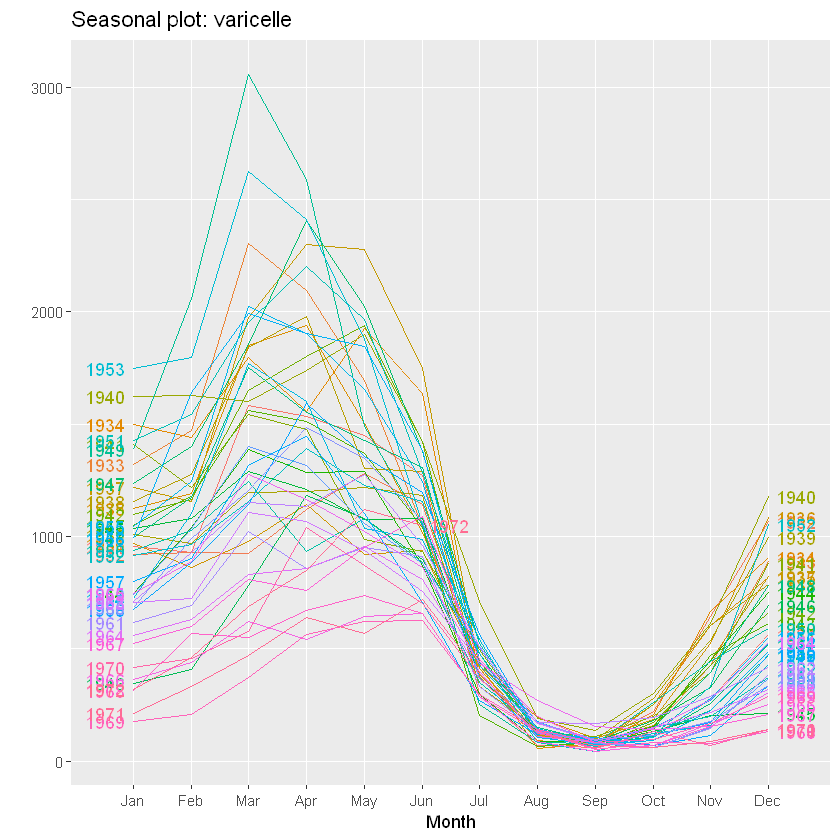

In [28]:
ggseasonplot(varicelle,year.labels= TRUE,year.labels.left=TRUE)

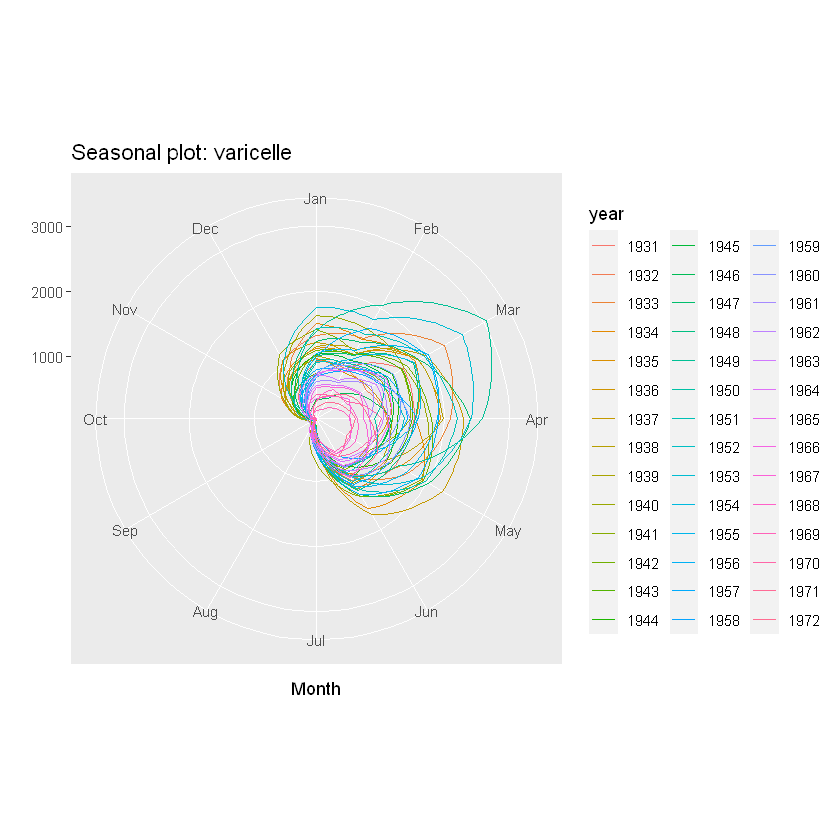

In [29]:
ggseasonplot(varicelle,polar=TRUE)

In [30]:
mean(varicelle)

[1] 732.4076

In [32]:
var(varicelle)

[1] 347785.4

### Auto Covariance - Correlogram

In [34]:
tmp=acf(varicelle,type="cov",plot = FALSE)
tmp$acf[1:3,1,1]

[1] 347087.0 291348.5 179126.1

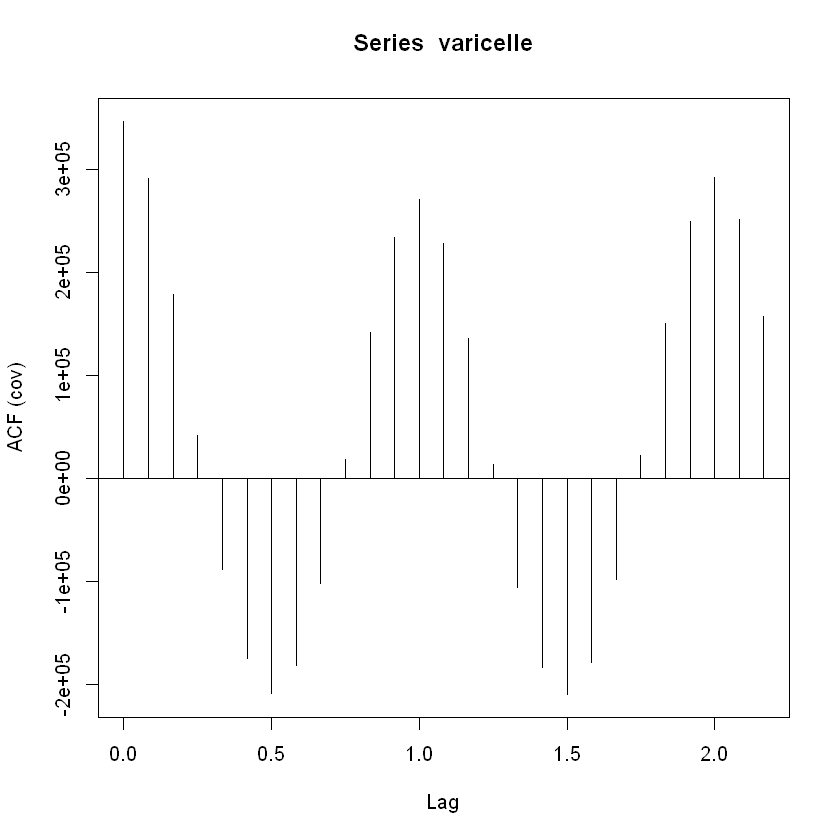

In [35]:
plot(tmp)

### Auto-correlation

In [36]:
tmp=acf(varicelle,type="cor",plot = FALSE)
tmp$acf[1:3,1,1]

[1] 1.0000000 0.8394105 0.5160841

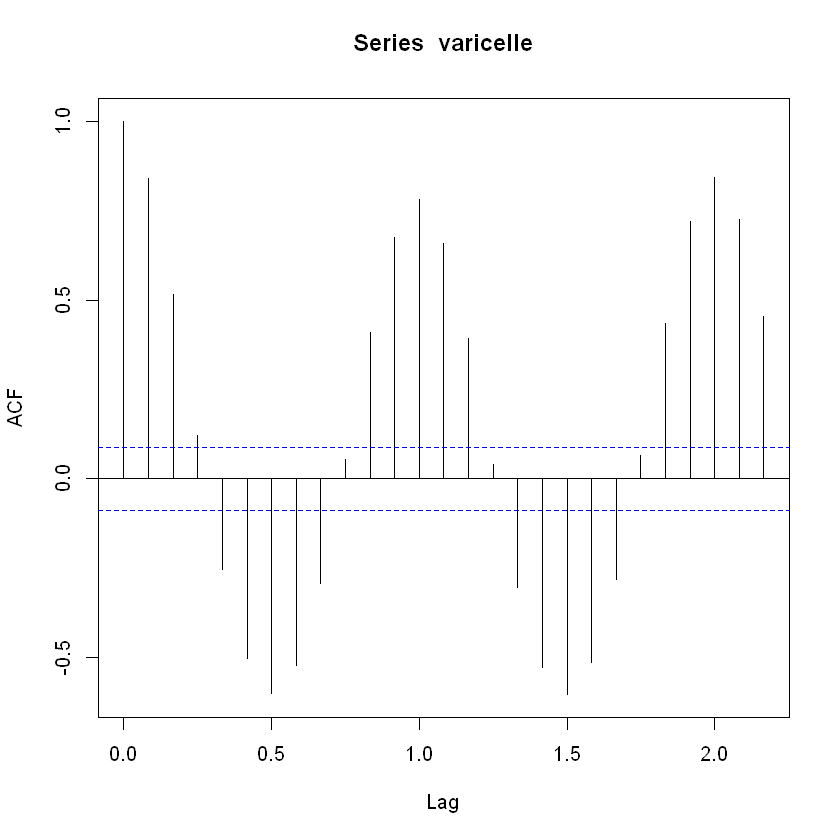

In [37]:
plot(tmp)

### Auto Correlation on a linear trend

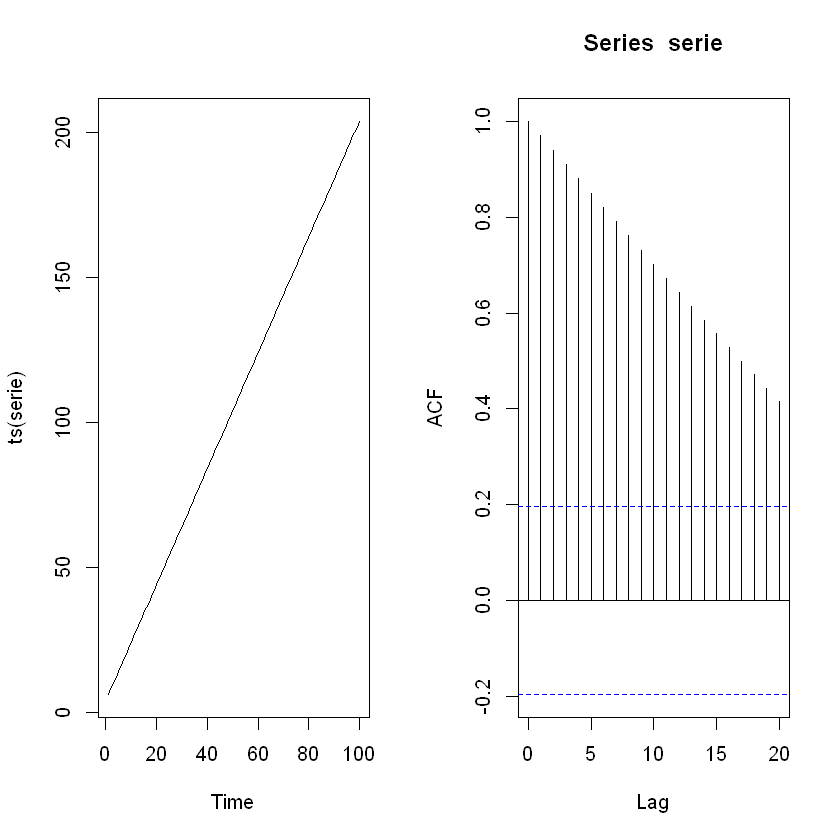

In [38]:
serie=2*(1:100)+4
par(mfrow=c(1,2))
plot(ts(serie))
acf(serie)

### Auto Correlation on a periodic time serie

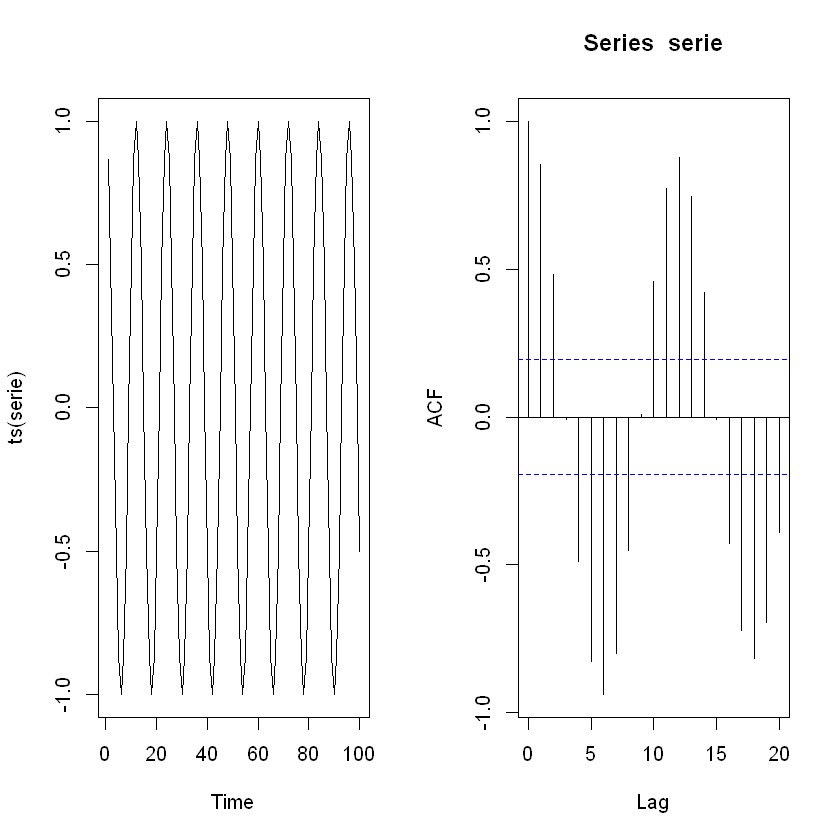

In [40]:
serie=cos(2*pi/12*(1:100))
par(mfrow=c(1,2))
plot(ts(serie))
acf(serie)

### Partial Auto Correlation

In [41]:
tmp=pacf(varicelle,type="cor",plot = FALSE)
tmp$acf[1:3,1,1]

[1]  0.8394105 -0.6382268 -0.2944475

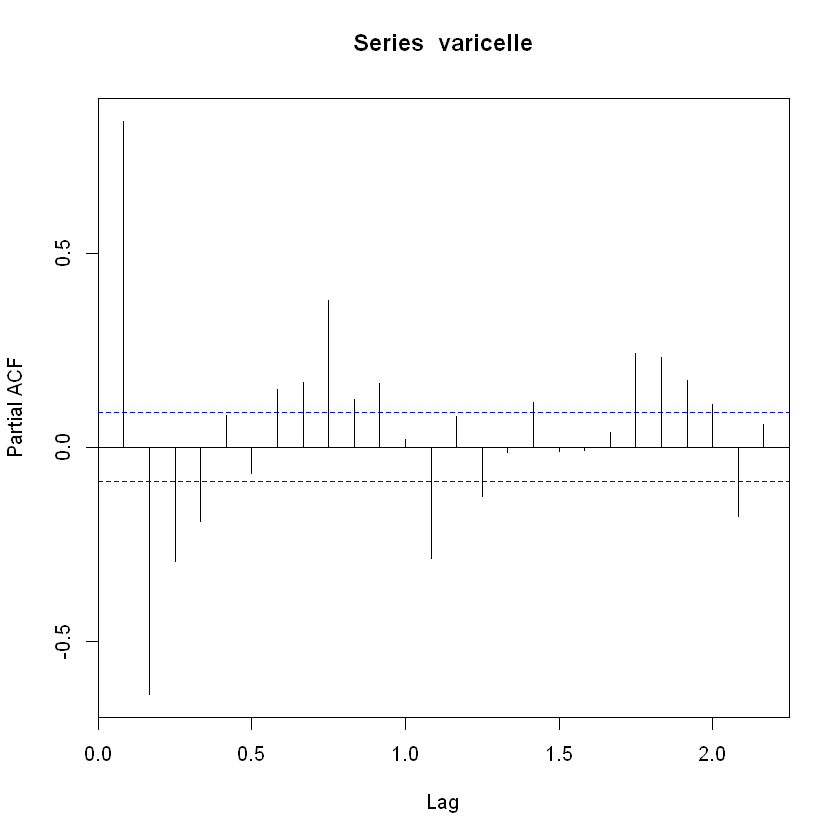

In [42]:
plot(tmp)

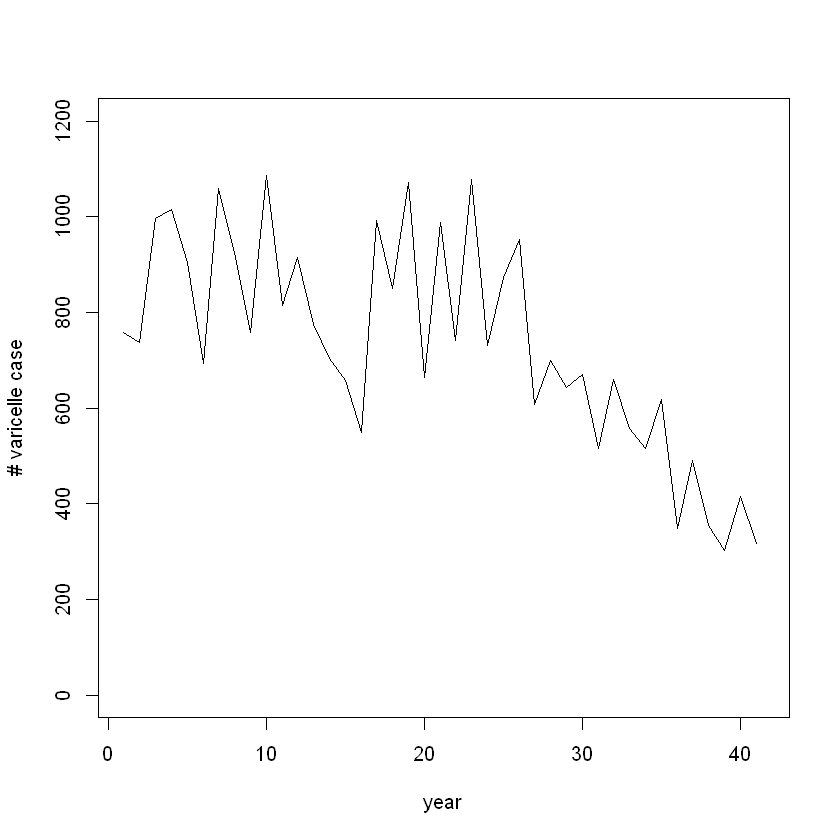

In [77]:
year_mean=c()
for (i in 1:(length(data$x)/12)) {
    year_mean[i] = mean(data$x[((i-1)*12+1):(i*12)])
}
plot(year_mean,type='l',xlim=c(1,length(data$x)/12),ylim=c(1,1200),xlab='year',ylab='# varicelle case')

**During the world war, less babies => less varicelle and after 1960 some kind of linear decrease (some kinf of prevention)**

**If I need to do a time forecast I will remove the datas before 1960**

## Exponential Smoothing

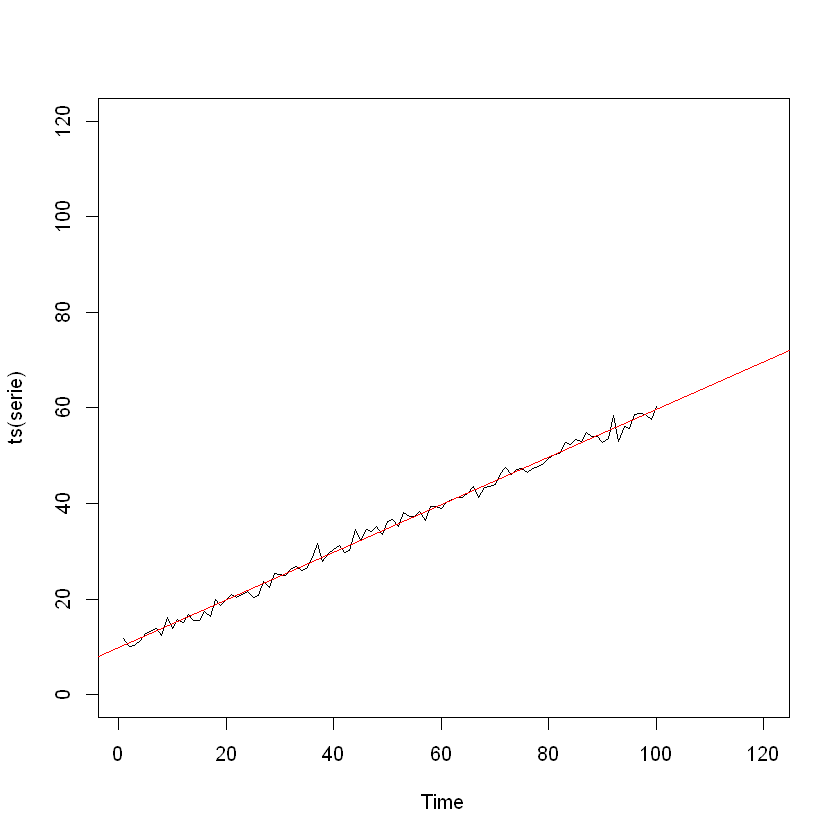

In [84]:
table=read.table(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/serie1.txt")
serie=table$V1
temps=1:100
mod=lm(serie~temps)
plot(ts(serie),xlim=c(1,120),ylim=c(0,120))
abline(mod$coefficients,col="red")

In [85]:
window(varicelle,start=1950)
head(varicelle,12)
tail(varicelle,6)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1950,936,1026,1244,935,1079,884,349,144,79,260,445,592
1951,1427,1545,1951,2200,1964,1284,523,142,93,148,198,374
1952,915,963,1154,1393,1227,1158,478,84,44,113,331,1052
1953,1747,1796,2625,2411,1877,1052,543,110,67,124,160,430
1954,726,1101,1769,1599,1035,988,424,147,76,105,281,524
1955,1044,1247,2023,1903,1653,1247,372,107,75,94,224,487
1956,989,1639,1991,1905,1846,1381,451,176,83,150,272,550
1957,798,902,1316,1443,1102,705,272,119,106,72,115,337
1958,677,885,1142,1590,1355,1198,565,136,89,115,174,477
1959,741,1034,1401,1316,1056,882,506,136,80,62,149,368


ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

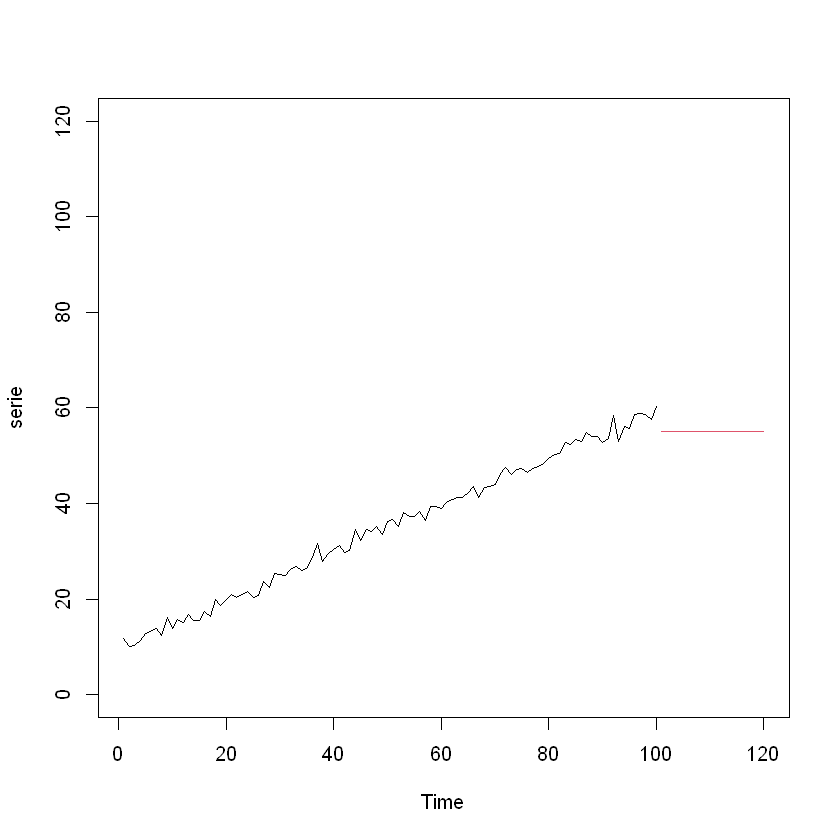

In [88]:
serie=ts(serie)
LES=HoltWinters(serie,alpha=0.1,beta=FALSE,gamma=FALSE)
plot(serie,xlim=c(1,120),ylim=c(0,120))
p<-predict(LES,n.ahead=20)
lines(p,col=2)

**Same with auto calculation of alpha**

In [90]:
LES=HoltWinters(serie,alpha=NULL,beta=FALSE,gamma=FALSE)
print(LES$alpha)

[1] 0.658856


**Same with a prediction interval**

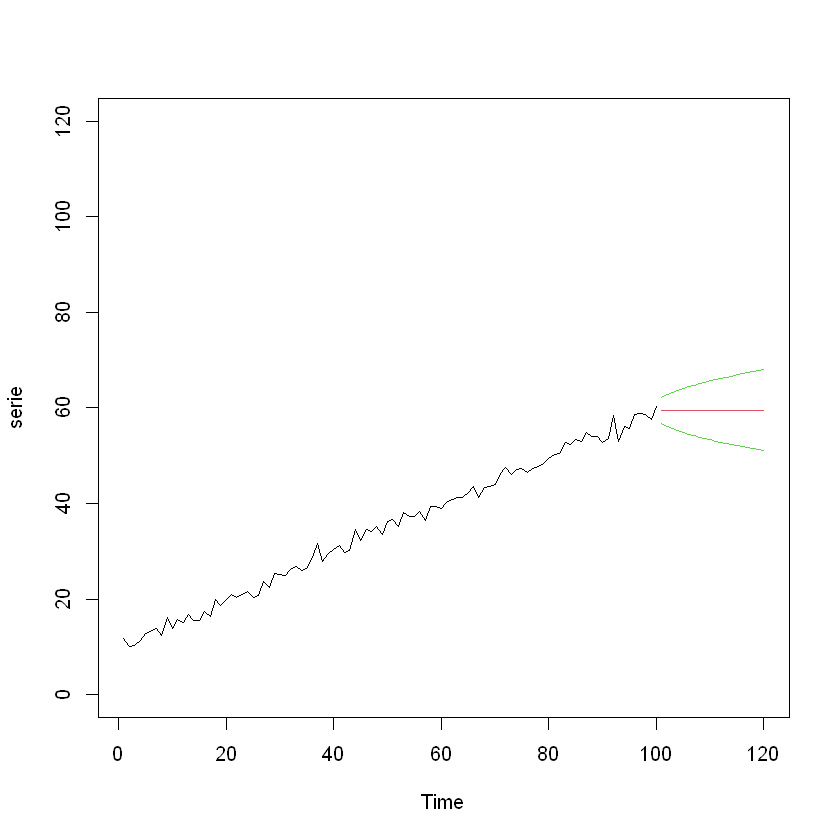

In [91]:
LES=HoltWinters(serie,alpha=NULL,beta=FALSE,gamma=FALSE)
plot(serie,xlim=c(1,120),ylim=c(0,120))
p<-predict(LES,n.ahead=20,prediction.interval = TRUE)
lines(p[,1],col=2)
lines(p[,2],col=3);lines(p[,3],col=3);

**Prediction of periodical time serie with SES**

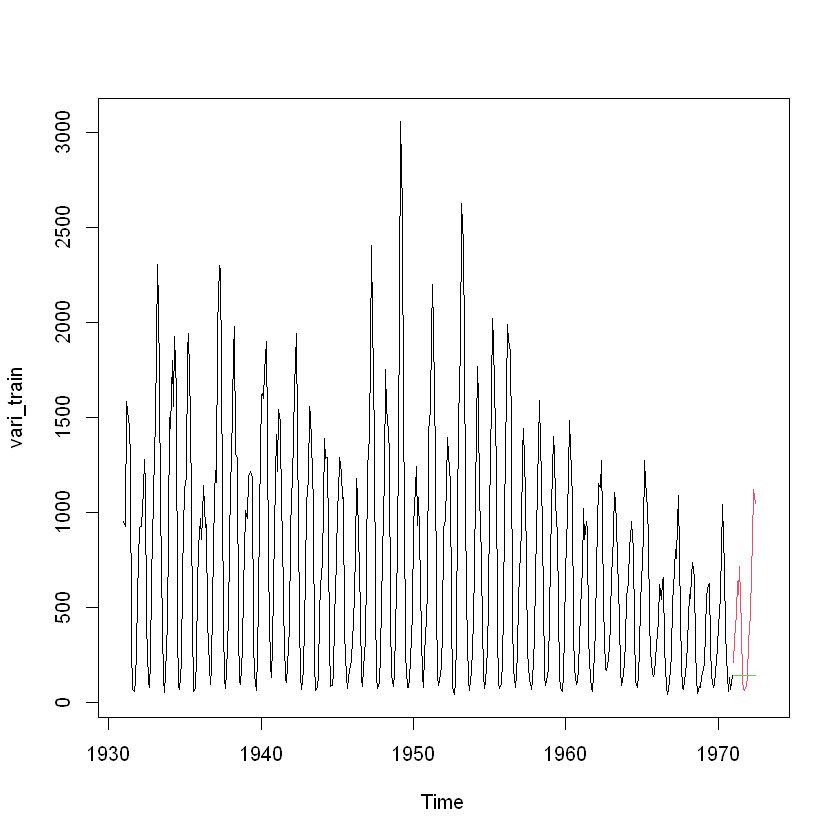

In [92]:
data=read.csv(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/varicelle.csv")
vari_train<-ts(data$x[1:480],start=c(1931,1),end=c(1970,12),freq=12)
vari_test<-ts(data$x[481:498],start=c(1971,1),end=c(1972,6),freq=12)
plot(vari_train,xlim=c(1931,1973))
lines(vari_test,col=2)
SES=HoltWinters(vari_train,alpha=NULL,beta=FALSE,gamma=FALSE)
p1<-predict(SES,n.ahead=18)
lines(p1,col=3)

In [93]:
SES=ses(vari_train,h=18)
round(accuracy(SES),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.6,338.15,251.29,-24.53,61,1.04,0.51


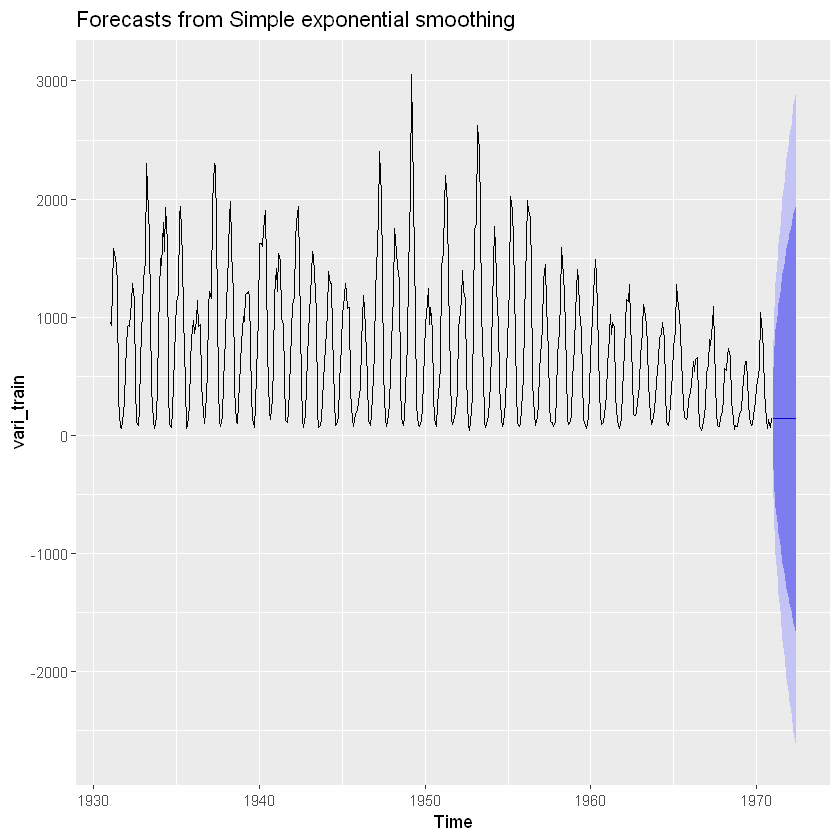

In [94]:
autoplot(SES)

**Non seasonal Holt-Winters smoothing**

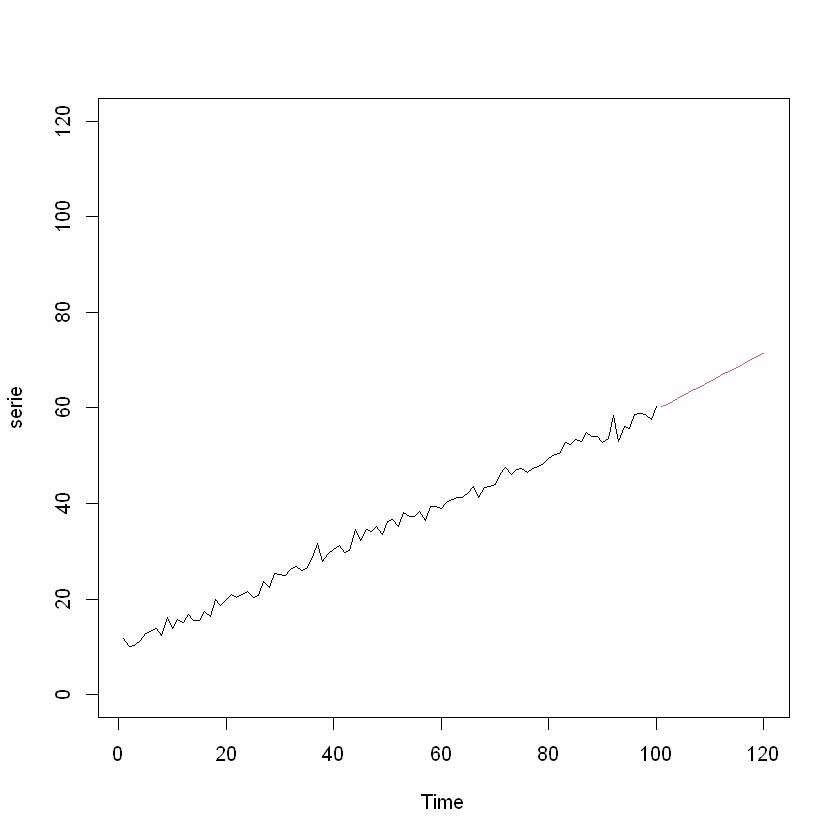

In [95]:
LES=HoltWinters(serie,alpha=NULL,beta=NULL,gamma=FALSE)
plot(serie,xlim=c(1,120),ylim=c(0,120))
p<-predict(LES,n.ahead=20)
lines(p,col=2)

**Non seasonal Holt-Winters smoothing with HOLT**

In [96]:
HOLT=holt(vari_train,h=18)
round(accuracy(HOLT),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.22,330.42,259.65,54.15,89.34,1.08,0.01


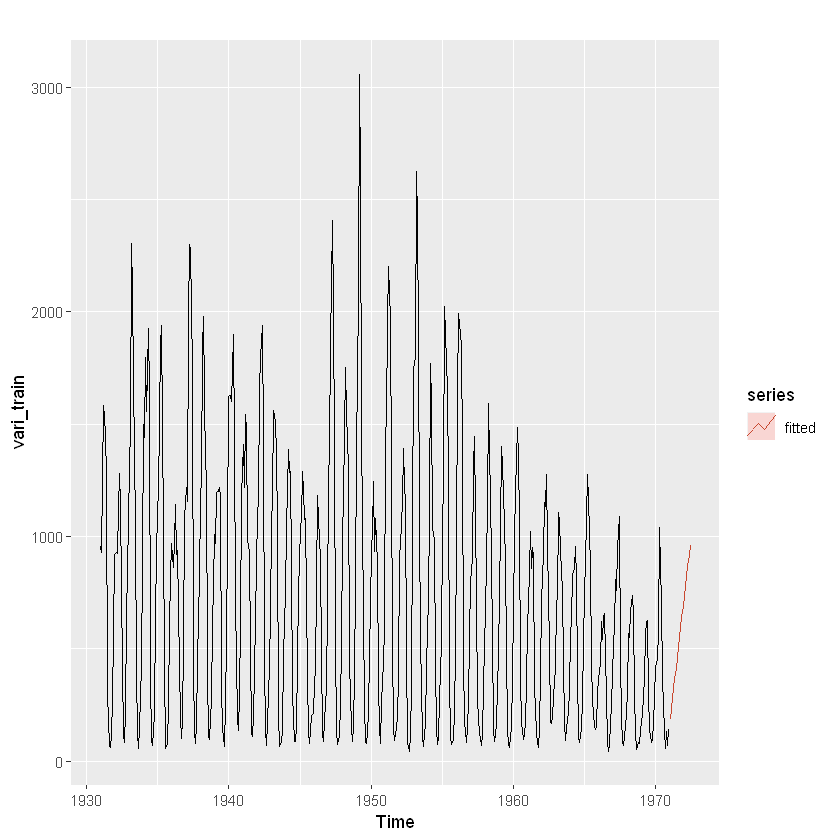

In [97]:
autoplot(vari_train) + autolayer(HOLT,series='fitted',PI=FALSE)

**Prediction with damped parameter**

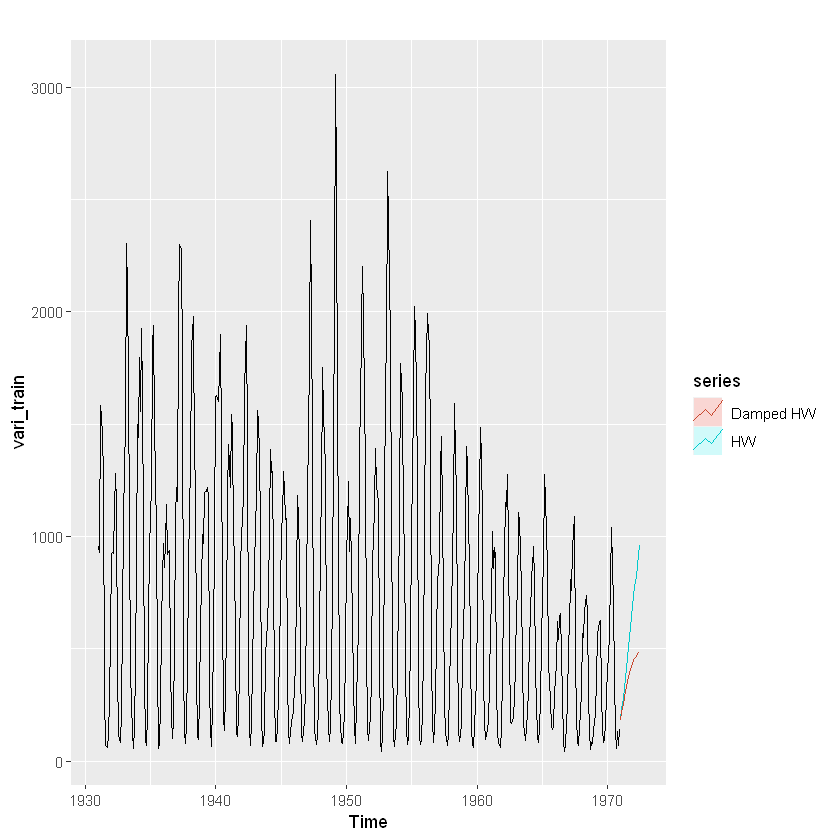

In [98]:
HOLT1=holt(vari_train,h=18)
HOLT2=holt(vari_train,damped=TRUE,phi=0.9,h=18)
autoplot(vari_train) +
autolayer(HOLT1,series='HW',PI=FALSE) +
autolayer(HOLT2,series='Damped HW',PI=FALSE)

In [100]:
install.packages('fpp')

Installing package into 'C:/Users/erick/R'
(as 'lib' is unspecified)

also installing the dependencies 'fma', 'expsmooth'




package 'fma' successfully unpacked and MD5 sums checked
package 'expsmooth' successfully unpacked and MD5 sums checked
package 'fpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erick\AppData\Local\Temp\Rtmp29aZBp\downloaded_packages


### Cross validation with tsCV

Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tseries



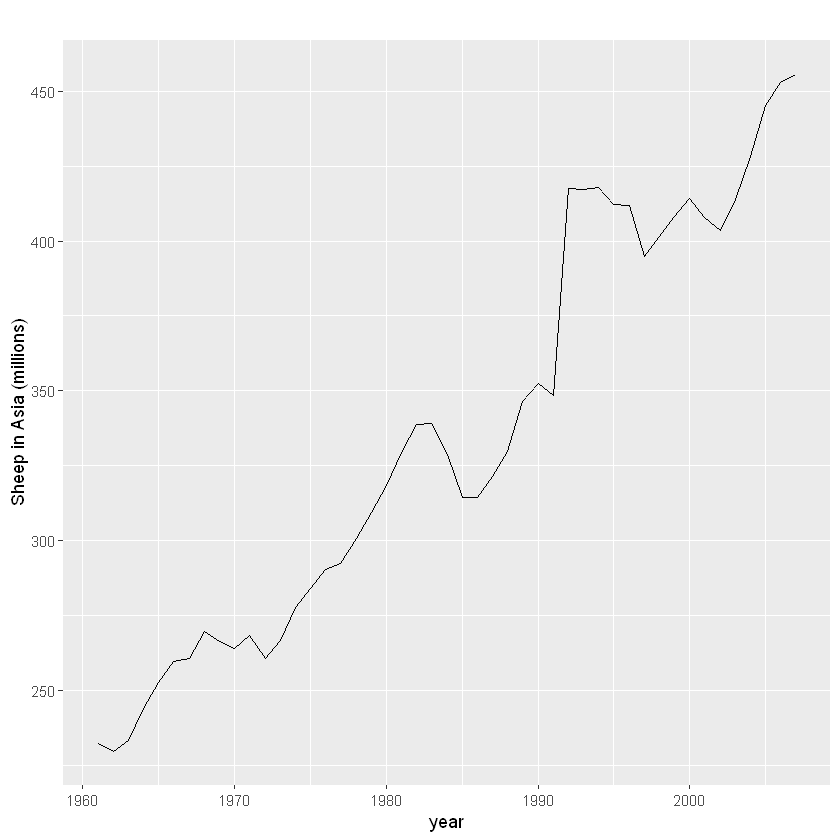

In [101]:
library(fpp)
data(livestock)
autoplot(livestock) +
xlab("year") +
ylab("Sheep in Asia (millions)")

In [102]:
e1 <- tsCV(livestock, ses, h=1)
e2 <- tsCV(livestock, holt, h=1)
e3 <- tsCV(livestock, holt, damped=TRUE, h=1)

In [103]:
mean(e1^2, na.rm=TRUE)

[1] 178.2531

In [104]:
mean(e2^2, na.rm=TRUE)

[1] 173.365

In [105]:
mean(e3^2, na.rm=TRUE)

[1] 162.6274

**At the end the smoothing with damped is the best one**

**Model description**

In [106]:
HWd=holt(livestock,damped=TRUE,h=12)
HWd[["model"]]

Damped Holt's method 

Call:
 holt(y = livestock, h = 12, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 3e-04 
    phi   = 0.9798 

  Initial states:
    l = 223.35 
    b = 6.9046 

  sigma:  12.8435

     AIC     AICc      BIC 
427.6370 429.7370 438.7379 

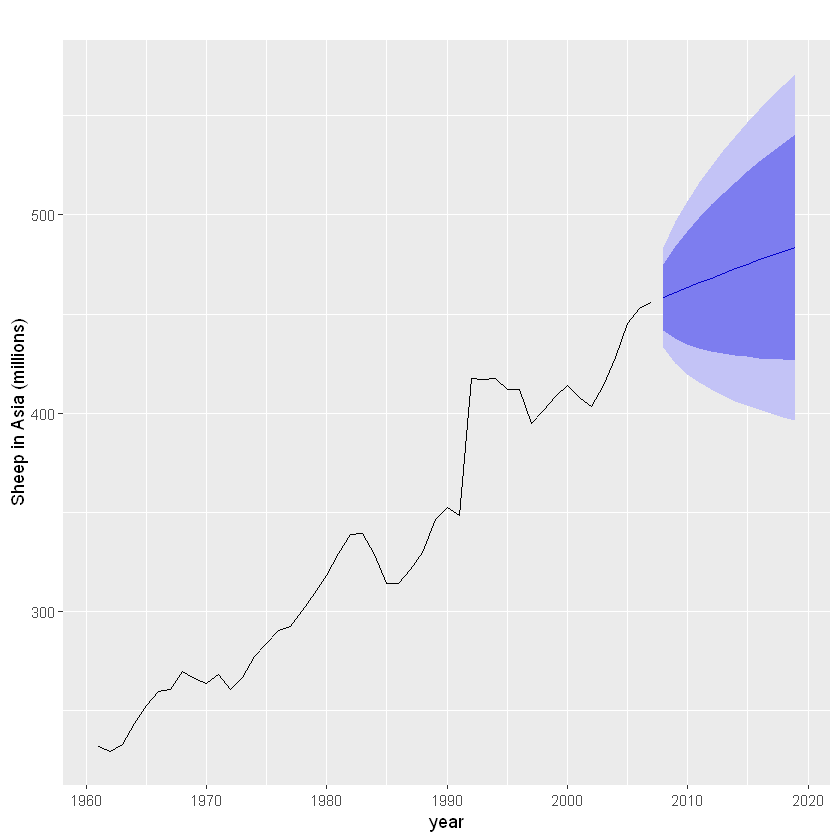

In [107]:
autoplot(livestock) +
autolayer(HWd) +
xlab("year") +
ylab("Sheep in Asia (millions)")

### Additive Seasonal model pattern

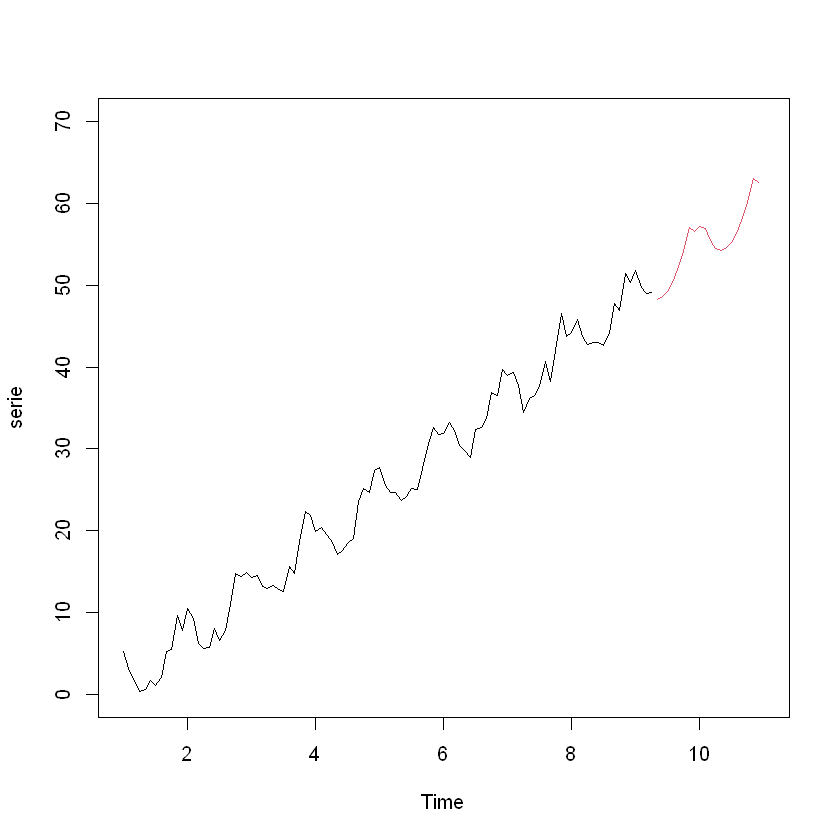

In [109]:
serie=0.5*(1:100)+rnorm(100,0,1)+3*cos(pi/6*(1:100))
serie=ts(serie,start=c(1,1),end=c(9,4),frequency = 12)
LES=HoltWinters(serie,alpha=NULL,beta=NULL,gamma=NULL)
plot(serie,xlim=c(1,11),ylim=c(0,70))
p<-predict(LES,n.ahead=20)
lines(p,col=2)

**the value of the frequence in the ts function is MANDATORY**

### Multiplicative Seasonal

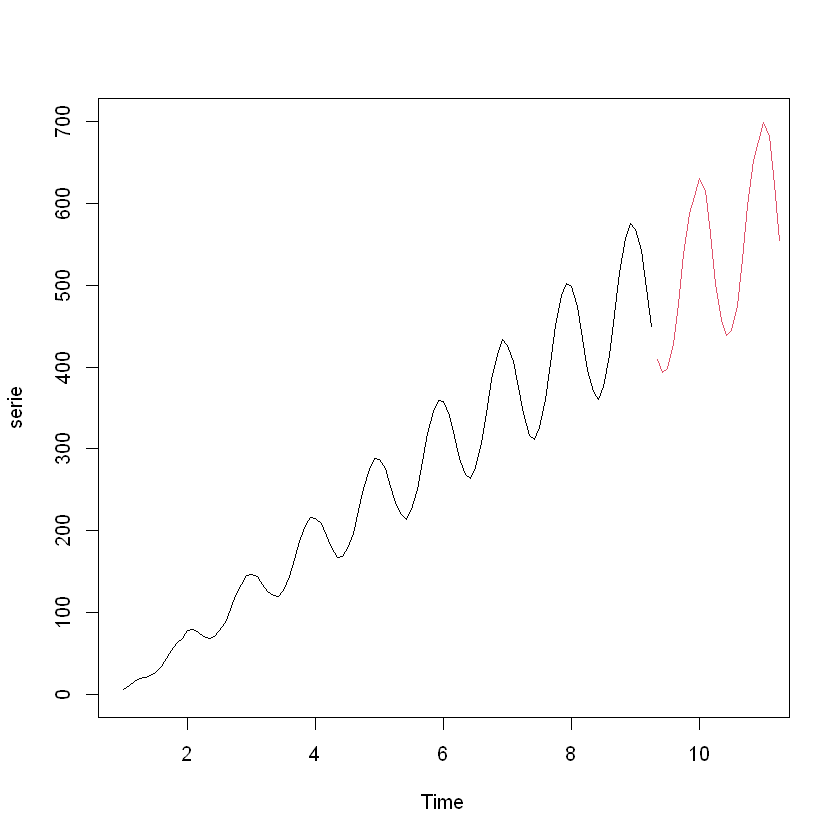

In [110]:
serie=5*(1:100)+rnorm(100,0,1)+cos(pi/6*(1:100))*(1:100)
serie=ts(serie,start=c(1,1),end=c(9,4),frequency = 12)
LES=HoltWinters(serie,alpha=NULL,beta=NULL,gamma=NULL,
seasonal = "multi")
plot(serie,xlim=c(1,11),ylim=c(0,700))
p<-predict(LES,n.ahead=24)
lines(p,col=2)

### Testing additive and multiplicativ effect on Varicelle Time series

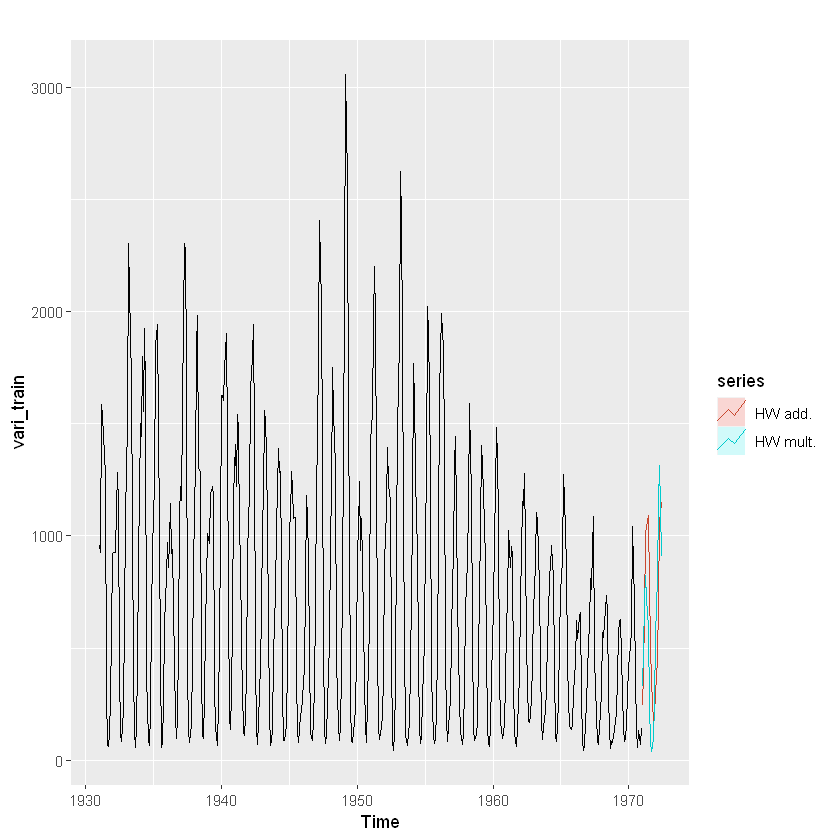

In [111]:
fit1=hw(vari_train,seasonal='additive',h=18)
fit2=hw(vari_train,seasonal='multiplicative',h=18)
autoplot(vari_train) +
autolayer(fit1,series='HW add.',PI=FALSE) +
autolayer(fit2,series='HW mult.',PI=FALSE)

**No need to remove first years** 

In [112]:
print(sqrt(mean((fit1$mean-vari_test)^2)))

[1] 238.2674


In [113]:
print(sqrt(mean((fit2$mean-vari_test)^2)))

[1] 214.7901


**Multiplicative model is better**

### the same with damped effect

In [114]:
fit3=hw(vari_train,seasonal='additive',damped=TRUE,h=18)
fit4=hw(vari_train,seasonal='multiplicative',damped=TRUE,h=18)
print(sqrt(mean((fit1$mean-vari_test)^2)))

[1] 238.2674


In [117]:
print(sqrt(mean((fit3$mean-vari_test)^2)))

[1] 279.7424


In [118]:
print(sqrt(mean((fit4$mean-vari_test)^2)))

[1] 375.6358


**damp effect makes it worst, so we keep the simple multiplicativ effect**

### Exemple with co2 file

In [46]:
library(forecast)
library(ggplot2)

In [4]:
str(co2)

 Time-Series [1:468] from 1959 to 1998: 315 316 316 318 318 ...


**co2 is already a built in time serie in R**

In [5]:
co2_train = head(co2,372)
co2_test =tail(co2,96)

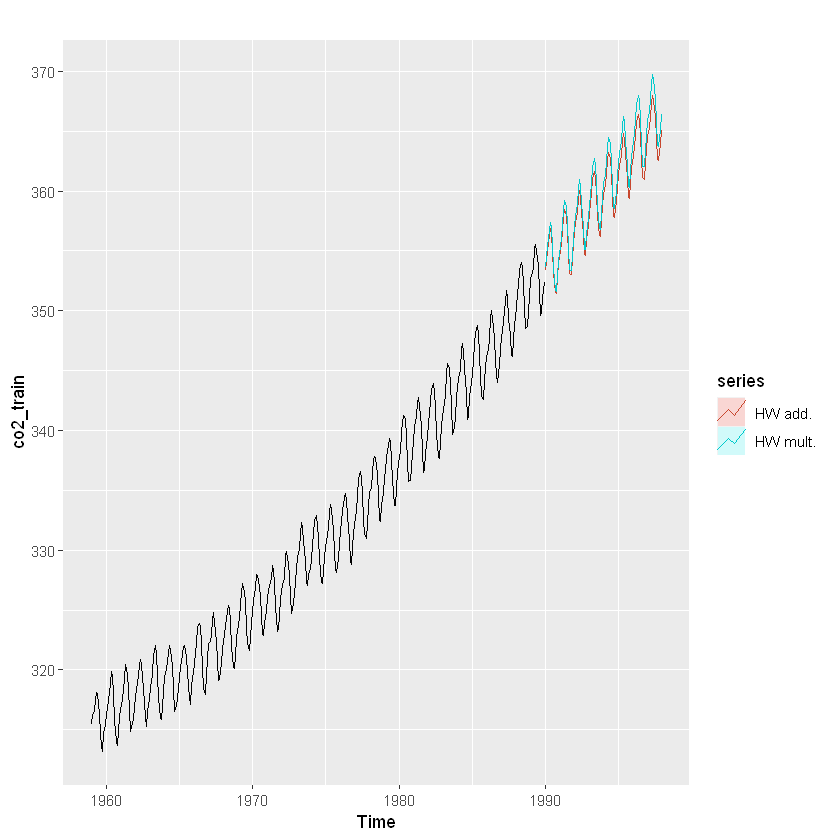

In [6]:
fit1=hw(co2_train,seasonal='additive',h=96)
fit2=hw(co2_train,seasonal='multiplicative',h=96)
autoplot(co2_train) +
autolayer(fit1,series='HW add.',PI=FALSE) +
autolayer(fit2,series='HW mult.',PI=FALSE)

In [13]:
print(sqrt(mean((fit1$mean-co2_test)^2)))

[1] 1.316165


In [8]:
print(sqrt(mean((fit2$mean-co2_test)^2)))

[1] 2.199909


In [9]:
fit3=hw(co2_train,seasonal='additive',damped=TRUE,h=96)
fit4=hw(co2_train,seasonal='multiplicative',damped=TRUE,h=96)


In [10]:
print(sqrt(mean((fit3$mean-co2_test)^2)))

[1] 3.686467


In [11]:
print(sqrt(mean((fit4$mean-co2_test)^2)))

[1] 3.541412


**Best model is fit1 : additive without damped**

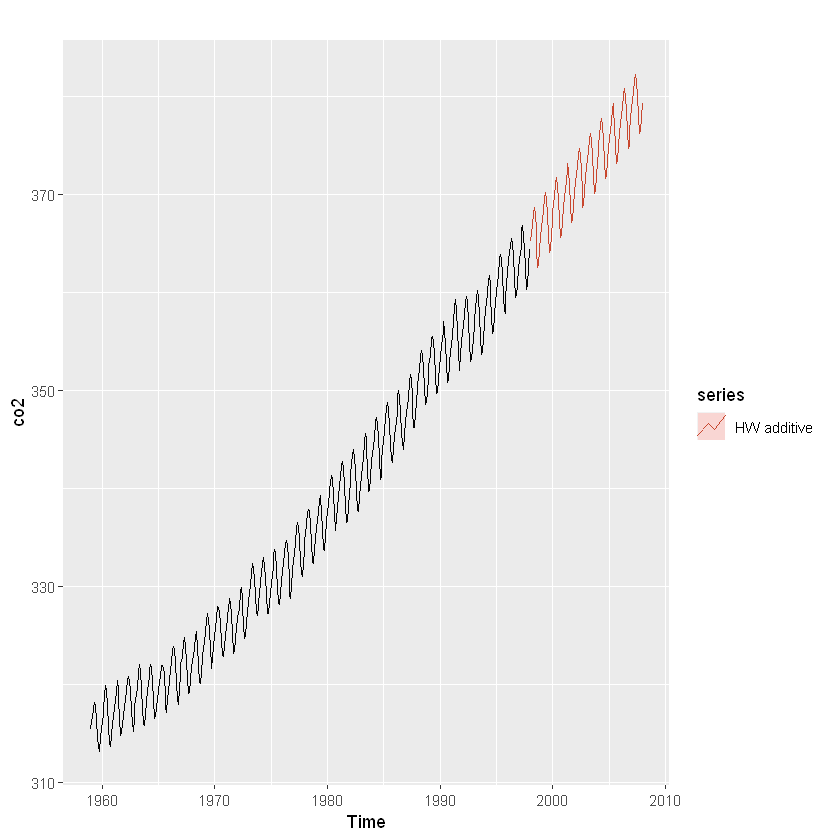

In [42]:
fit1=hw(co2,seasonal='additive',h=120)
autoplot(co2) +
autolayer(fit1,series='HW additive',PI=FALSE)

**with confident level**

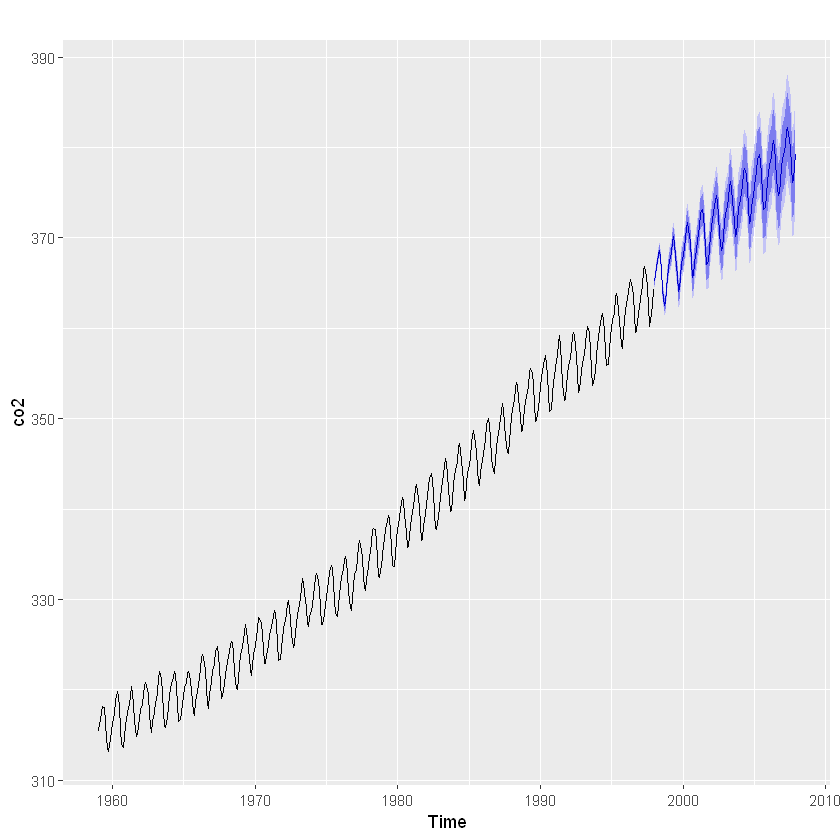

In [16]:
fit1=hw(co2,seasonal='additive',h=120)
autoplot(co2) +
autolayer(fit1)

### Exemple San Francisco

In [20]:
sanf=read.table(file="sanfran.dat",sep = " ",header = TRUE,dec = ".")

ERROR: Error in read.table(file = "sanfran.dat", sep = " ", header = TRUE): more columns than column names


In [29]:
my_txt <- readLines(paste( "sanfran.dat", sep = "\n"))


In [38]:
data=scan("sanfran.dat",skip=1)

In [39]:
data

[1]  16.26  29.46  18.03  24.13  22.35  22.10  12.95  13.72  10.41 105.66
 [11]  79.76  20.07  22.10   0.00  29.72  13.21  20.07   1.27   8.13  10.41
 [21]  52.83  90.42  56.13  50.80  46.23  25.91   5.84   3.05  11.18  14.99
 [31]  18.29  16.51   7.11  46.48 102.36  34.54  13.72  17.27  23.62  33.27
 [41]  23.62   9.65  14.22  30.23   5.84  33.27  93.47  69.09   7.62  28.45
 [51]  25.15  25.15  23.88   7.37  10.67  19.30  14.73  42.16  65.79  71.63
 [61]   9.40  12.95  11.43  16.00  22.86  24.64   2.29  35.05  39.12  39.12
 [71]  40.39  59.94  33.53   2.79  14.73  10.41  20.32  26.42   9.91   2.29
 [81]  48.01  56.13  40.39  78.23   2.29   3.30  22.61  31.50  18.54  31.50
 [91]  16.76   3.30   4.83  50.04  48.77  55.37  32.51  21.08  13.72  14.73
[101]  43.43  12.95  14.22  27.69  34.29  60.96  70.10  70.36  11.43  43.69
[111]  44.70  35.56  29.72  40.64  47.24  45.72  28.96  64.77  72.14  97.54
[121]  42.42  19.30  28.96  12.95  14.22   4.06  19.81   0.51   4.06  43.18
[131]  82.80  41.40  26.92   0.51  30.48  20.83   5.08  21.84   5.08  10.41
[141]  44.70  58.93  67.56  43.94  11.43   6.10  21.84  11.68  13.46  10.16
[151]   5.33   9.40   5.84  67.06  85.09  71.37  34.04  28.96  18.54  23.37
[161]   2.29  18.54   3.81   0.51   1.52  38.35  65.53  10.92  30.99   0.25
[171]  16.26  34.80   1.78  10.67   6.60   4.06   6.60  64.52  96.52  45.97
[181]  20.83  18.03   9.14  11.94   3.30   6.35   1.52  22.10  14.22  27.94
[191] 115.82  14.22  12.19  14.73  17.27  10.41  57.91  16.00   0.51   6.60
[201]  33.78  37.59  42.93  28.45  34.29   2.03  34.54  48.26  13.46   8.89
[211]  13.97  12.19  22.35  75.95  40.39  64.26  13.21   2.03  17.78   5.84
[221]   7.11   8.89   4.83   0.25   4.83  80.01  28.96  39.62   9.91   0.25
[231]   0.51  13.72   7.62  11.43  18.29   2.03   0.25  39.12  62.74   8.89
[241]  26.67   8.89  28.96  28.45   6.86  25.65  32.00  14.48  37.59  49.28
[251]  53.85  27.18   0.00  17.02   8.64   1.27  16.26  32.26  18.03   2.79
[261]  17.02  70.36  40.13   0.76   8.38   9.14   7.62   7.37   2.54  35.05
[271]   4.06  14.73  12.70  59.18  72.39  42.42  22.35   0.25   3.30  21.08
[281]   4.57   2.79   2.29  14.73   9.40  65.28  92.96   2.79  21.08   1.27
[291]   7.62  18.03  19.81   0.25   4.32   4.83  13.72  51.05  38.86   1.52
[301]  12.45   0.25   2.54  24.64  10.41  19.56  17.78  21.34  17.53  82.55
[311] 122.17   6.10  56.90  13.21   4.06  13.72  23.62  54.61  27.94   6.86
[321]  18.29  46.48  62.23  69.09  48.77   9.65   1.52   4.06  13.46   3.05
[331]  11.68   2.29  18.80  55.63 104.65   1.78  52.32  10.41  41.91  27.18
[341]   7.11   5.33   2.03  10.41  16.26  41.66  38.86  22.35  67.56   1.27
[351]  27.69  12.19   3.05  21.34   4.06   0.76  17.78  48.01  61.98  48.01
[361]  36.32  31.50  36.07  21.84   4.57  11.18   8.38   0.25  11.18  79.76
[371]  20.07  73.66  36.83  18.03  35.56  16.51  21.59   6.10   6.10   1.27
[381]   4.06  38.86 100.08  58.17  25.65  17.53   1.78   3.30  16.76  11.43
[391]  16.51   8.38   2.79  67.82  65.53  86.11   3.30  11.94  16.00  21.59
[401]  14.48   7.87  14.22   7.11  28.45  85.85  78.74  62.23   6.35  10.16
[411]  74.42  15.24  13.72   3.05   4.83   0.76  34.29  64.01  77.98  53.59

In [41]:
sanfran = ts(data,start=c(1932,1),end=c(1966,12),freq=12)

In [58]:
sanfran_train = head(sanfran,384)
sanfran_test =tail(sanfran,36)

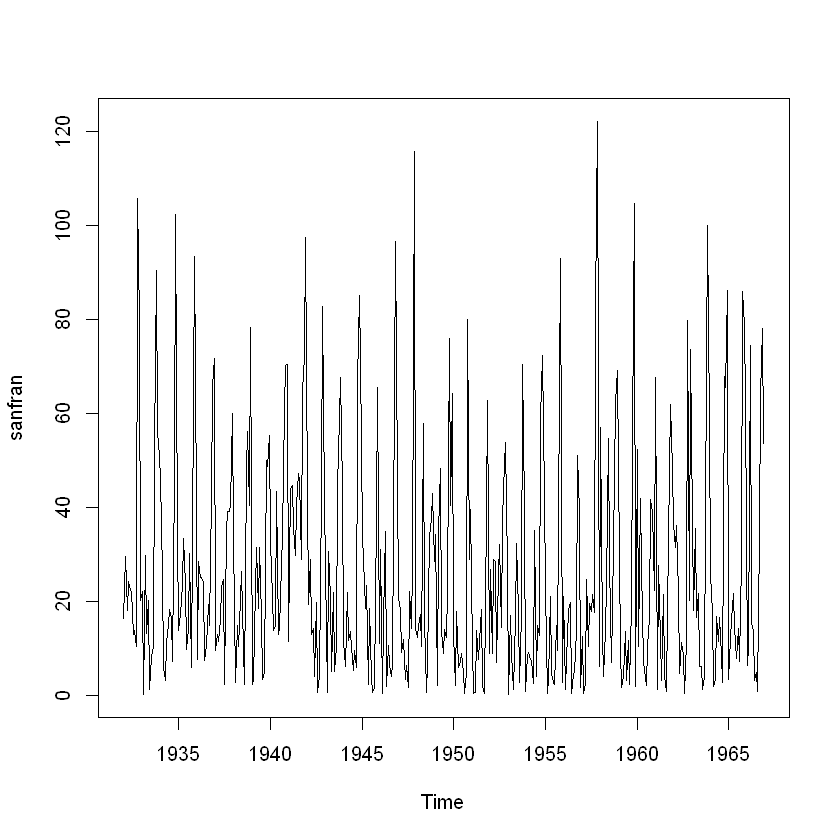

In [59]:
plot(sanfran)

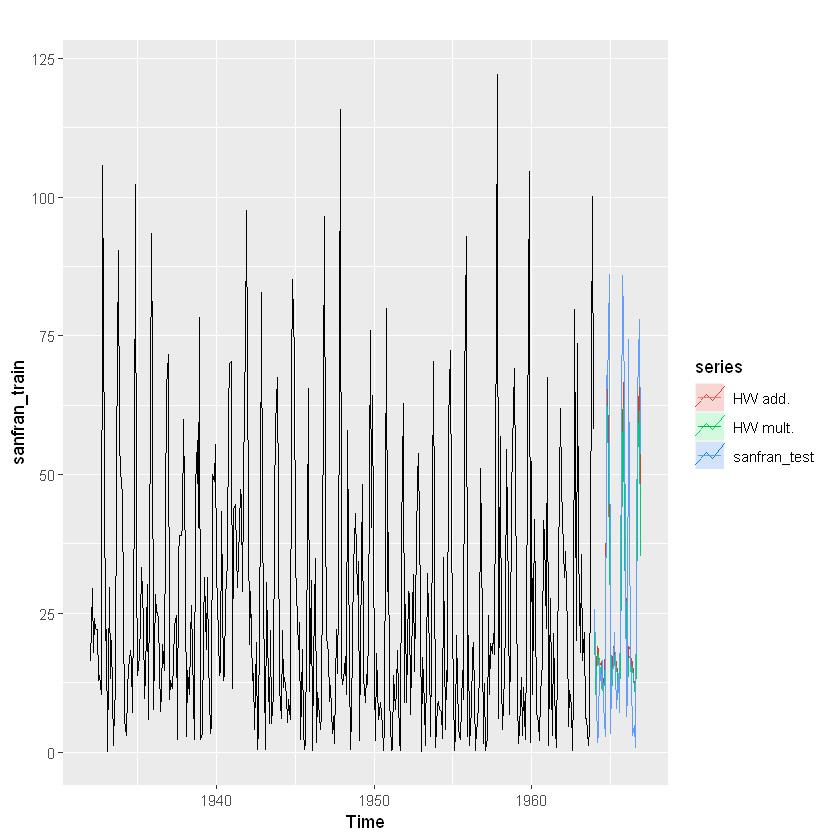

In [72]:
fit1=hw(sanfran_train,seasonal='additive',h=36)
fit2=hw(sanfran_train,seasonal='multiplicative',h=36)
autoplot(sanfran_train) +
autolayer(fit1,series='HW add.',PI=FALSE) +
autolayer(fit2,series='HW mult.',PI=FALSE) +
autolayer(sanfran_test)

**Modify data to replace 0 value by 0.1 value to be able to run multiplicativ model**

In [56]:
min(sanfran)

[1] 0.1

In [54]:
which.min(sanfran)

[1] 253

In [52]:
sanfran[14]=0.1

In [55]:
sanfran[253]=0.1

In [63]:
print(sqrt(mean((fit1$mean-sanfran_test)^2)))

[1] 15.87358


In [64]:
print(sqrt(mean((fit2$mean-sanfran_test)^2)))

[1] 17.65021


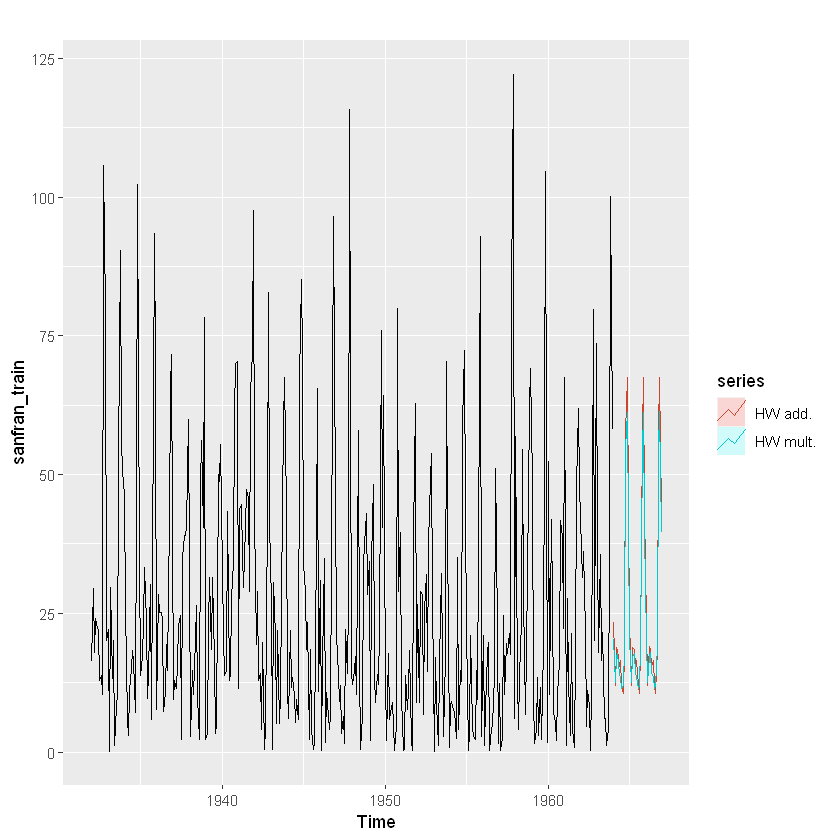

In [66]:
fit3=hw(sanfran_train,seasonal='additive',damped=TRUE,h=36)
fit4=hw(sanfran_train,seasonal='multiplicative',damped=TRUE,h=36)
autoplot(sanfran_train) +
autolayer(fit3,series='HW add.',PI=FALSE) +
autolayer(fit4,series='HW mult.',PI=FALSE)

In [69]:
print(sqrt(mean((fit3$mean-sanfran_test)^2)))

[1] 15.739


In [70]:
print(sqrt(mean((fit4$mean-sanfran_test)^2)))

[1] 16.64443


**Best model is fit 3 : additiv with damped**

# Day 2

## auto correlation for new cases of Covid19 in France

In [2]:
covid19=read.csv("WHO-COVID-19-global-data.csv")

In [278]:
covid19_F=covid19[covid19$Country=="France",]
covid19_P=covid19[covid19$Country=="Mexico",]

In [282]:
covid19_F_nc=covid19_F$New_cases
covid19_P_nc=covid19_P$New_cases
covid19_F_nd=covid19_F$New_deaths
covid19_P_nd=covid19_P$New_deaths

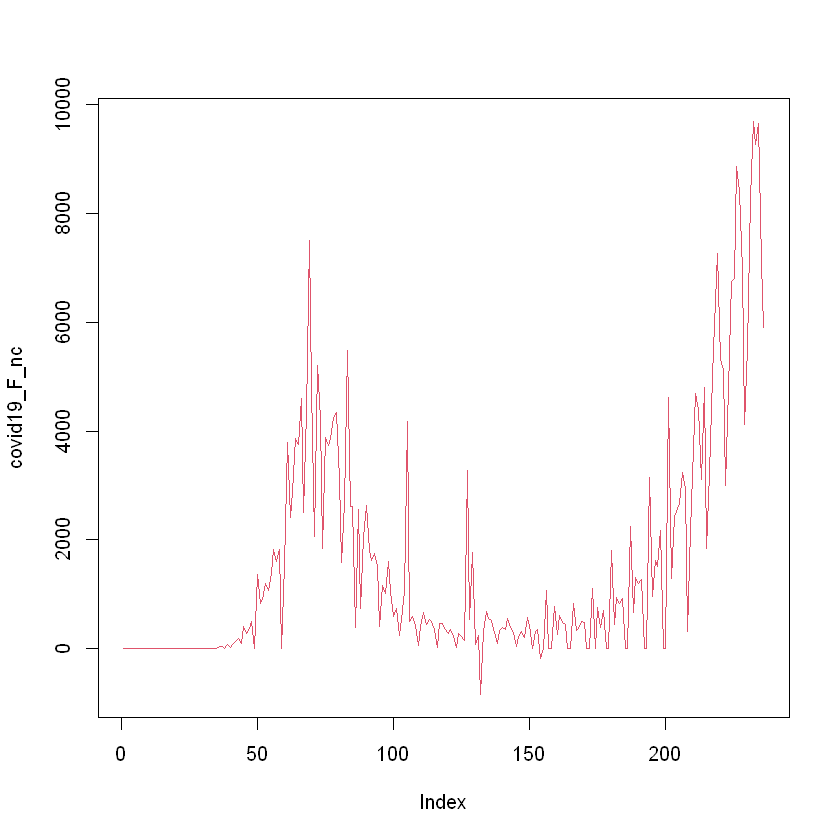

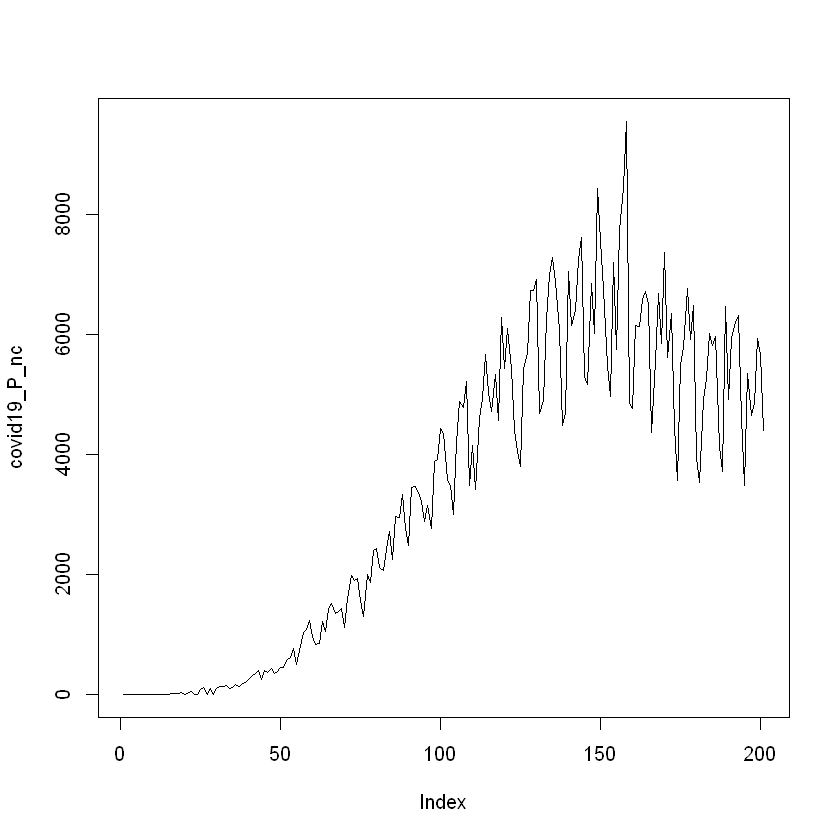

In [283]:
plot(covid19_F_nc,type = 'l',col=2)
plot(covid19_P_nc,type = 'l')

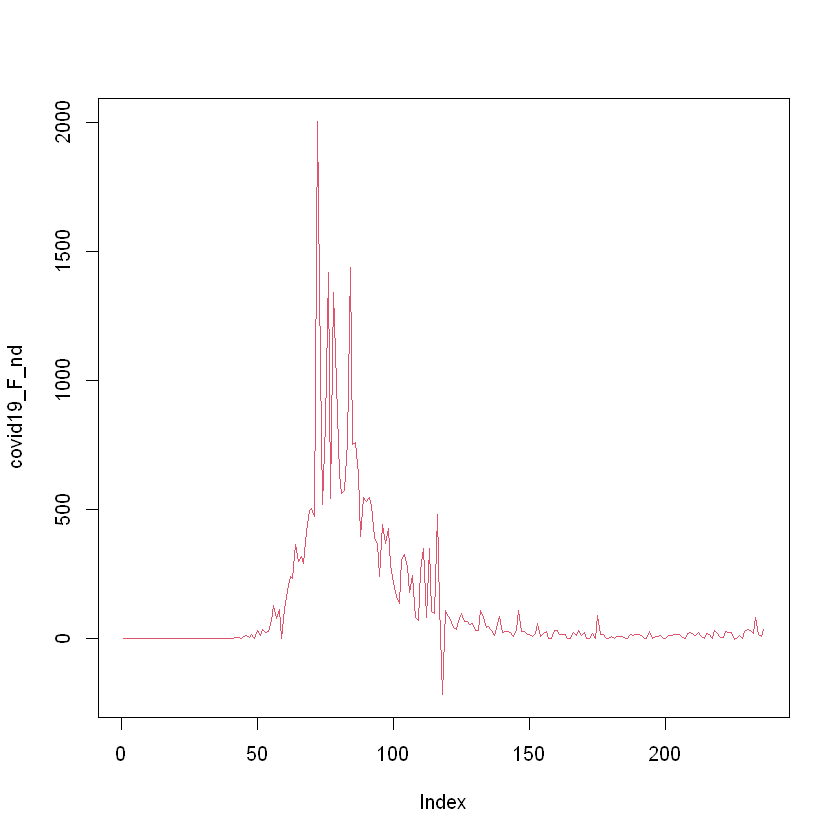

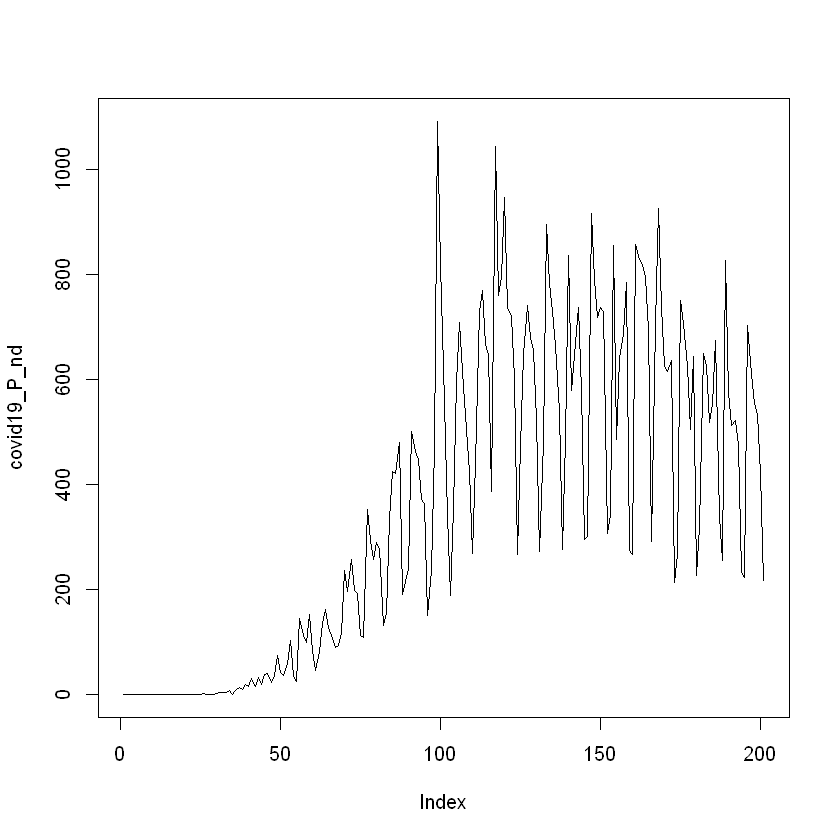

In [284]:
plot(covid19_F_nd,type = 'l',col=2)
plot(covid19_P_nd,type = 'l')

In [11]:
tmp=acf(covid19_F_nc,type="cor",plot = FALSE)
tmp$acf[1:3,1,1]

[1] 1.0000000 0.8400198 0.7710139

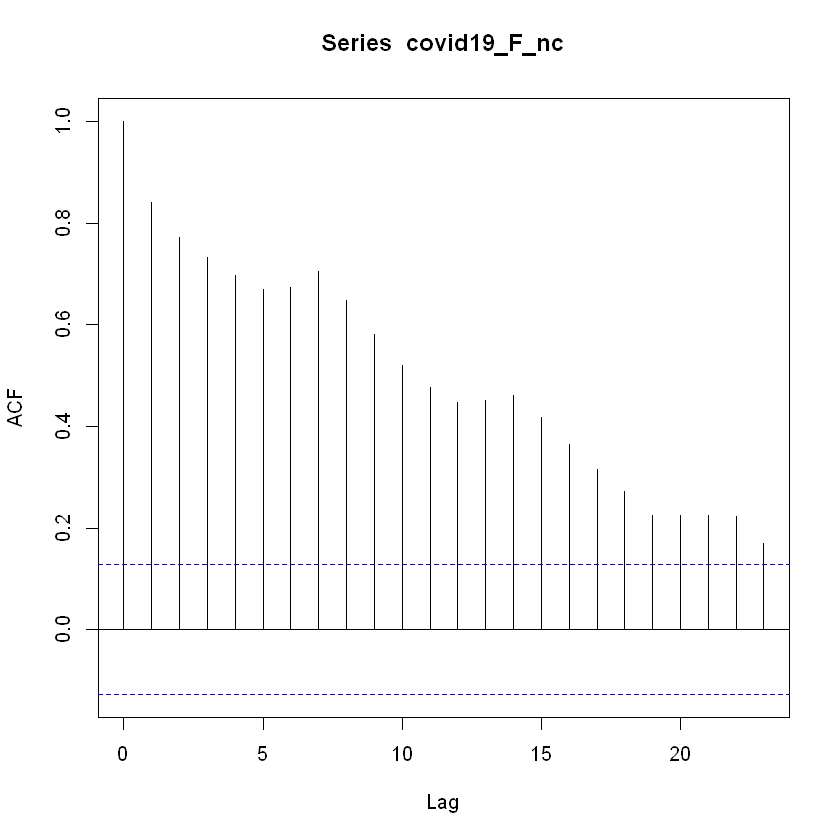

In [12]:
plot(tmp)

**1) There is a kind of linear trend**

**2) There is a peridodic effect (7 days)**

## Removing trend ans seasonal pattern - non parametric

### Moving average - non parametric

In [24]:
library(forecast)
library(ggplot2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Warning message:
"Removed 6 row(s) containing missing values (geom_path)."
Warning message:
"Removed 12 row(s) containing missing values (geom_path)."


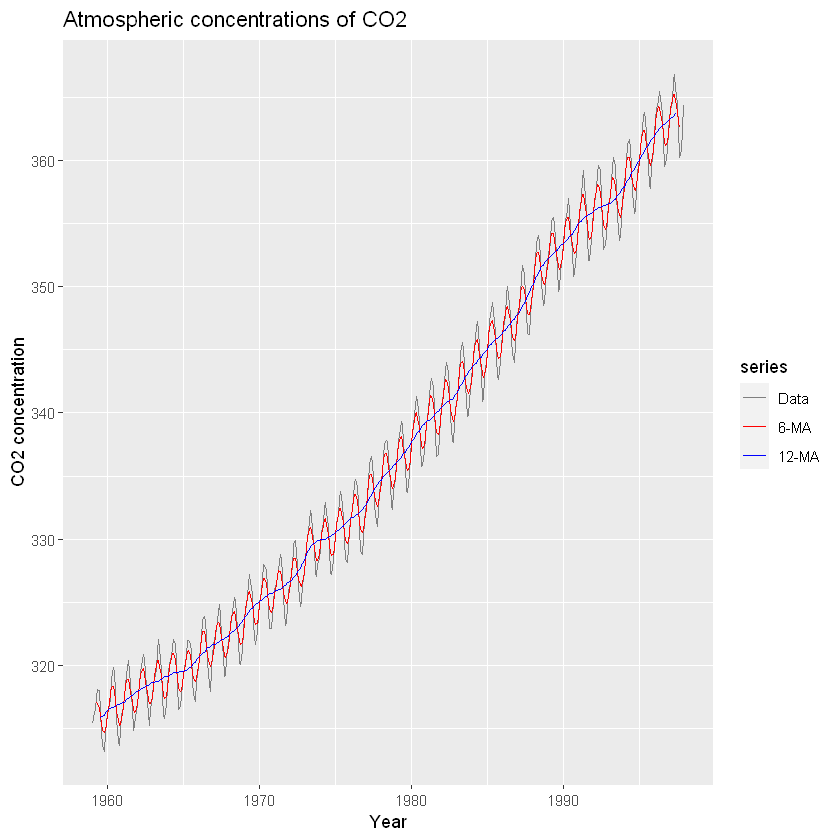

In [28]:
autoplot(co2, series="Data") +
autolayer(ma(co2,6), series="6-MA") +
autolayer(ma(co2,12), series="12-MA") +
xlab("Year") + ylab("CO2 concentration") +
ggtitle("Atmospheric concentrations of CO2 ") +
scale_colour_manual(
values=c("Data"="grey50","6-MA"="red","12-MA"="blue"),
breaks=c("Data","6-MA","12-MA"))

### Decompose function - non parametric

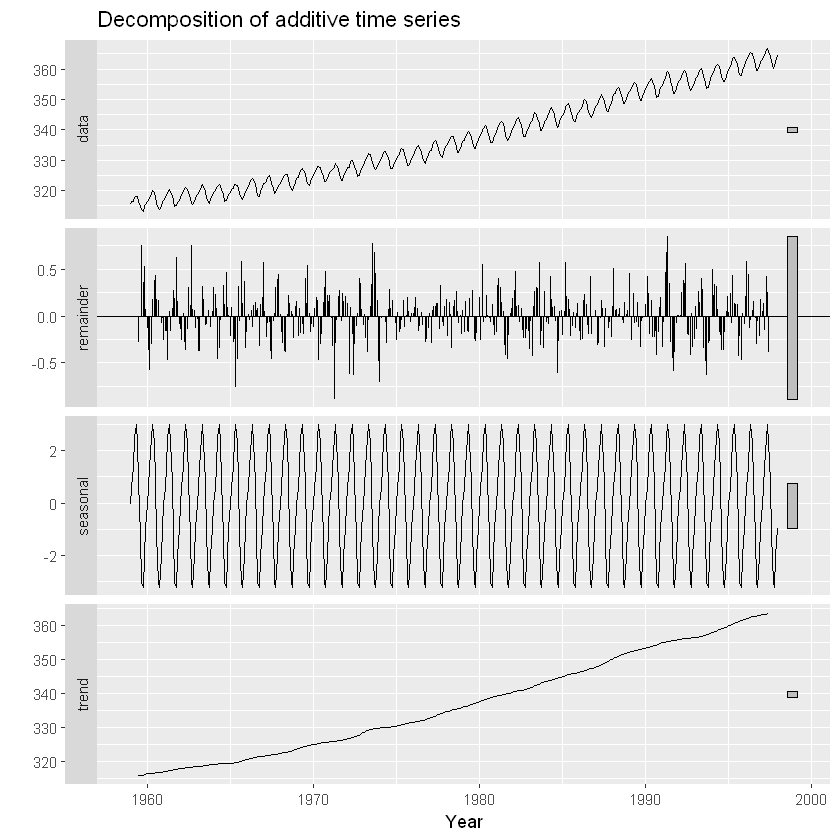

In [29]:
autoplot(decompose(co2,type="additive"))+
xlab('Year')

## Differencing - parametric method

**Applying diff function to co2 dataset to remove trend**

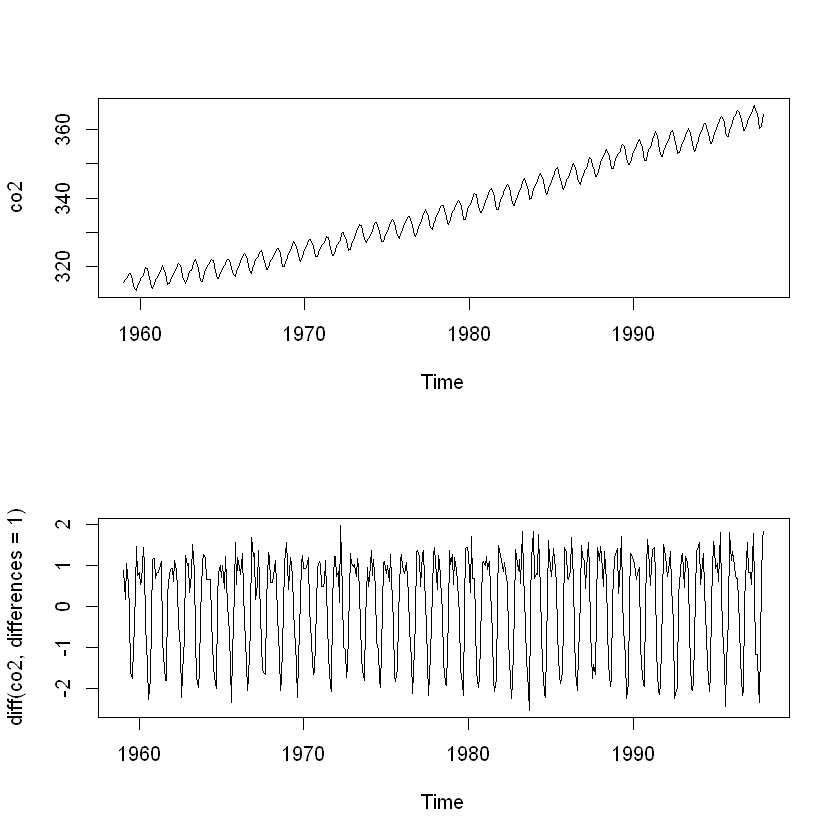

In [31]:
par(mfrow=c(2,1))
plot(co2)
plot(diff(co2,differences=1))

**Applying diff function to co2 dataset to remove trend and seasonal**

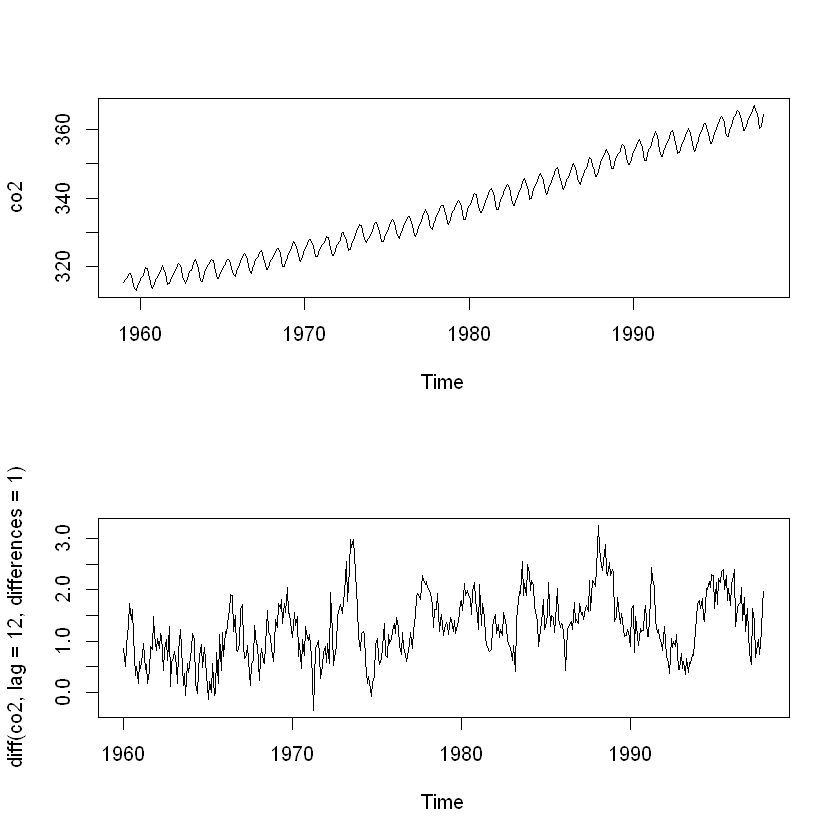

In [32]:
par(mfrow=c(2,1))
plot(co2)
plot(diff(co2,lag=12,differences=1))

**We just have the noise remaining**

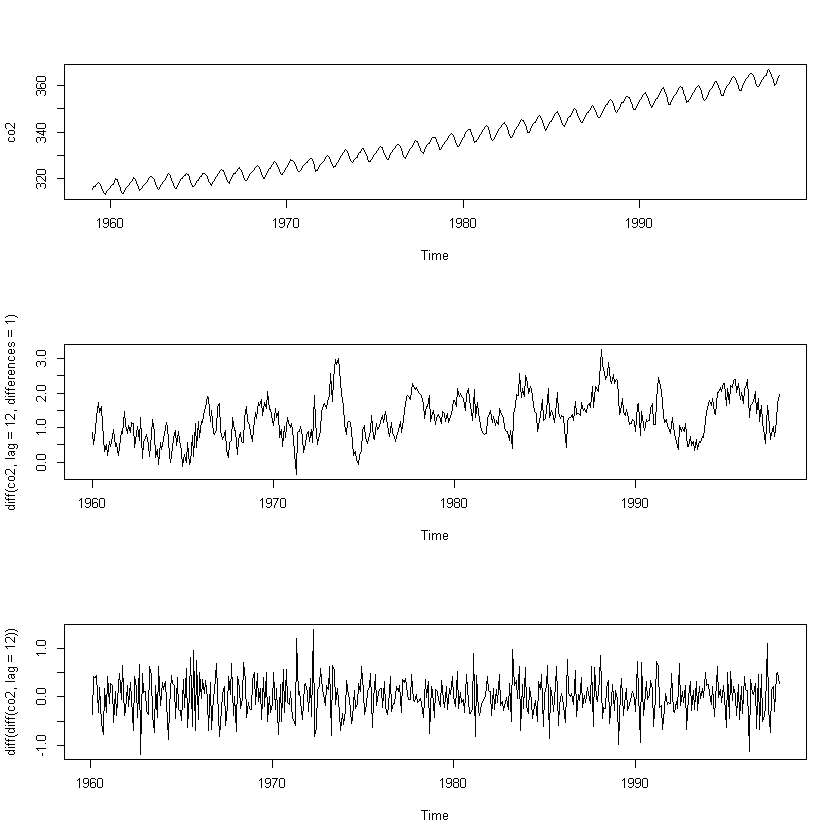

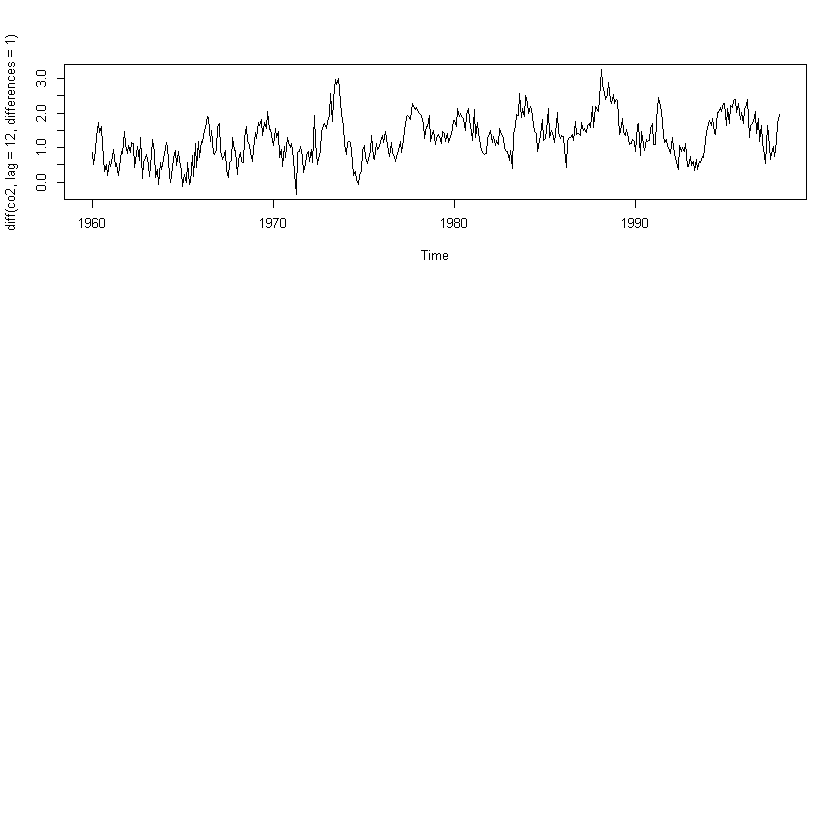

In [35]:
par(mfrow=c(3,1))
plot(co2)
plot(diff(co2,lag=12,differences=1))
plot(diff(diff(co2,lag=12)))
plot(diff(co2,lag=12,differences=1))

### Testing if our residual is a white noise ?

In [36]:
Box.test(diff(co2,lag=12,differences=1),lag=10,type="Ljung-Box")


	Box-Ljung test

data:  diff(co2, lag = 12, differences = 1)
X-squared = 1415.4, df = 10, p-value < 2.2e-16


**Auto correlation of the noise**

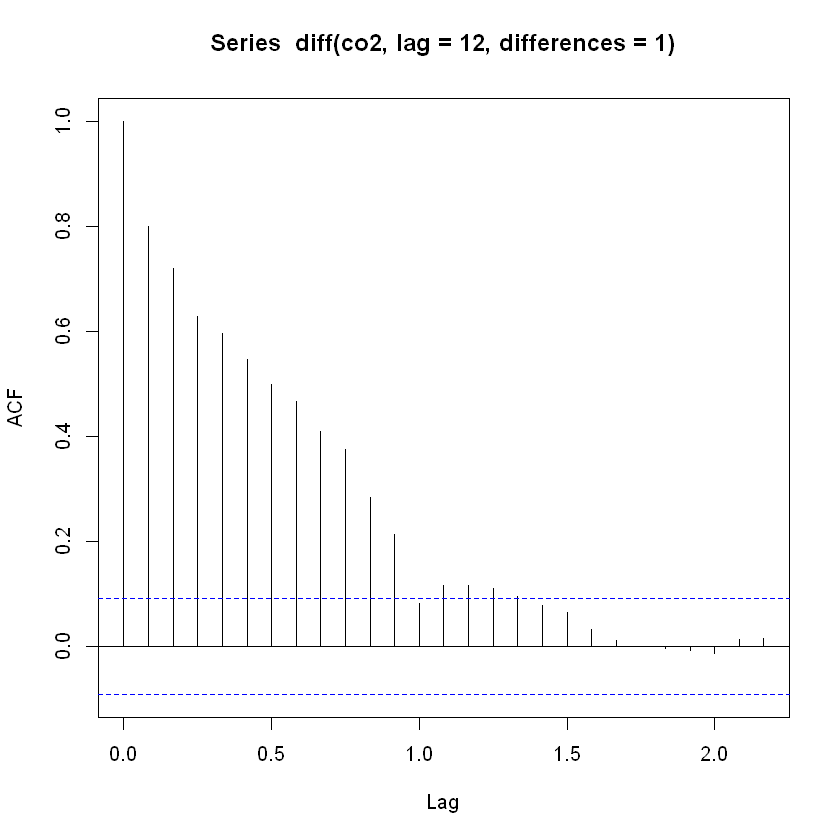

In [37]:
tmp=acf(diff(co2,lag=12,differences=1))

### Exercice on AirPassengers

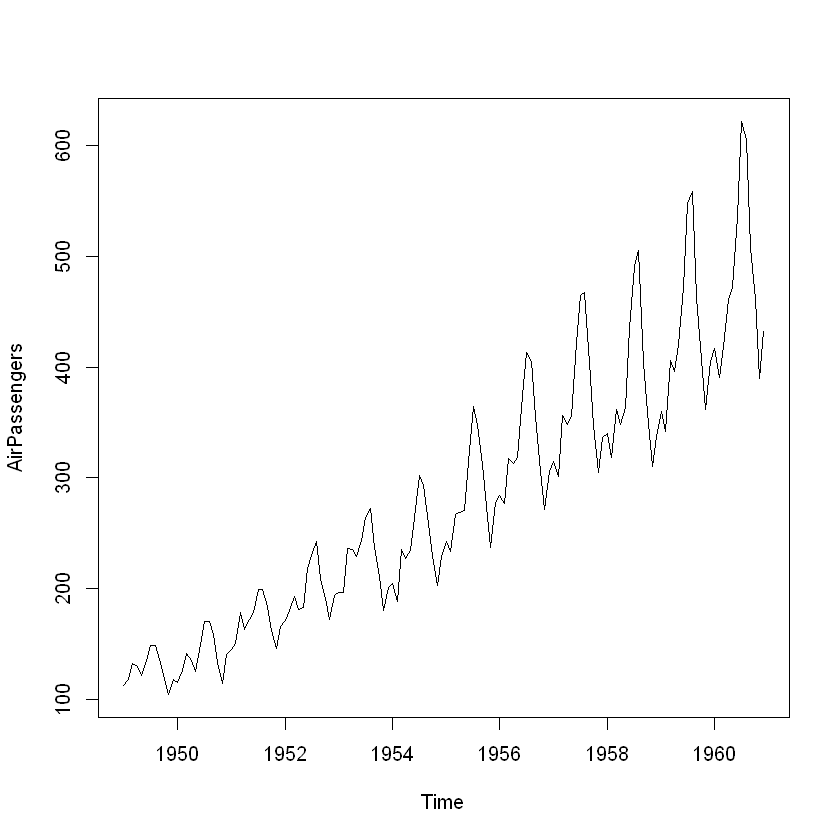

In [39]:
plot(AirPassengers)

**It seems to have trend and seasonnality with a muplicativ effect**

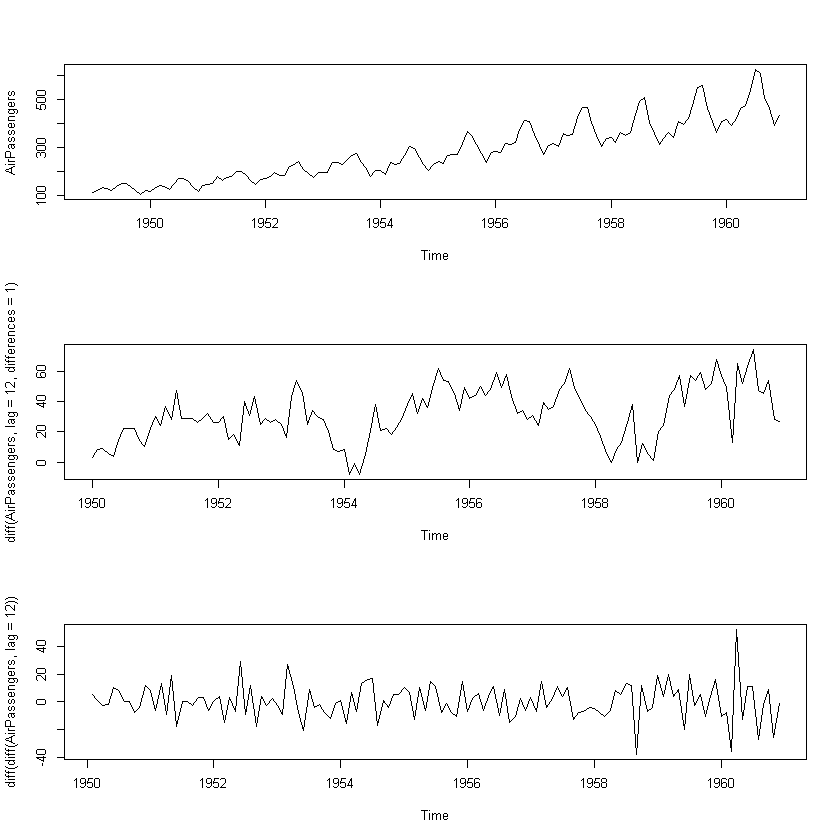

In [54]:
par(mfrow=c(3,1))
plot(AirPassengers)
plot(diff(AirPassengers,lag=12,differences=1))
plot(diff(diff(AirPassengers,lag=12)))


**Check the residual noise**

In [58]:
Box.test(diff(diff(AirPassengers,lag=12,differences=1)),lag=10,type="Ljung-Box")


	Box-Ljung test

data:  diff(diff(AirPassengers, lag = 12, differences = 1))
X-squared = 25.451, df = 10, p-value = 0.004553


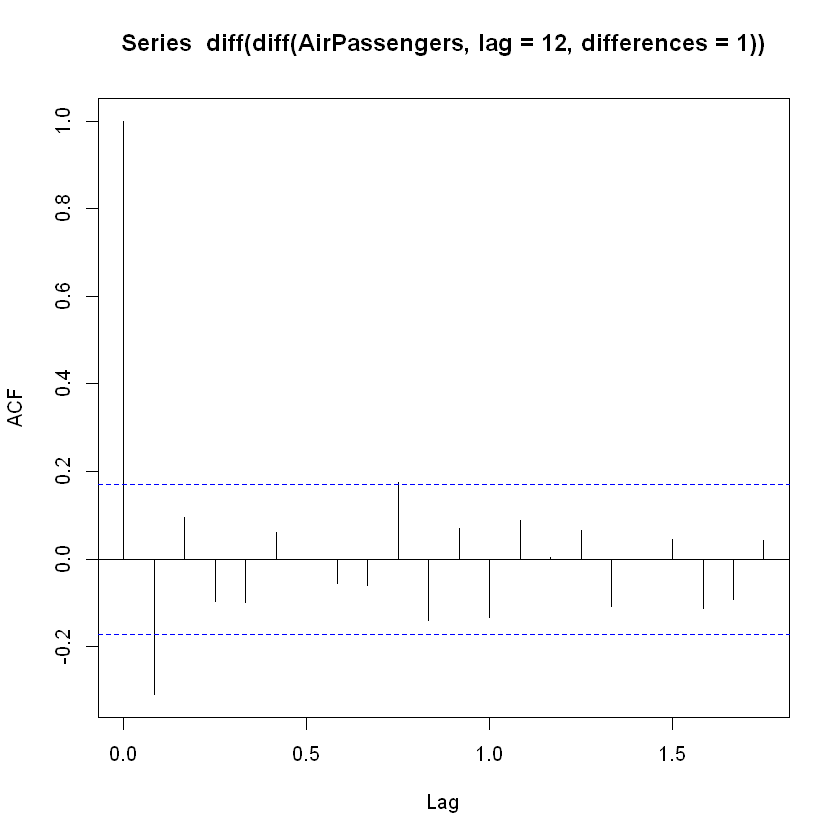

In [57]:
acf(diff(diff(AirPassengers,lag=12,differences=1)))

**p-value is clode to 0 so we reject the fact that it is a white noise**

corr(Xt,Xt-1)=-0.3 : a large number of passenger month n then month n+1 should be small

**ATTENTION : here we should use LOG since multiplicative effect**

### Exercice AirPassengers With Log to take in account multiplicative effect

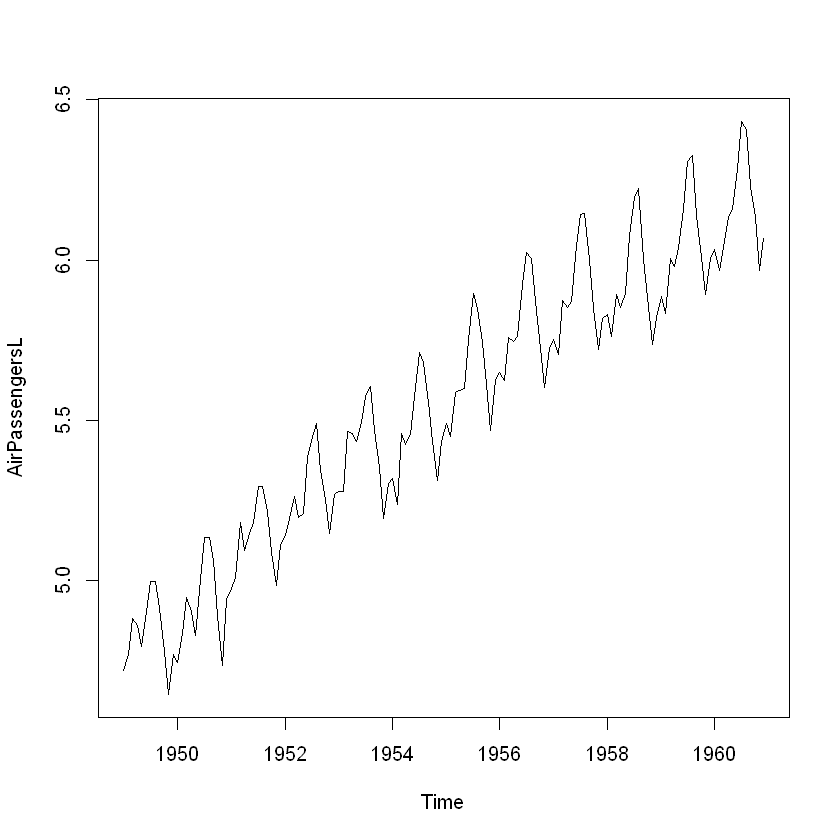

In [59]:
AirPassengersL=log(AirPassengers)
plot(AirPassengersL)

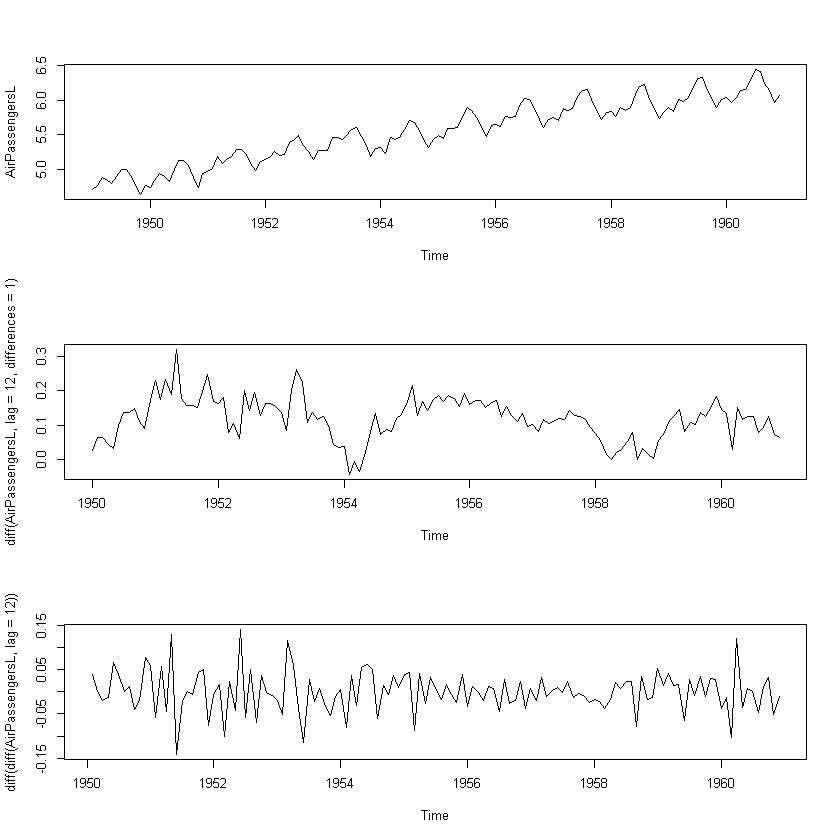

In [60]:
par(mfrow=c(3,1))
plot(AirPassengersL)
plot(diff(AirPassengersL,lag=12,differences=1))
plot(diff(diff(AirPassengersL,lag=12)))

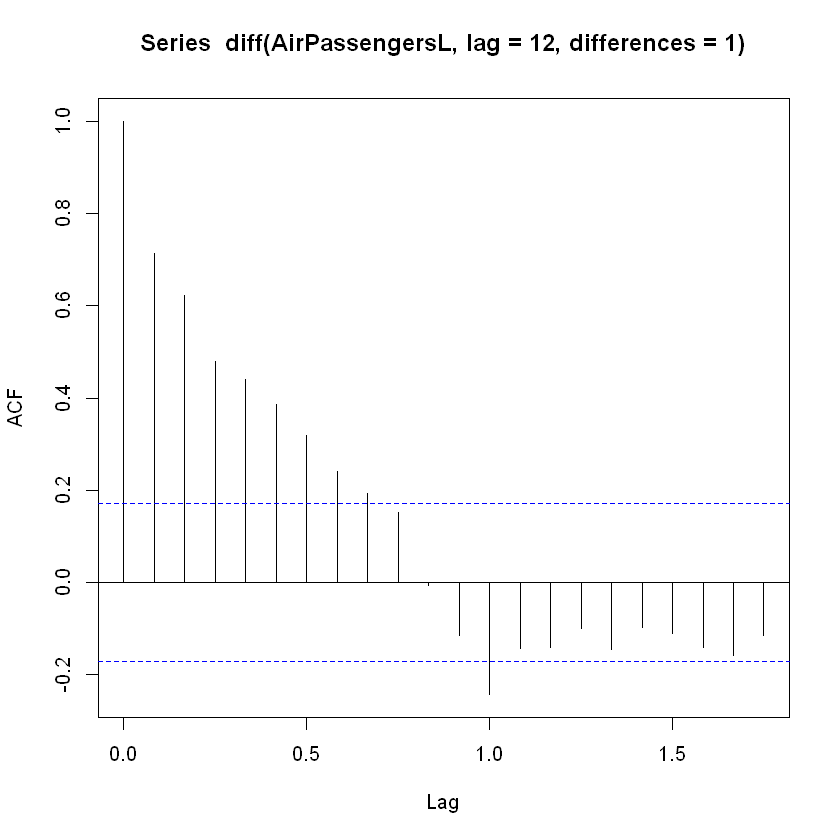

In [63]:
acf(diff(AirPassengersL,lag=12,differences=1))

**Still a linear trend. So we apply differanciation again**

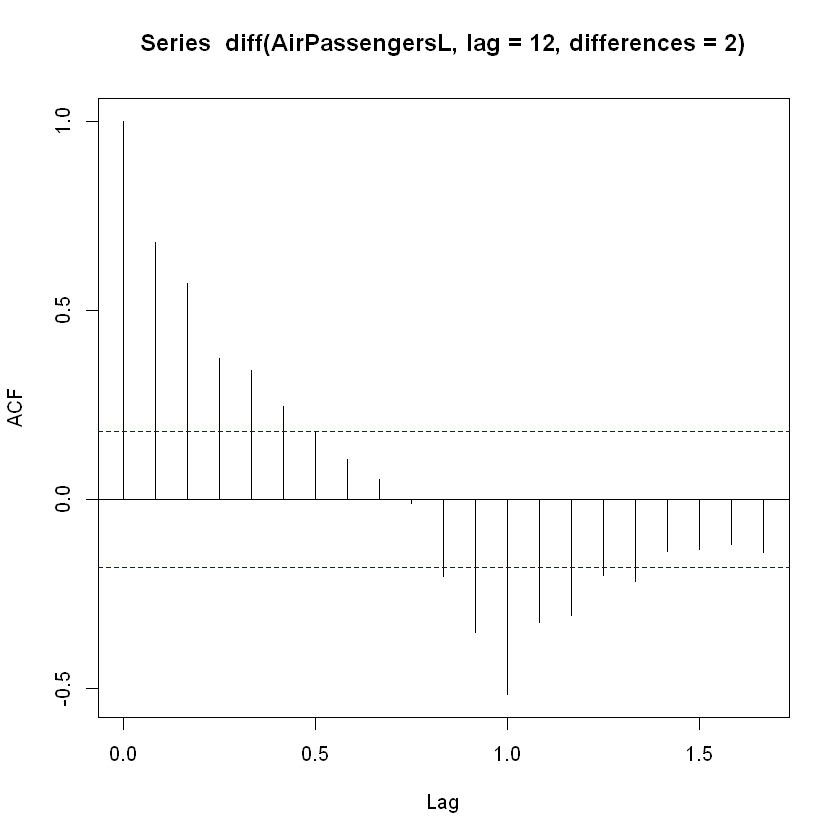

In [64]:
acf(diff(AirPassengersL,lag=12,differences=2))

**After applying differenciation a second time and still the same graph, so something else is there ... we will see later ..**

### Exercice on Covid 19

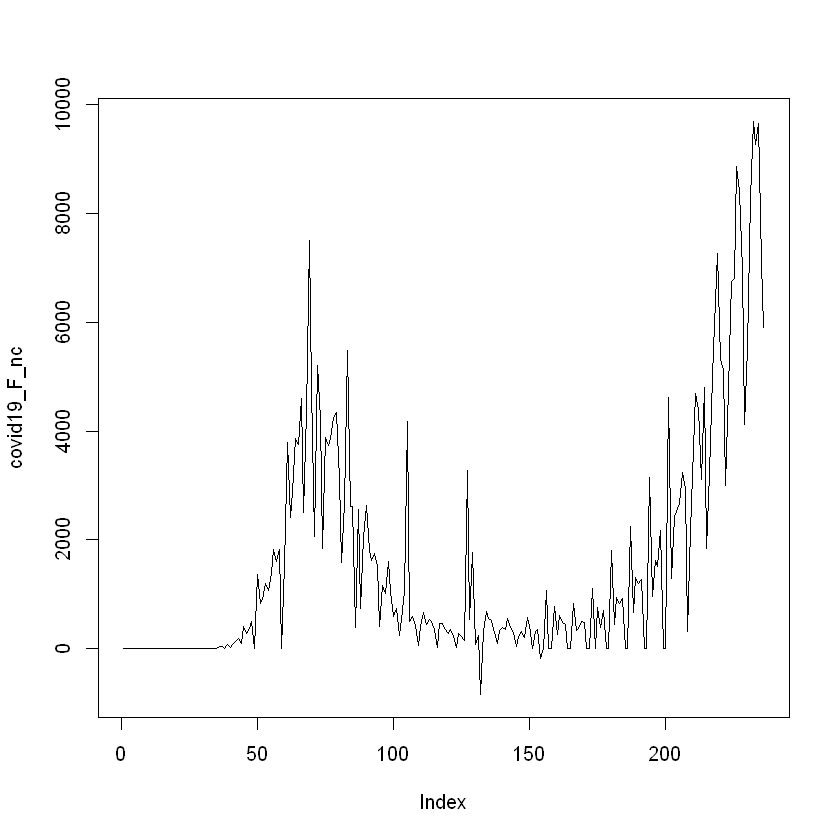

In [53]:
plot(covid19_F_nc,type='l')

**We see here a trend and a seasonality of 7 days**

**We will remove this with differanciation**

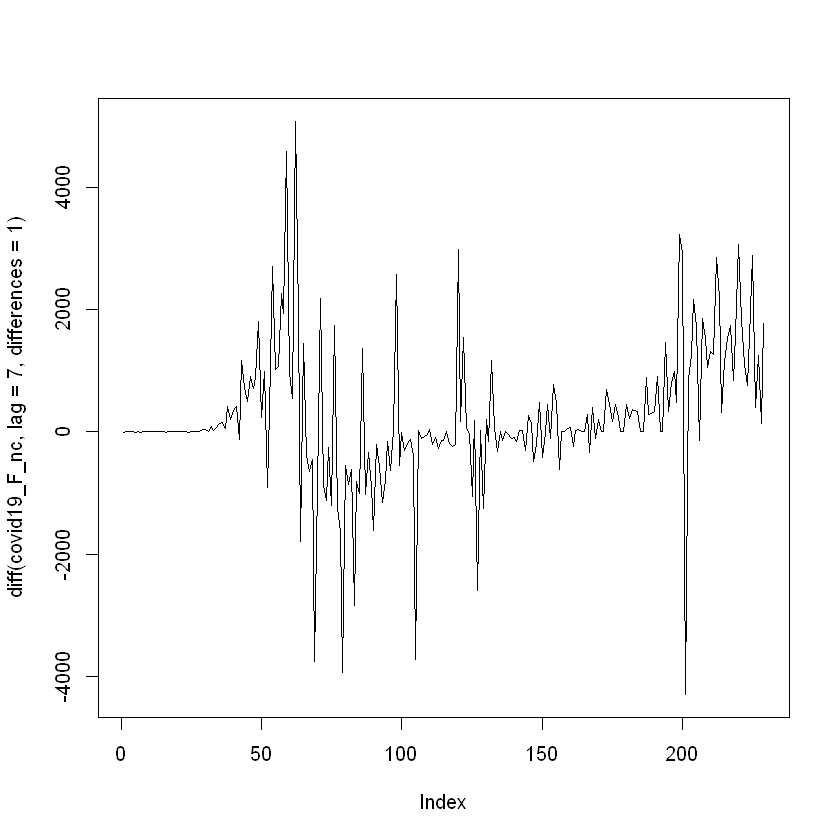

In [65]:
plot(diff(covid19_F_nc,lag=7,differences=1),type='l')

**We can see that we still have a trend so we apply differentiation again**

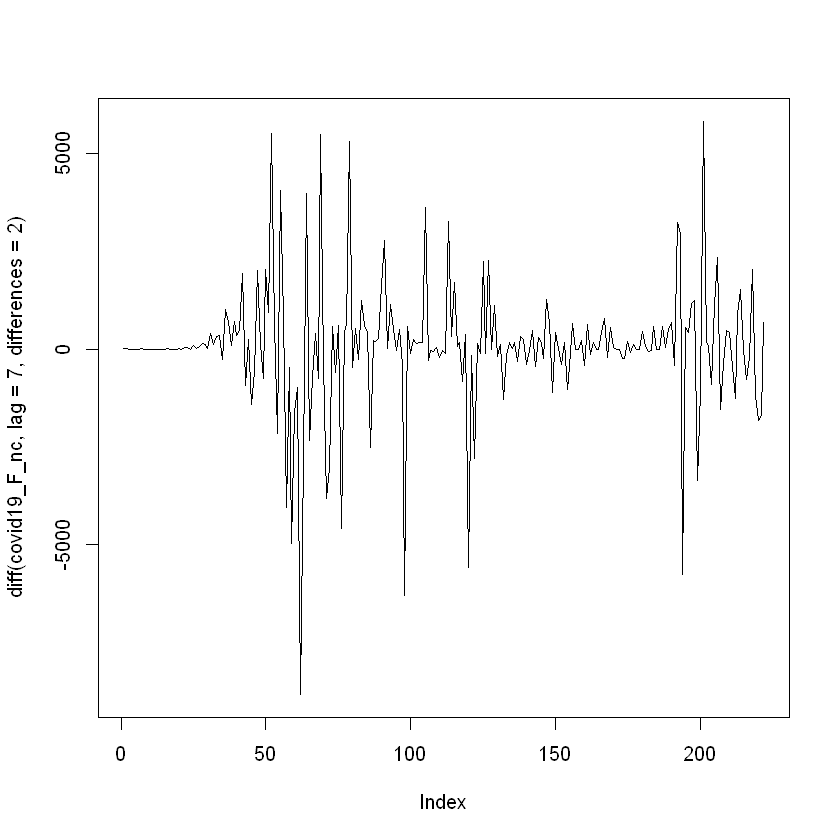

In [67]:
plot(diff(covid19_F_nc,lag=7,differences=2),type='l')

**Now we can analyse the white noise**

In [68]:
Box.test(diff(covid19_F_nc,lag=7,differences=2),lag=10,type="Ljung-Box")


	Box-Ljung test

data:  diff(covid19_F_nc, lag = 7, differences = 2)
X-squared = 95.766, df = 10, p-value = 3.331e-16


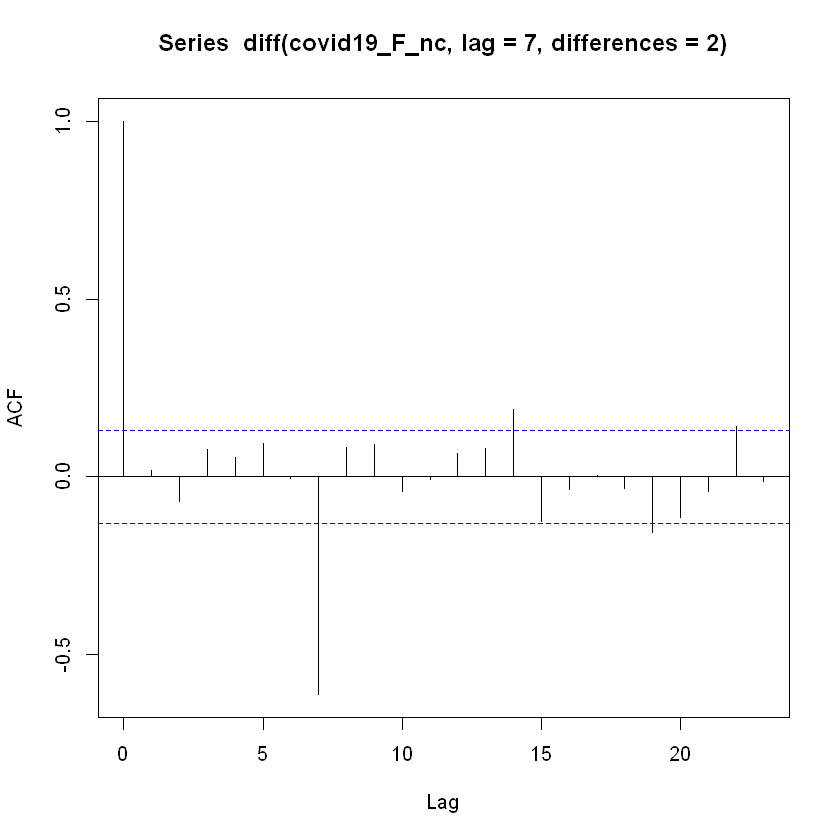

In [69]:
acf(diff(covid19_F_nc,lag=7,differences=2))

**We reject the fact that there is a white noise since pvalue is closed to 0**

### Exercice Google stock Price

In [73]:
library(fpp2)

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v fma       2.4     v expsmooth 2.3





In [72]:
install.packages('fpp2')

Installing package into 'C:/Users/erick/R'
(as 'lib' is unspecified)



package 'fpp2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erick\AppData\Local\Temp\Rtmp8o1elM\downloaded_packages


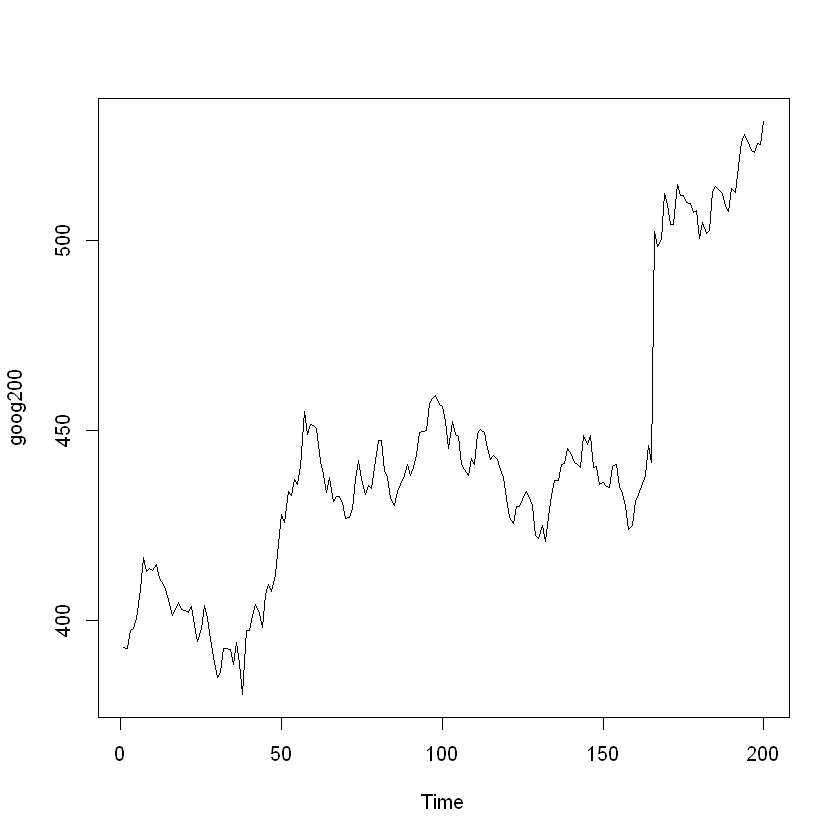

In [74]:
plot(goog200)

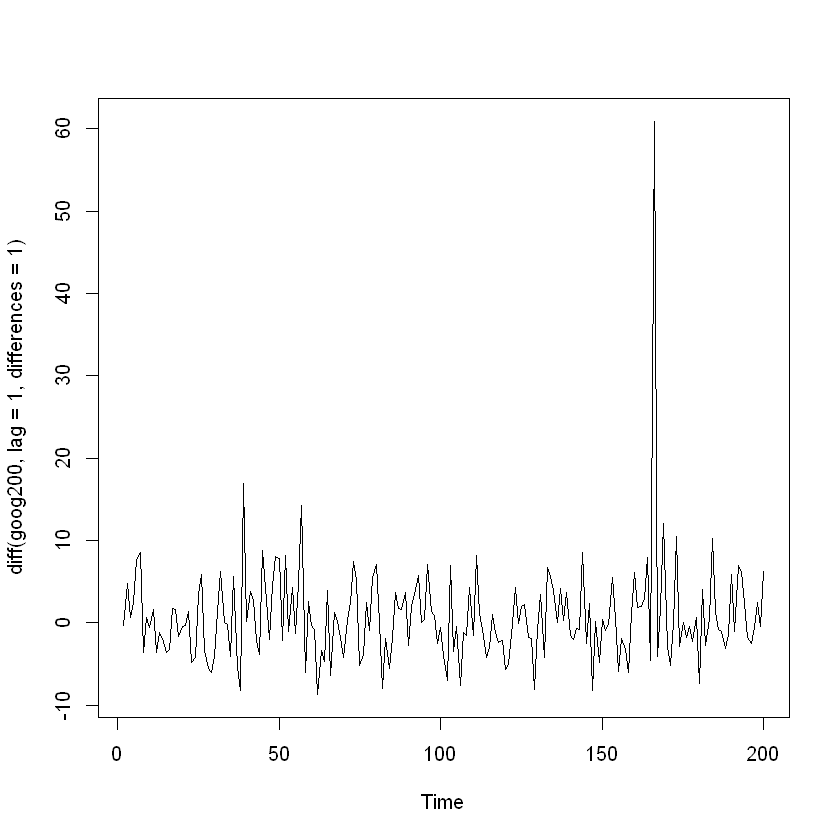

In [75]:
plot(diff(goog200,lag=1,differences=1),type='l')

In [76]:
Box.test(diff(goog200,lag=1,differences=1),lag=10,type="Ljung-Box")


	Box-Ljung test

data:  diff(goog200, lag = 1, differences = 1)
X-squared = 11.031, df = 10, p-value = 0.3551


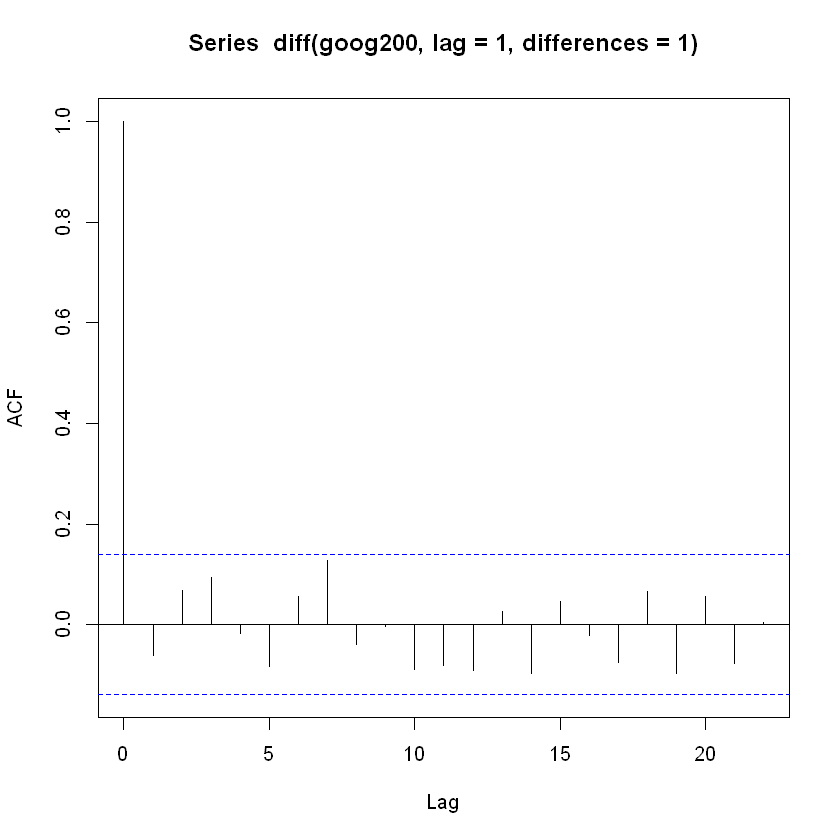

In [77]:
acf(diff(goog200,lag=1,differences=1))

**Box Test is true, we accept that we have a white noise**

**The correlation plot shows that there is no correlation**

## ARIMA Models

### Simulate auto-regressive models with arima.sim function

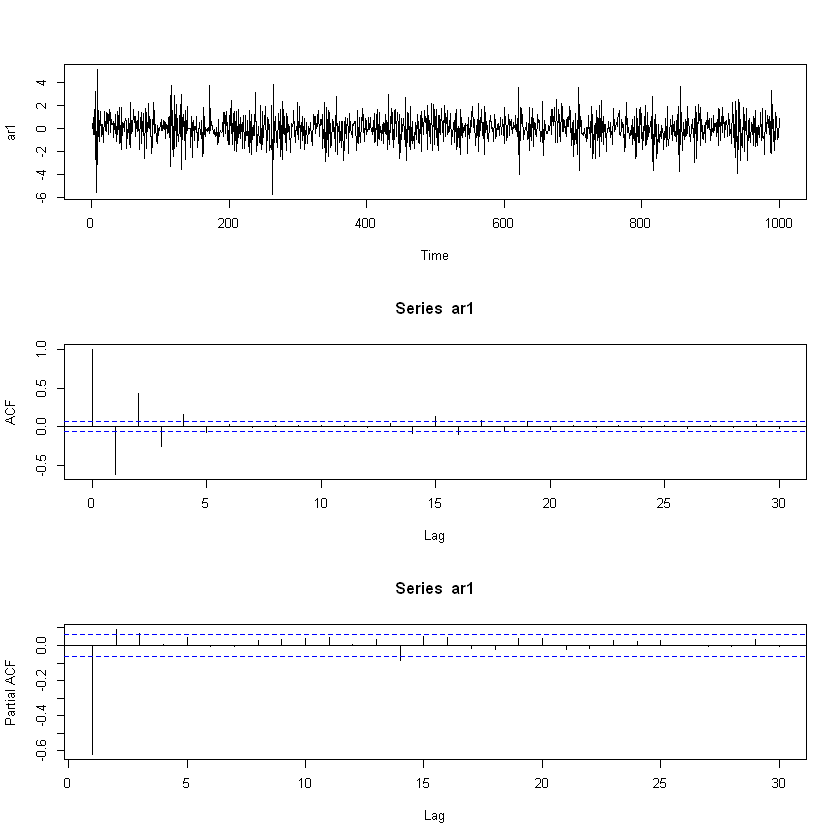

In [97]:
par(mfrow=c(3,1))
modele<-list(ar=c(-0.5,.2,+.1))
ar1<-arima.sim(modele,1000)
plot.ts(ar1)
acf(ar1)
pacf(ar1)

**TAKE CARE : If the time serie size is 1000, it's ok. With only 100 observations it is not so clear**

### Simulate moving average models with arima.sim function

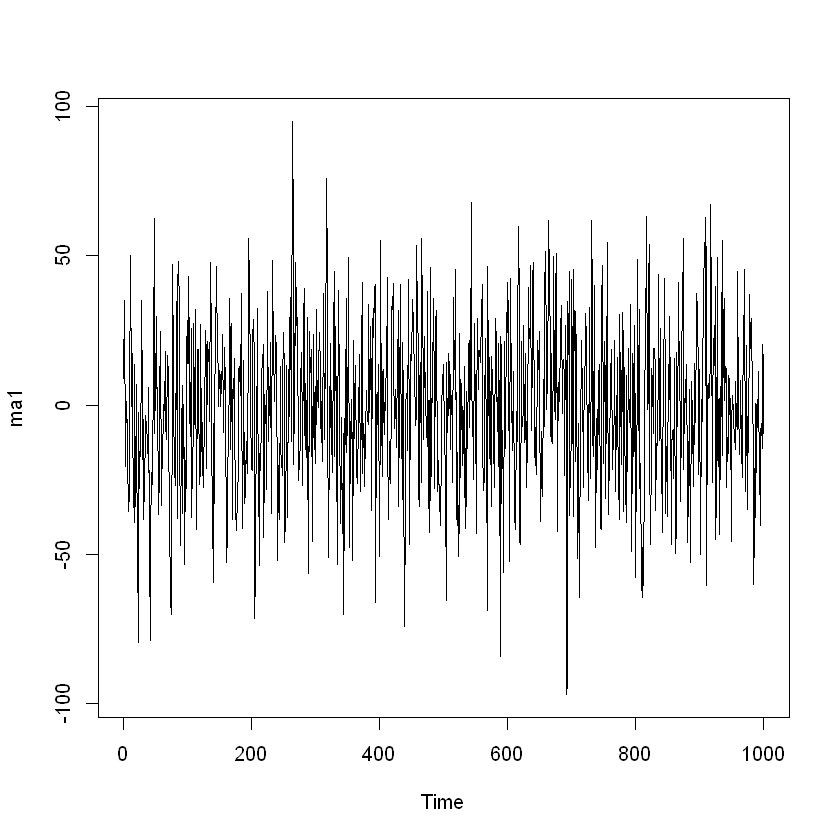

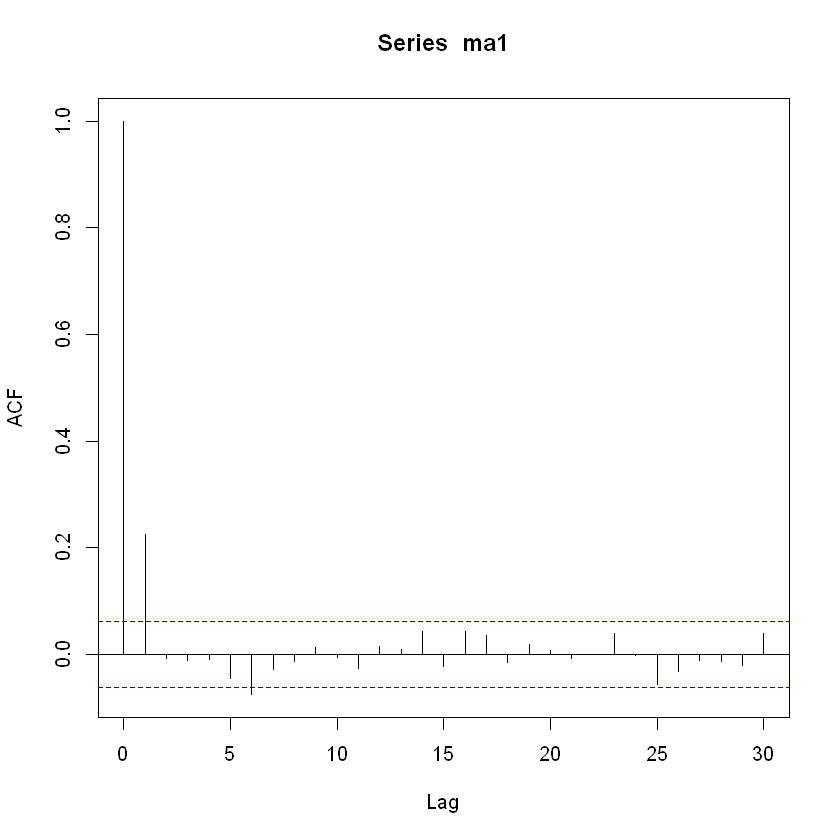

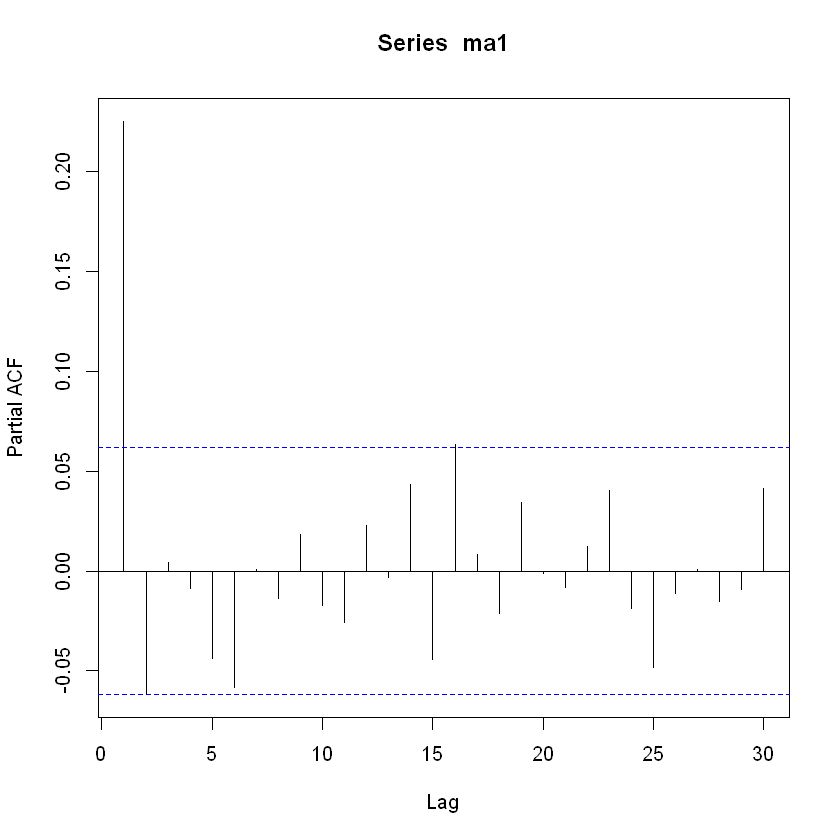

In [99]:
modele<-list(ma=c(28,5))
ma1<-arima.sim(modele,1000)
plot.ts(ma1)
acf(ma1)
pacf(ma1)

### non-seasonal ARIMA models 

In [ ]:
library(fpp2)
autoplot(uschange[,"Consumption"]) +
xlab("Year") + ylab("Quarterly percentage change")

In [100]:
Arima(uschange[,"Consumption"],order=c(2,0,2))

Series: uschange[, "Consumption"] 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2    mean
      1.3908  -0.5813  -1.1800  0.5584  0.7463
s.e.  0.2553   0.2078   0.2381  0.1403  0.0845

sigma^2 estimated as 0.3511:  log likelihood=-165.14
AIC=342.28   AICc=342.75   BIC=361.67

**Looking for the smaller AIC (d=0 because no trend)**

### Quick solution, use auto.arima function to get the parameters automatically

In [101]:
auto.arima(uschange[,"Consumption"])

Series: uschange[, "Consumption"] 
ARIMA(1,0,3)(1,0,1)[4] with non-zero mean 

Coefficients:
          ar1     ma1     ma2     ma3     sar1    sma1    mean
      -0.3548  0.5958  0.3437  0.4111  -0.1376  0.3834  0.7460
s.e.   0.1592  0.1496  0.0960  0.0825   0.2117  0.1780  0.0886

sigma^2 estimated as 0.3481:  log likelihood=-163.34
AIC=342.67   AICc=343.48   BIC=368.52

### More complexe but allow to understand what happens

**differentiation, .....**

In [102]:
Arima(uschange[,"Consumption"],order=c(3,0,0))

Series: uschange[, "Consumption"] 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.2274  0.1604  0.2027  0.7449
s.e.  0.0713  0.0723  0.0712  0.1029

sigma^2 estimated as 0.3494:  log likelihood=-165.17
AIC=340.34   AICc=340.67   BIC=356.5

**In fact we get a better result with manual AIC = 340 then with automatic AIC = 342 !!**

### Forecasting with ARMA

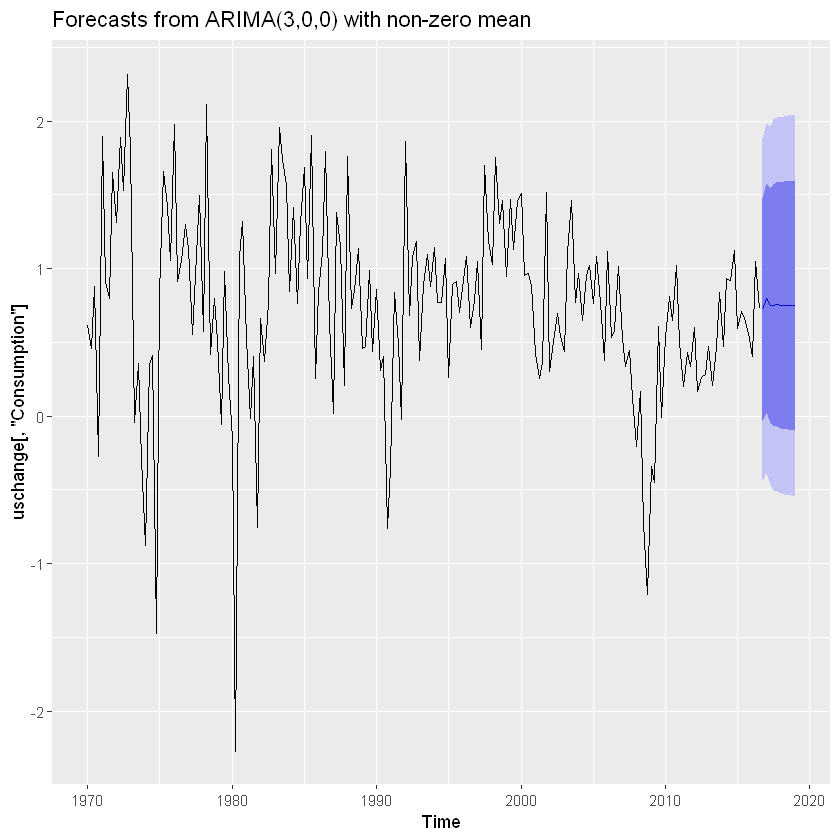

In [103]:
fit=Arima(uschange[,"Consumption"],order=c(3,0,0))
autoplot(forecast(fit,h=10))

### Exercice on us change

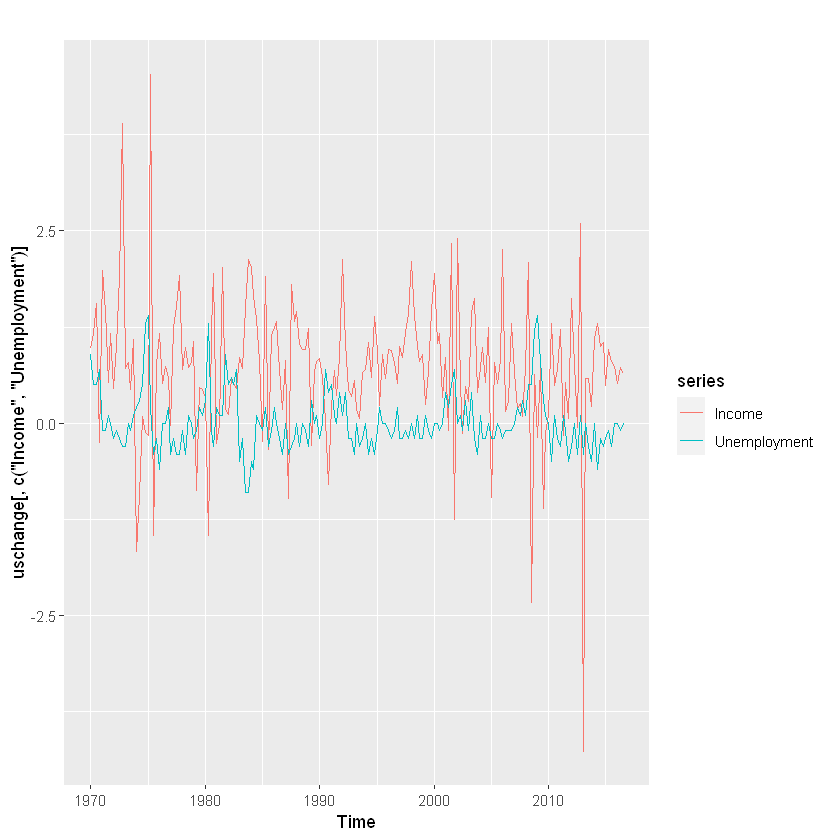

In [104]:
autoplot(uschange[,c("Income","Unemployment")])

**First method use automatique solution to find arima**

In [106]:
auto.arima(uschange[,c("Income")])

Series: uschange[, c("Income")] 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      0.7176
s.e.  0.0679

sigma^2 estimated as 0.8674:  log likelihood=-251.54
AIC=507.08   AICc=507.15   BIC=513.55

In [107]:
auto.arima(uschange[,c("Unemployment")])

Series: uschange[, c("Unemployment")] 
ARIMA(2,0,0)(1,0,2)[4] with zero mean 

Coefficients:
         ar1     ar2    sar1     sma1     sma2
      0.4412  0.2505  0.0152  -0.2894  -0.2290
s.e.  0.0751  0.0813  0.2844   0.2773   0.1219

sigma^2 estimated as 0.08953:  log likelihood=-37.82
AIC=87.64   AICc=88.11   BIC=107.03

**For this one ARIMA(2,0,0)**

**Trying with Manual methode**

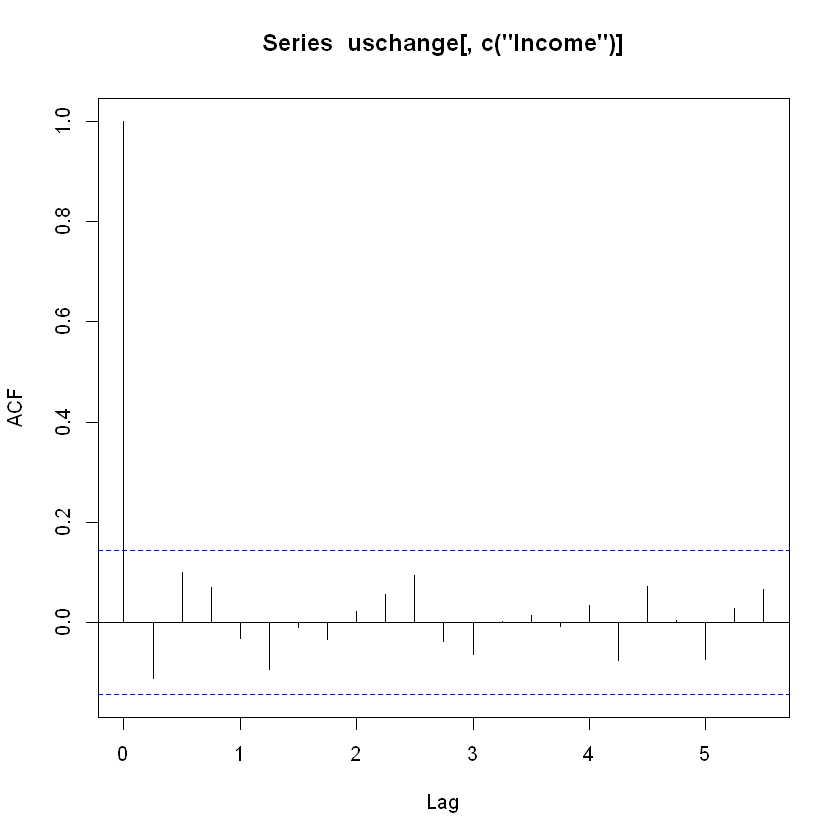

In [109]:
acf(uschange[,c("Income")])

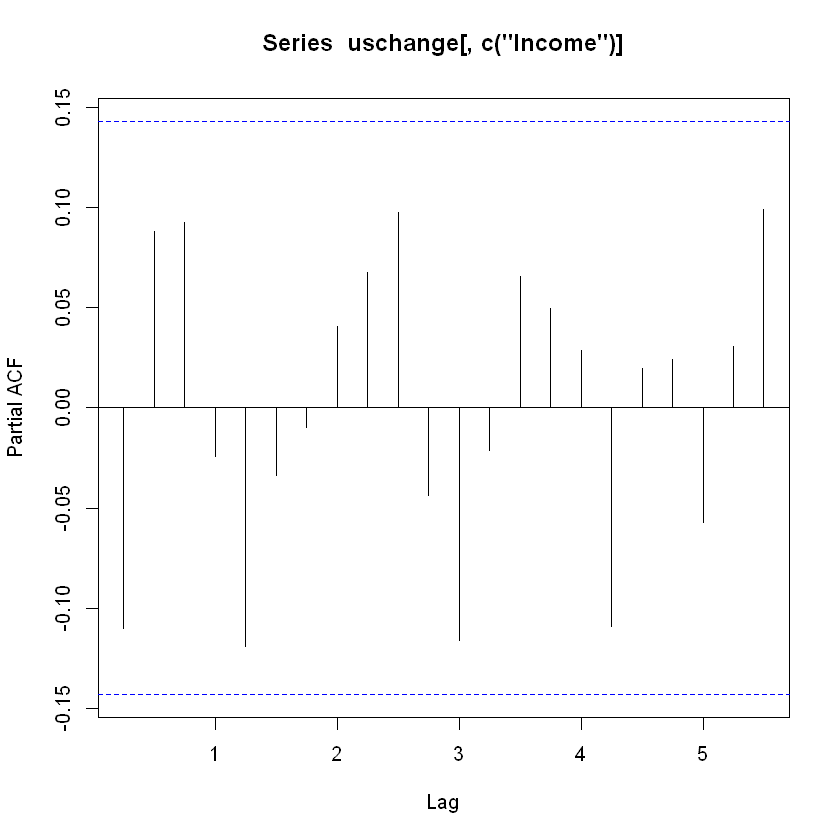

In [110]:
pacf(uschange[,c("Income")])

In [111]:
Box.test(uschange[,c("Income")],lag=10,type="Ljung-Box")


	Box-Ljung test

data:  uschange[, c("Income")]
X-squared = 9.8076, df = 10, p-value = 0.4575


**Noise (not white because not centered) so no stochastic part for this one => best one = mean**

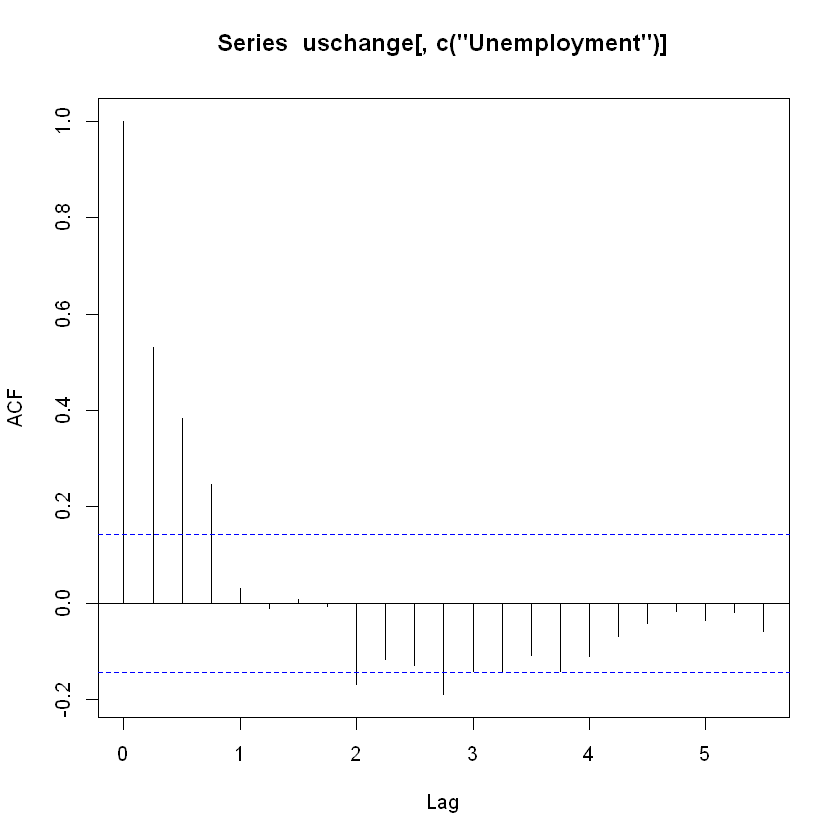

In [112]:
acf(uschange[,c("Unemployment")])

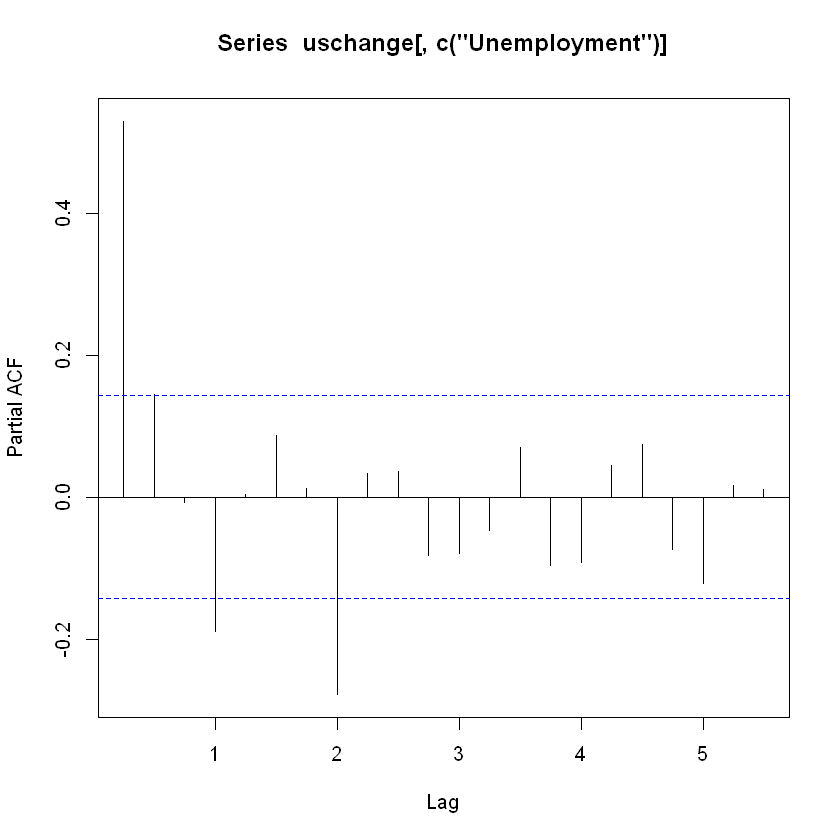

In [113]:
pacf(uschange[,c("Unemployment")])

**I would say MA3 ARMA(0,0,3) - automatic for ARMA(2,0,0), AIC = 87.64**

In [151]:
Arima(uschange[,"Unemployment"],order=c(0,0,3))

Series: uschange[, "Unemployment"] 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
         ma1     ma2     ma3    mean
      0.4804  0.4845  0.3972  0.0108
s.e.  0.0694  0.0848  0.0702  0.0517

sigma^2 estimated as 0.09281:  log likelihood=-41.47
AIC=92.94   AICc=93.27   BIC=109.09

In [145]:
fit0=Arima(uschange[,"Unemployment"],order=c(0,0,3))

**We check the residuals, to be sure that their are gaussian**


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 10.983, df = 4, p-value = 0.02675

Model df: 4.   Total lags used: 8



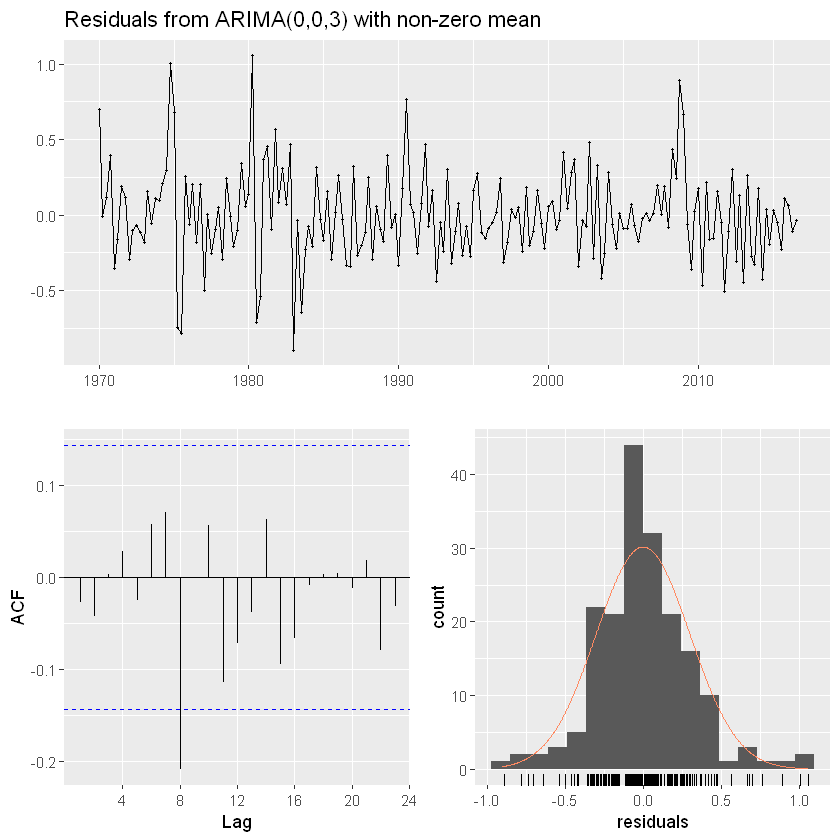

In [146]:
checkresiduals(fit0)

**Not good, p-value < 0.05, so try another one**


	Ljung-Box test

data:  Residuals from ARIMA(8,0,0) with non-zero mean
Q* = 5.1242, df = 3, p-value = 0.1629

Model df: 9.   Total lags used: 12



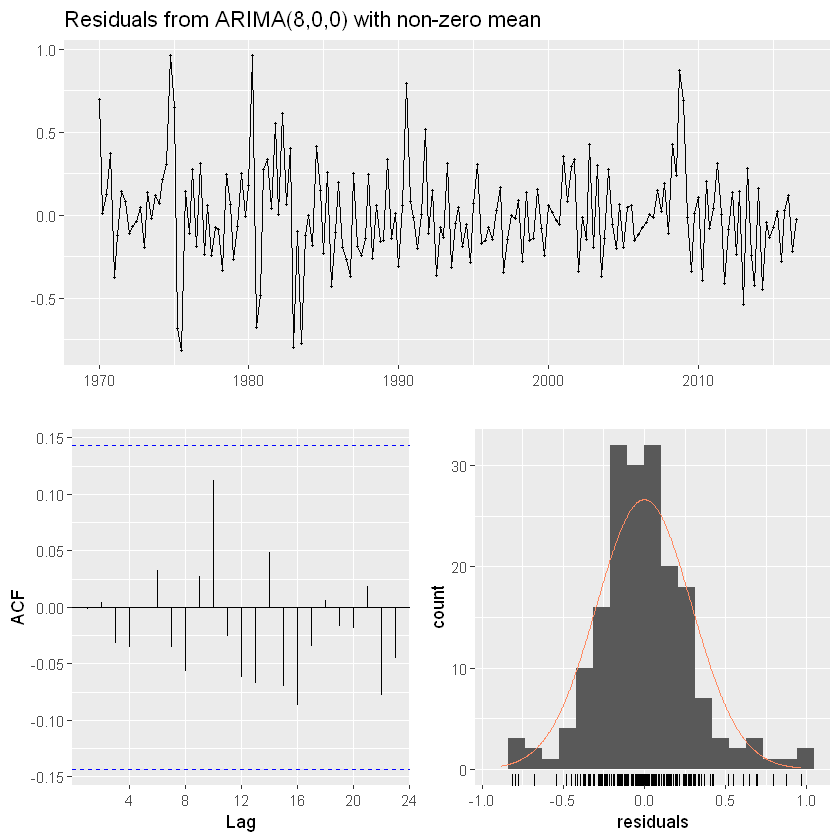

In [149]:
fit0=Arima(uschange[,"Unemployment"],order=c(8,0,0))
checkresiduals(fit0)

This time it is ok p-value > 0.05

**We can find a better p-value with (8,0,2) - also ok for residuals - so let's forecast with ARMA(8,0,2)**

**Forecast with this hypothesis**

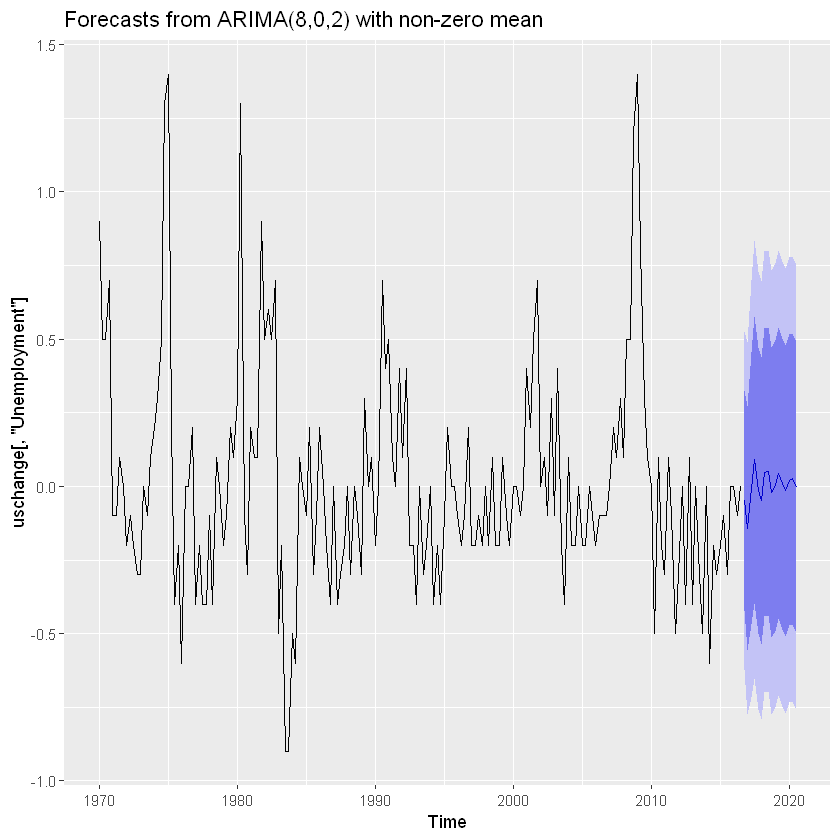

In [154]:
fit2=Arima(uschange[,"Unemployment"],order=c(8,0,2))
autoplot(forecast(fit2,h=16))

### Exercice 1 on Production data

In [ ]:
find two models.  take care lag=1 for differantiation

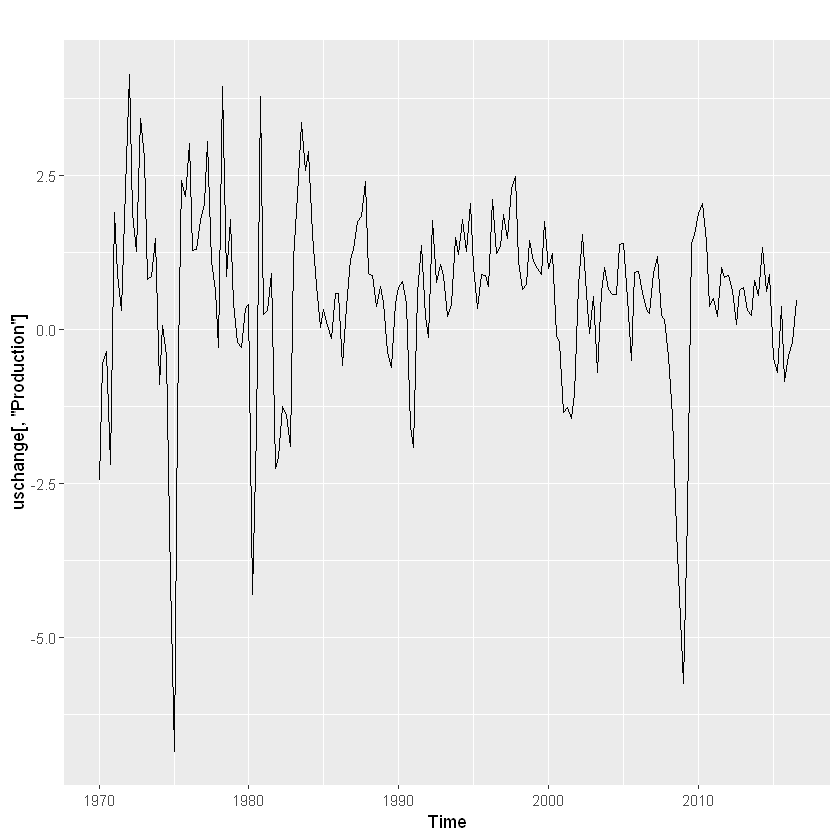

In [128]:
autoplot(uschange[,"Production"])

**No trend it seems, let's look if it is noise ?

In [129]:
Box.test(uschange[,c("Production")],lag=10,type="Ljung-Box")


	Box-Ljung test

data:  uschange[, c("Production")]
X-squared = 106.92, df = 10, p-value < 2.2e-16


**White Noise is rejected**

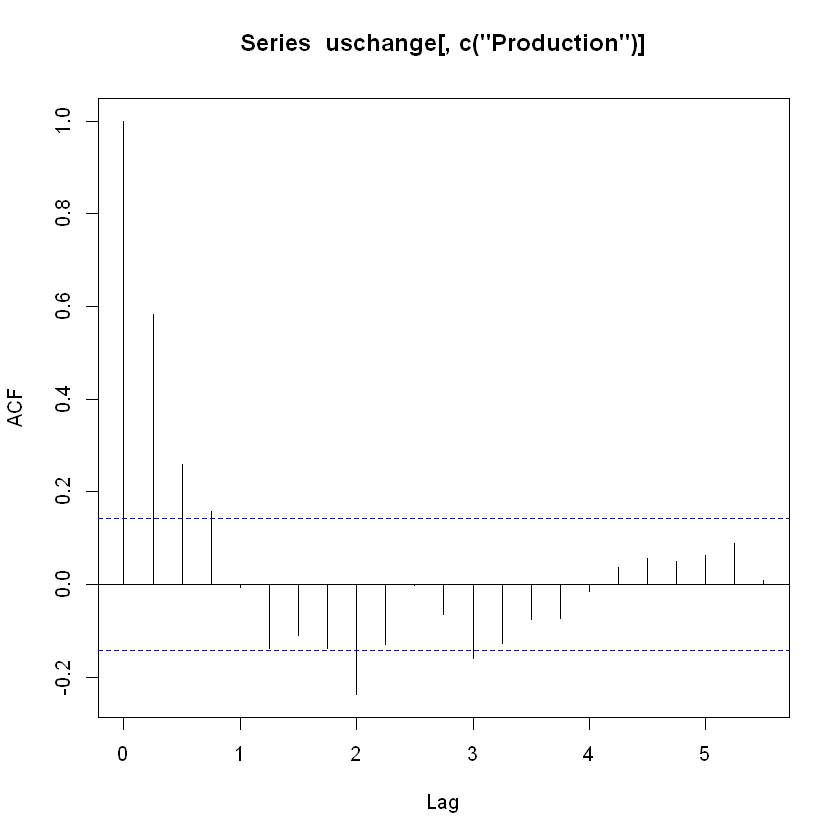

In [132]:
acf(uschange[,c("Production")])

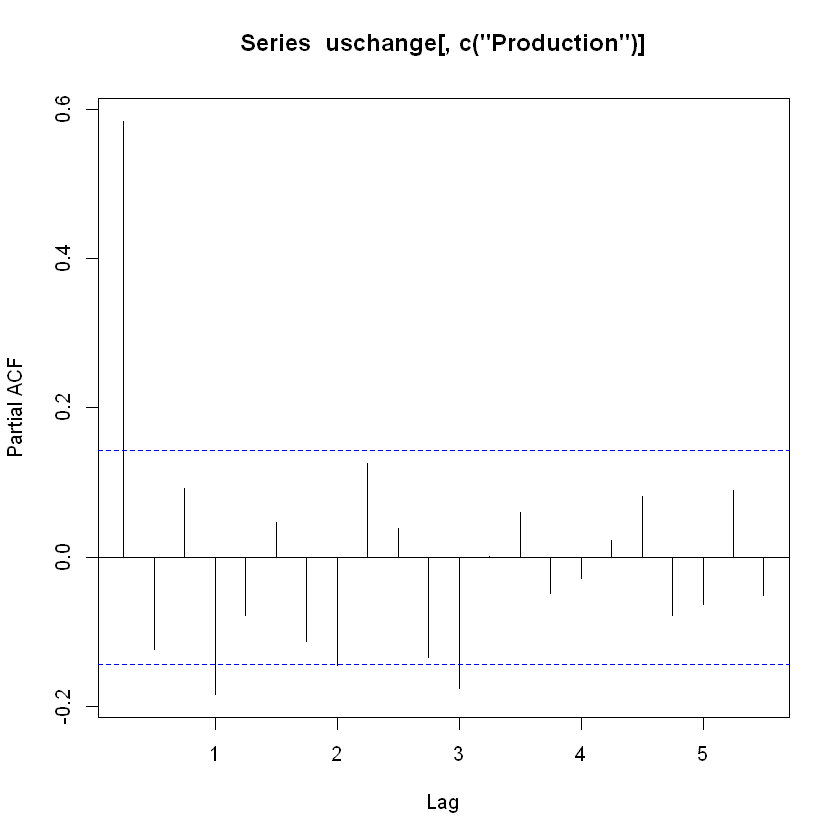

In [131]:
pacf(uschange[,c("Production")])

In [174]:
fit0=Arima(uschange[,"Production"],order=c(0,0,12))

In [175]:
fit0$aic

[1] 605.7428

In [179]:
res=checkresiduals(fit0,plot=FALSE)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,12) with non-zero mean
Q* = 5.0375, df = 3, p-value = 0.1691

Model df: 13.   Total lags used: 16



In [178]:
res$p.value

[1] 0.1690751


	Ljung-Box test

data:  Residuals from ARIMA(0,0,12) with non-zero mean
Q* = 5.0375, df = 3, p-value = 0.1691

Model df: 13.   Total lags used: 16



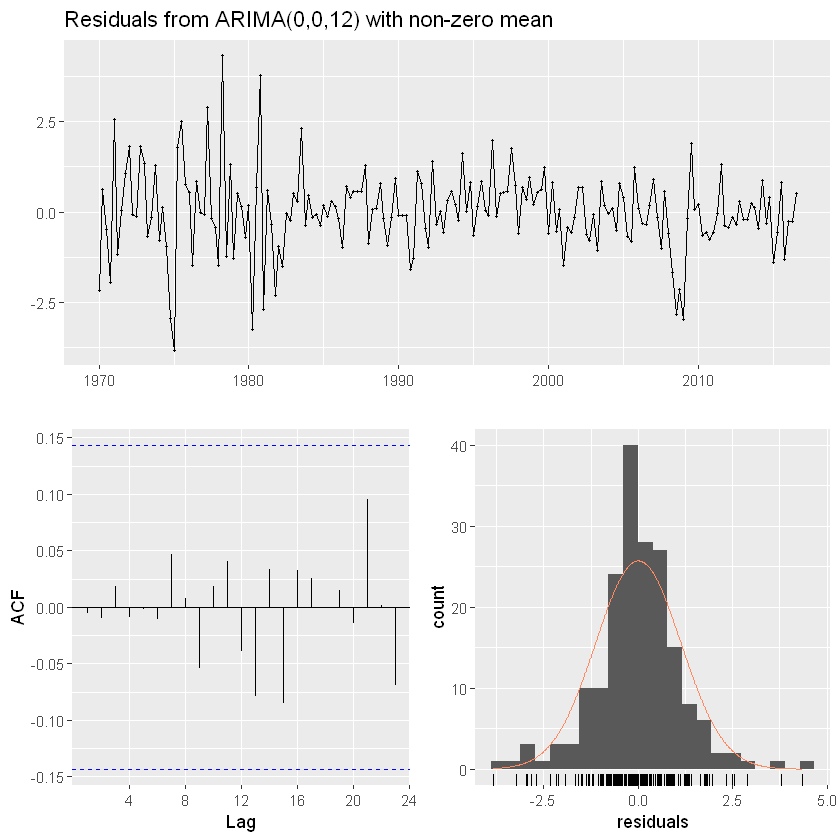

In [176]:
checkresiduals(fit0)

In [185]:
t_aic=c()
t_pvalue=c()
for (i in 0:12) {
    for (j in 0:12) {
        fit0=Arima(uschange[,"Production"],order=c(i,0,j))
        res=checkresiduals(fit0,plot=FALSE)
        print(i)
        print(j)
        if (res$p.value > 0.05) {
            t_aic[(j+1)+i*13] = fit0$aic
            t_pvalue[(j+1)+i*13] = res$p.value
        }
    }
}


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 103.54, df = 7, p-value < 2.2e-16

Model df: 1.   Total lags used: 8

[1] 0
[1] 0

	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 25.448, df = 6, p-value = 0.000282

Model df: 2.   Total lags used: 8

[1] 0
[1] 1

	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 18.99, df = 5, p-value = 0.00193

Model df: 3.   Total lags used: 8

[1] 0
[1] 2

	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 17.417, df = 4, p-value = 0.001604

Model df: 4.   Total lags used: 8

[1] 0
[1] 3

	Ljung-Box test

data:  Residuals from ARIMA(0,0,4) with non-zero mean
Q* = 11.815, df = 3, p-value = 0.008044

Model df: 5.   Total lags used: 8

[1] 0
[1] 4

	Ljung-Box test

data:  Residuals from ARIMA(0,0,5) with non-zero mean
Q* = 12.997, df = 3, p-value = 0.004643

Model df: 6.   Total lags used: 9

[1] 0
[1] 5

	Ljung-Box test

data:  Residuals from ARI

In [225]:
prod=uschange[,"Production"]

In [228]:
prod_train=head(prod,46*4-1)
prod_test=tail(prod,4)

In [230]:
prod_train

,Qtr1,Qtr2,Qtr3,Qtr4
1970,-2.45270031,-0.55152509,-0.35870786,-2.18545486
1971,1.90973412,0.90153584,0.30801942,2.29130441
1972,4.14957387,1.89062398,1.27335290,3.43689207
1973,2.79907636,0.81768862,0.86899693,1.47296187
1974,-0.88248358,0.07427919,-0.41314971,-4.06411893
1975,-6.85103912,-1.33129558,2.42435972,2.16904208
1976,3.02720471,1.27881101,1.30386487,1.77537765
1977,2.05516067,3.05838507,1.10308888,0.63346850
1978,-0.29339056,3.94815264,0.87114701,1.78447991
1979,0.42594327,-0.20491944,-0.29723637,0.33560928


In [231]:
t_aic=c()
t_pvalue=c()
for (i in 0:12) {
    for (j in 0:12) {
        fit0=Arima(prod_train,order=c(i,0,j))
        res=checkresiduals(fit0,plot=FALSE)
        print(i)
        print(j)
        if (res$p.value > 0.05) {
            t_aic[(j+1)+i*13] = fit0$aic
            t_pvalue[(j+1)+i*13] = res$p.value
        }
    }
}


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 100.44, df = 7, p-value < 2.2e-16

Model df: 1.   Total lags used: 8

[1] 0
[1] 0

	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 24.76, df = 6, p-value = 0.0003783

Model df: 2.   Total lags used: 8

[1] 0
[1] 1

	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 18.363, df = 5, p-value = 0.002524

Model df: 3.   Total lags used: 8

[1] 0
[1] 2

	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 17.273, df = 4, p-value = 0.001711

Model df: 4.   Total lags used: 8

[1] 0
[1] 3

	Ljung-Box test

data:  Residuals from ARIMA(0,0,4) with non-zero mean
Q* = 11.33, df = 3, p-value = 0.01007

Model df: 5.   Total lags used: 8

[1] 0
[1] 4

	Ljung-Box test

data:  Residuals from ARIMA(0,0,5) with non-zero mean
Q* = 12.684, df = 3, p-value = 0.005373

Model df: 6.   Total lags used: 9

[1] 0
[1] 5

	Ljung-Box test

data:  Residuals from ARI

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [13]


In [237]:
t_aic[44]

[1] 586.257

In [232]:
which.min(t_aic)

[1] 31

In [190]:
55/13

[1] 4.230769

In [191]:
55-4*13

[1] 3

In [240]:
Arima(prod_train,order=c(4,0,2))

Series: prod_train 
ARIMA(4,0,2) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ma1     ma2    mean
      0.4844  -0.9006  0.7108  -0.2733  0.2332  0.9898  0.5134
s.e.  0.0723   0.0657  0.0607   0.0739  0.0166  0.1257  0.1889

sigma^2 estimated as 1.325:  log likelihood=-284.61
AIC=585.23   AICc=586.06   BIC=610.91

In [196]:
yop=t_aic

In [233]:
yop[31]=1000

In [234]:
which.min(yop)

[1] 44

In [235]:
44/13

[1] 3.384615

In [236]:
44-3*13-1

[1] 4

In [247]:
fit0=Arima(prod_train,order=c(2,0,4))
fit1=Arima(prod_train,order=c(4,0,2))


	Ljung-Box test

data:  Residuals from ARIMA(4,0,2) with non-zero mean
Q* = 7.1133, df = 3, p-value = 0.06837

Model df: 7.   Total lags used: 10



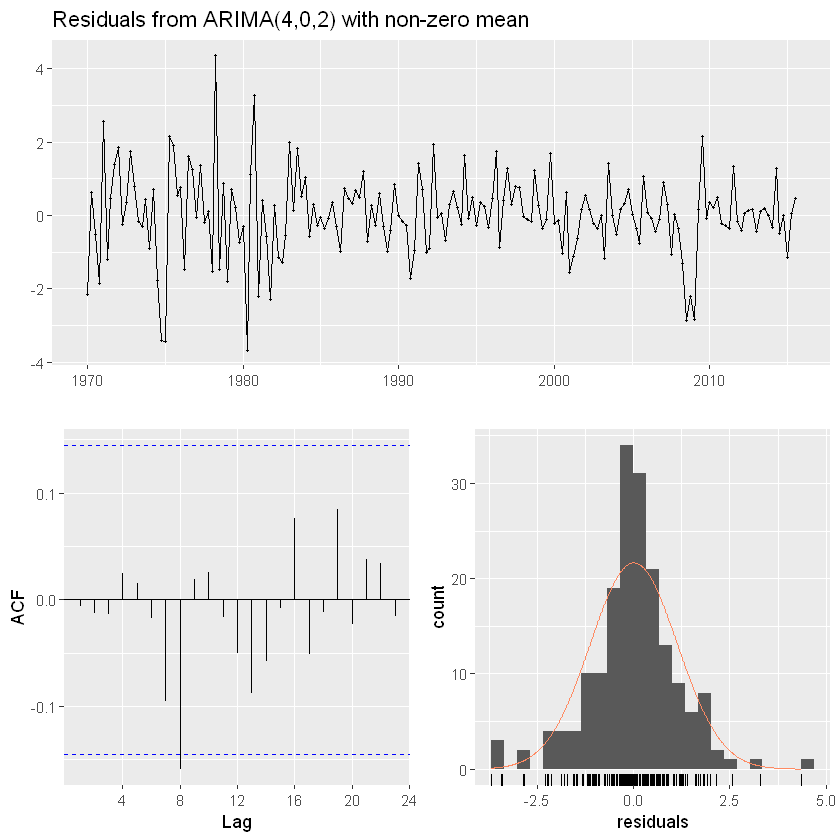

In [249]:
checkresiduals(fit1)

[1] 0.0683743

In [253]:
for0=forecast(fit0,h=4)

In [267]:
mean((for0$mean-prod_test)^2)

[1] 1.168552

In [254]:
for1=forecast(fit1,h=4)

In [266]:
mean((for1$mean-prod_test)^2)



[1] 1.174565

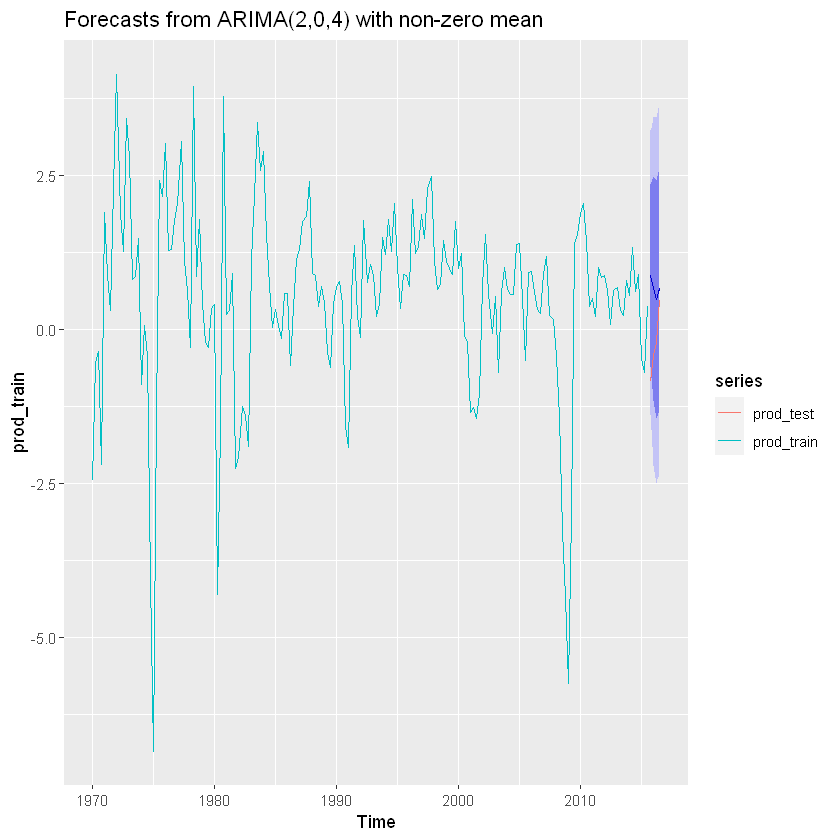

In [269]:
autoplot(for0)+autolayer(for1)+autolayer(prod_train)+autolayer(prod_test)

**The best model is ARMA(2,0,4). We use it to plot 2017**

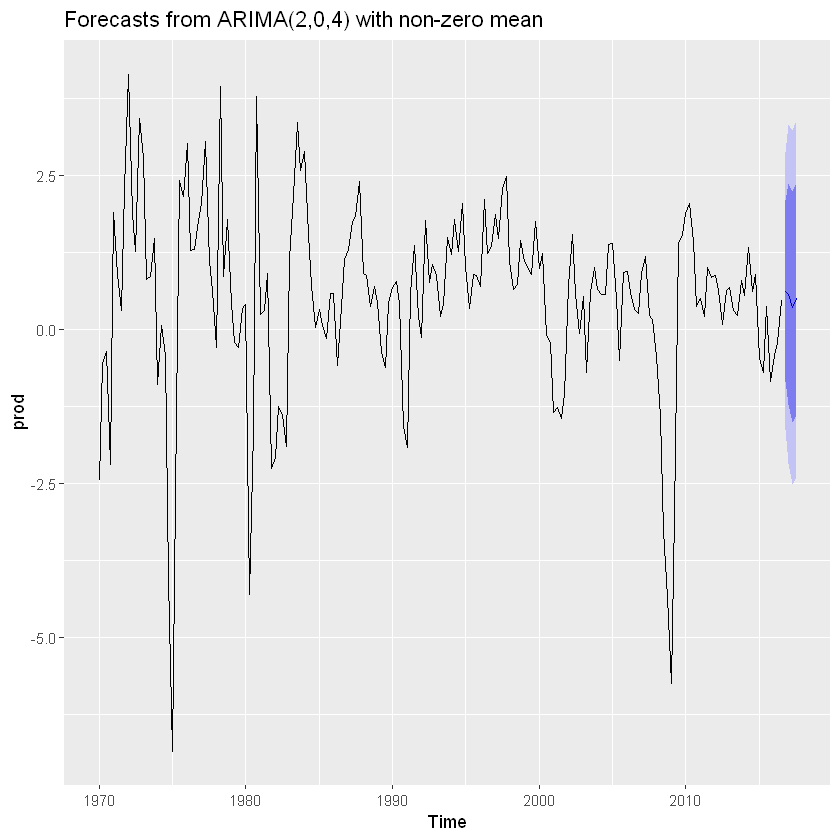

In [270]:
fit_best=Arima(prod,order=c(2,0,4))
autoplot(forecast(fit_best,h=4))


### Exercice closing stock price of Google

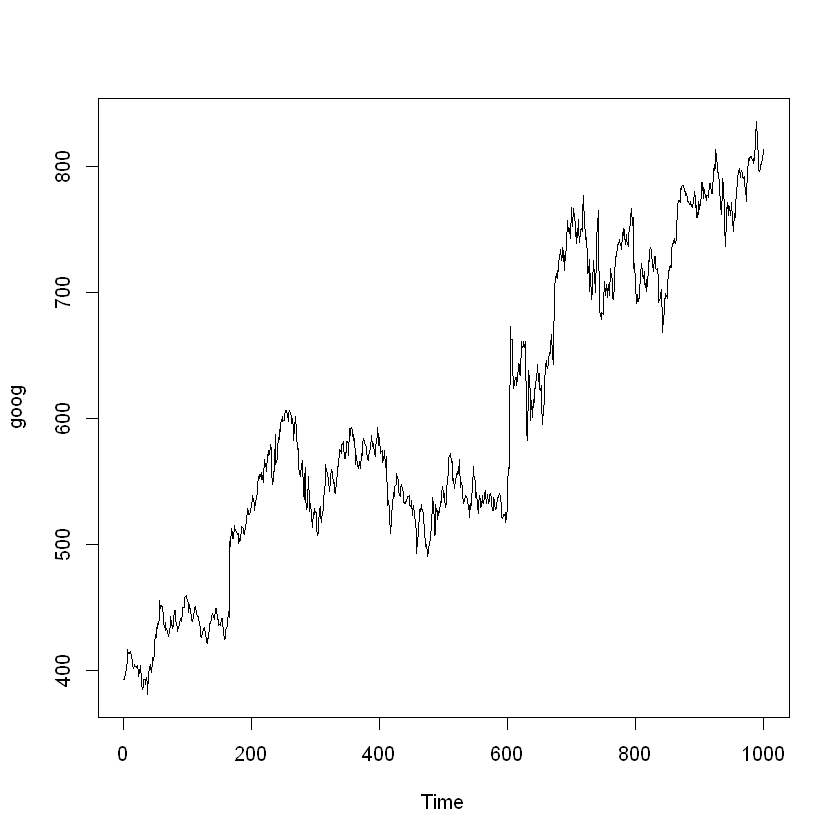

In [271]:
plot(goog)

**First we remove the trend**

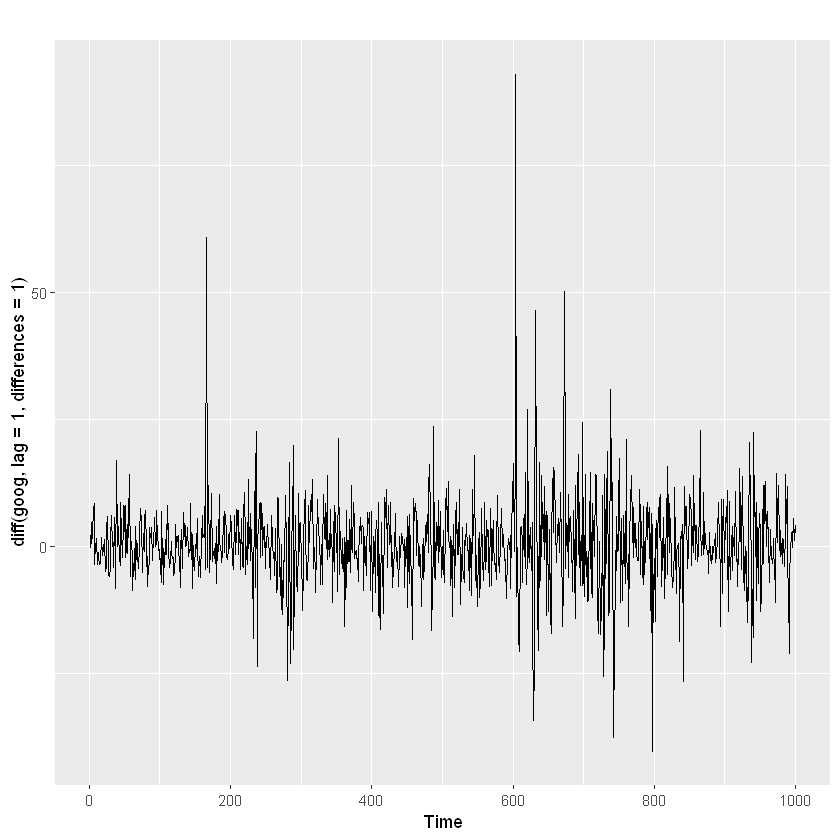

In [273]:
autoplot(diff(goog,lag=1,differences=1))

**No there is no more trend, we can check if we have more then a white noise ?**

In [275]:
goog_diff = diff(goog,lag=1,differences=1)
Box.test(goog_diff,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  goog_diff
X-squared = 13.123, df = 10, p-value = 0.2169


**pvalue is > 0.05, we reject the fact the this is white noise. Concfirm with autocorrelation**

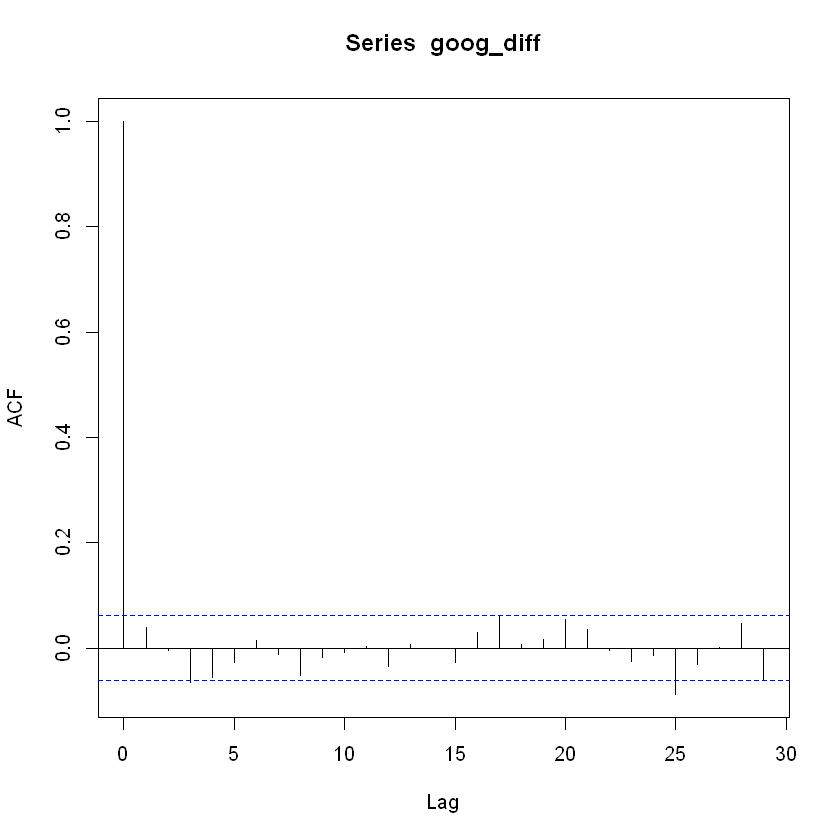

In [276]:
acf(goog_diff)

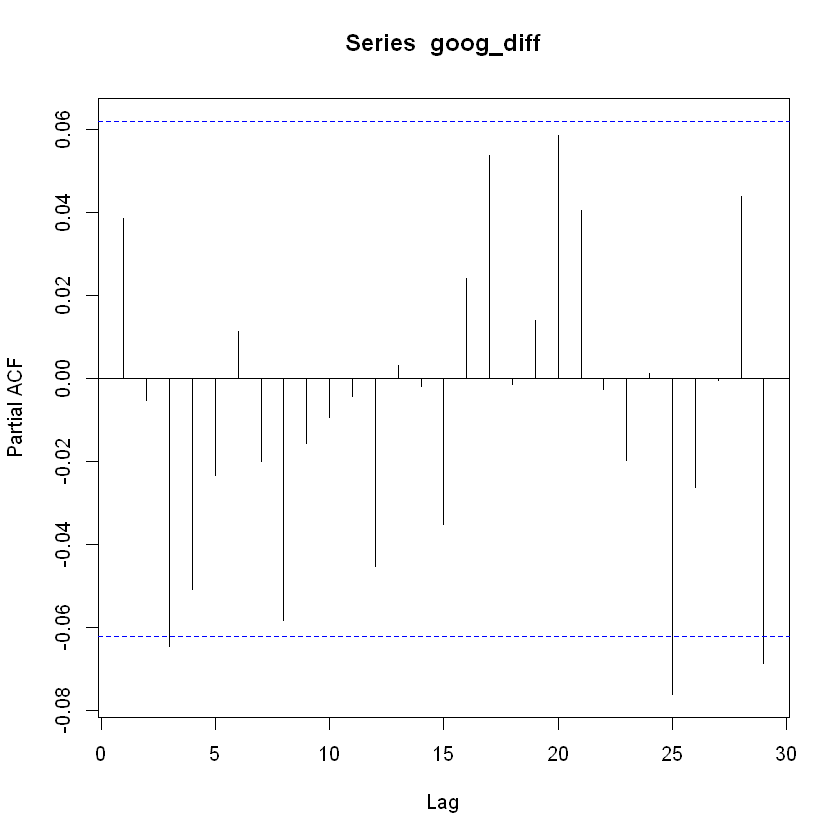

In [277]:
pacf(goog_diff)

### Exercice with Covid Data

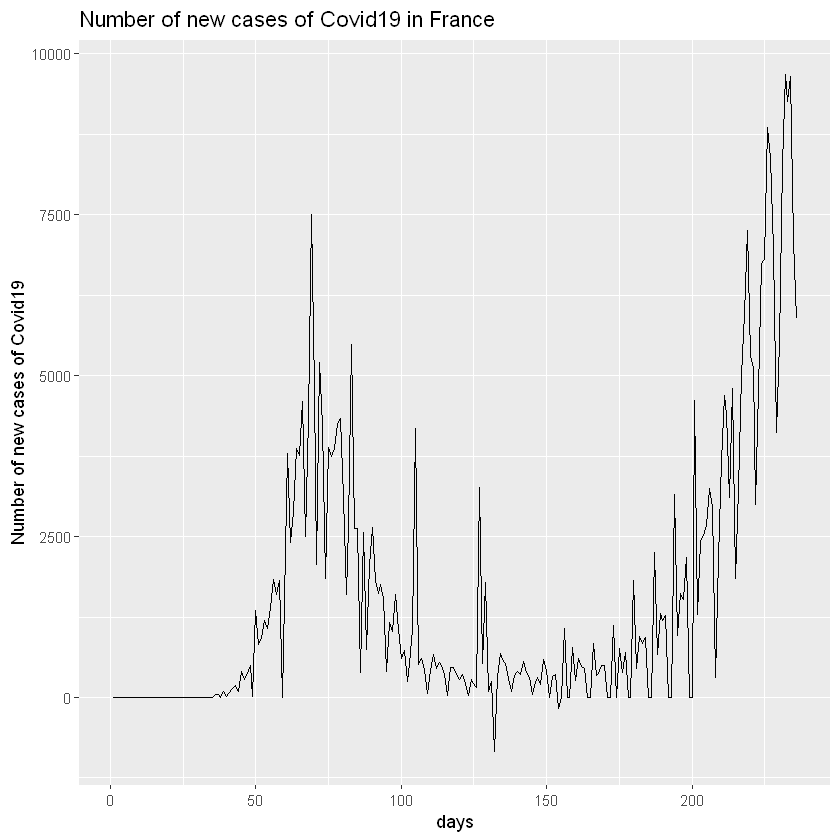

In [286]:
covid19 = read.csv("WHO-COVID-19-global-data.csv")
covid19_F=covid19[covid19$Country=="France",]
covid19_F_nc=ts(covid19_F$New_cases)
covid19_F_nd=ts(covid19_F$New_deaths)
autoplot(covid19_F_nc) +
ggtitle('Number of new cases of Covid19 in France')+ xlab('days')+
ylab('Number of new cases of Covid19')

**Remove the trend**

In [288]:
covid19_F_nc_wt=diff(covid19_F_nc,lag=1,differences=1)
covid19_F_nd_wt=diff(covid19_F_nd,lag=1,differences=1)

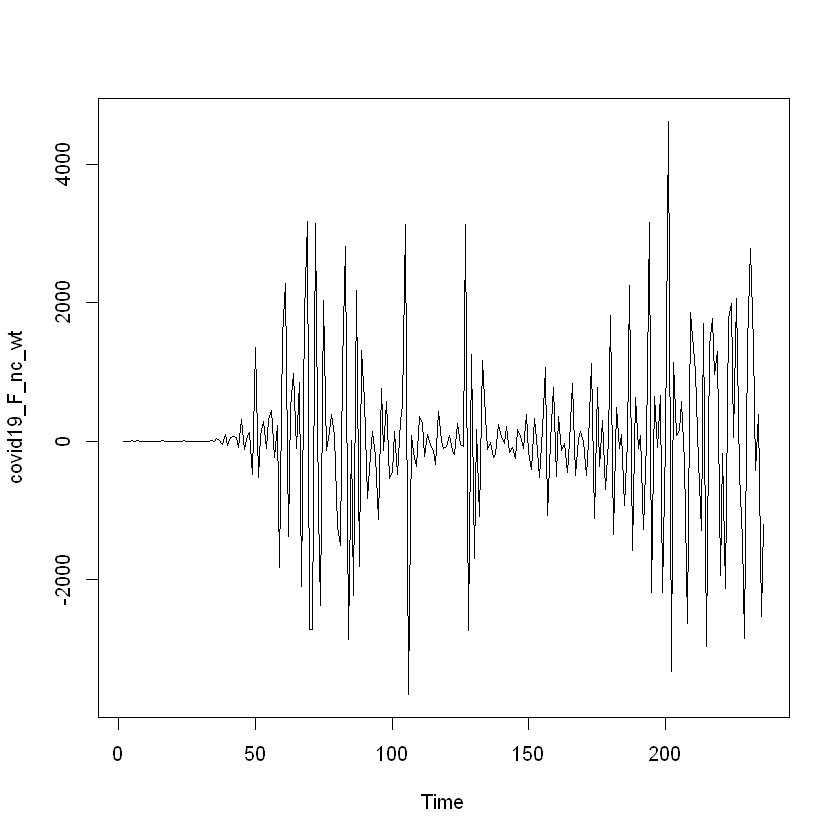

In [289]:
plot(covid19_F_nc_wt)

**Test if it is white noise ?**

In [290]:
Box.test(covid19_F_nc_wt,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  covid19_F_nc_wt
X-squared = 56.421, df = 10, p-value = 1.712e-08


In [291]:
Box.test(covid19_F_nd_wt,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  covid19_F_nd_wt
X-squared = 113.52, df = 10, p-value < 2.2e-16


**Not white noise : look for ARMA function**

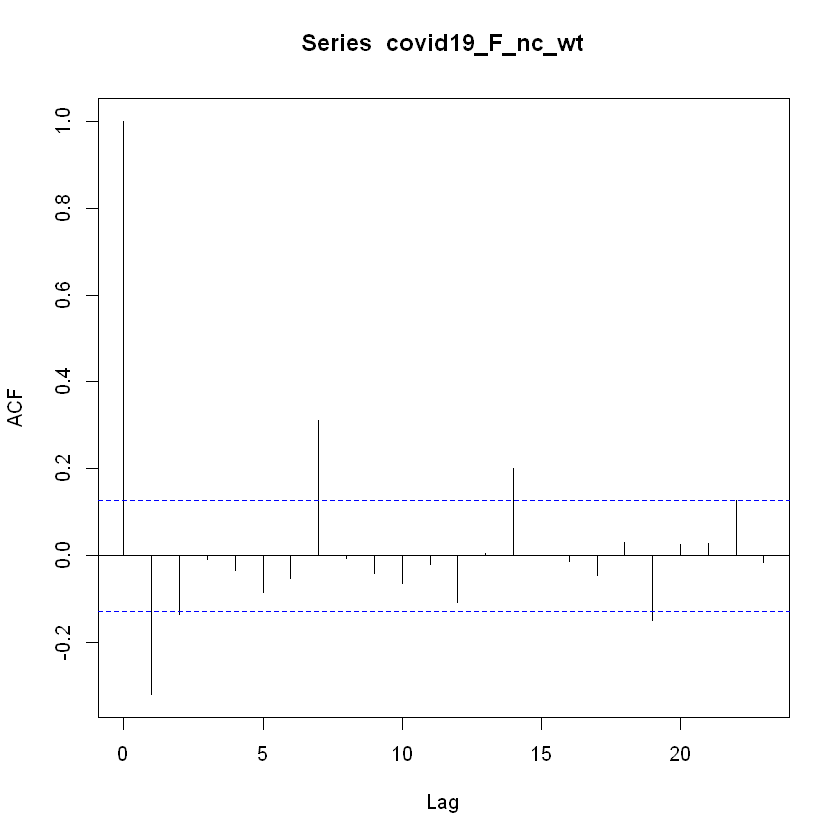

In [292]:
acf(covid19_F_nc_wt)

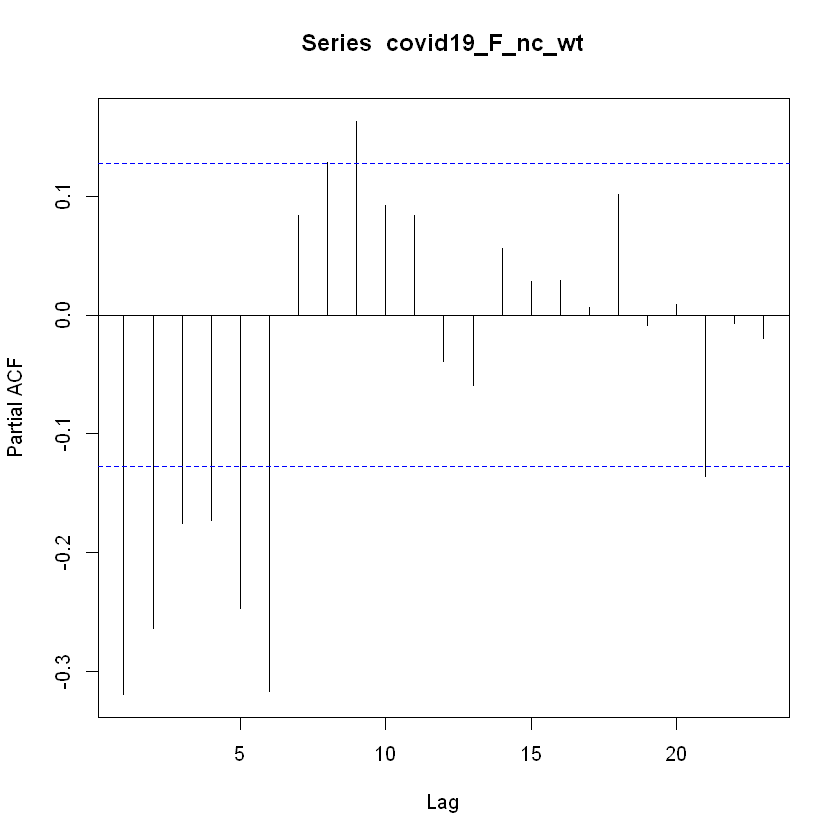

In [293]:
pacf(covid19_F_nc_wt)

In [304]:
t_aic=c()
t_pvalue=c()
for (i in 0:6) {
    for (j in 0:2) {
        fit0=Arima(covid19_F_nc_wt,order=c(i,0,j))
        res=checkresiduals(fit0,plot=FALSE)
        print(i)
        print(j)
        if (res$p.value > 0.05) {
            t_aic[(j+1)+i*13] = fit0$aic
            t_pvalue[(j+1)+i*13] = res$p.value
        }
    }
}




	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 56.421, df = 9, p-value = 6.522e-09

Model df: 1.   Total lags used: 10

[1] 0
[1] 0

	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 75.269, df = 8, p-value = 4.357e-13

Model df: 2.   Total lags used: 10

[1] 0
[1] 1

	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with non-zero mean
Q* = 48.93, df = 7, p-value = 2.341e-08

Model df: 3.   Total lags used: 10

[1] 0
[1] 2

	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 65.911, df = 8, p-value = 3.186e-11

Model df: 2.   Total lags used: 10

[1] 1
[1] 0

	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 52.496, df = 7, p-value = 4.66e-09

Model df: 3.   Total lags used: 10

[1] 1
[1] 1

	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 51.041, df = 6, p-value = 2.906e-09

Model df: 4.   Total lags used: 10

[1] 1
[1] 2

	Ljung-Box test

data:  Resid

ERROR: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean, : non-stationary AR part from CSS



	Ljung-Box test

data:  Residuals from ARIMA(4,0,2) with non-zero mean
Q* = 16.671, df = 3, p-value = 0.0008258

Model df: 7.   Total lags used: 10



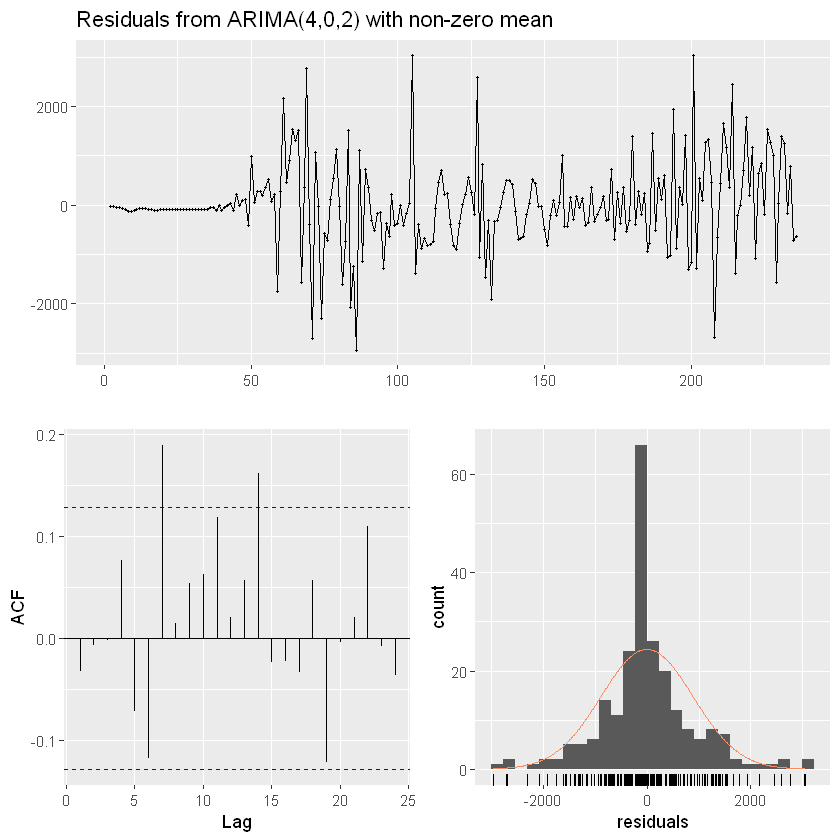

In [306]:
        fit0=Arima(covid19_F_nc_wt,order=c(4,0,2))
        res=checkresiduals(fit0)

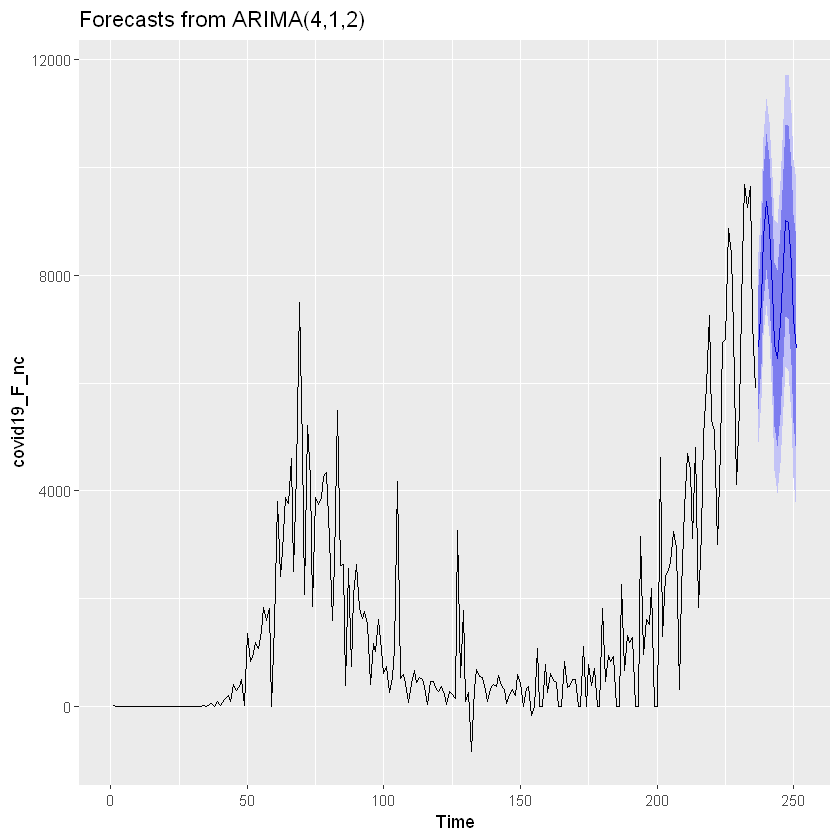

In [310]:
fit0=Arima(covid19_F_nc,order=c(4,1,2))
for0=forecast(fit0,15)
autoplot(for0)

In [311]:
for0$mean

A Time Series:
 [1] 6657.196 7540.378 8717.755 9366.810 8859.607 7717.020 6708.580 6454.055
 [9] 7115.249 8216.618 9007.775 8985.067 8196.599 7192.157 6643.068

**with ARMA(4,1,2) : 6657.195733427947540.378047634028717.754996349069366.809869008238859.607460202837717.020024103946708.580292084656454.055168673987115.249432923078216.618175962649007.775259320988985.066551277288196.598692345387192.156505691136643.06764731932**

**See the result with exponential smmothing**

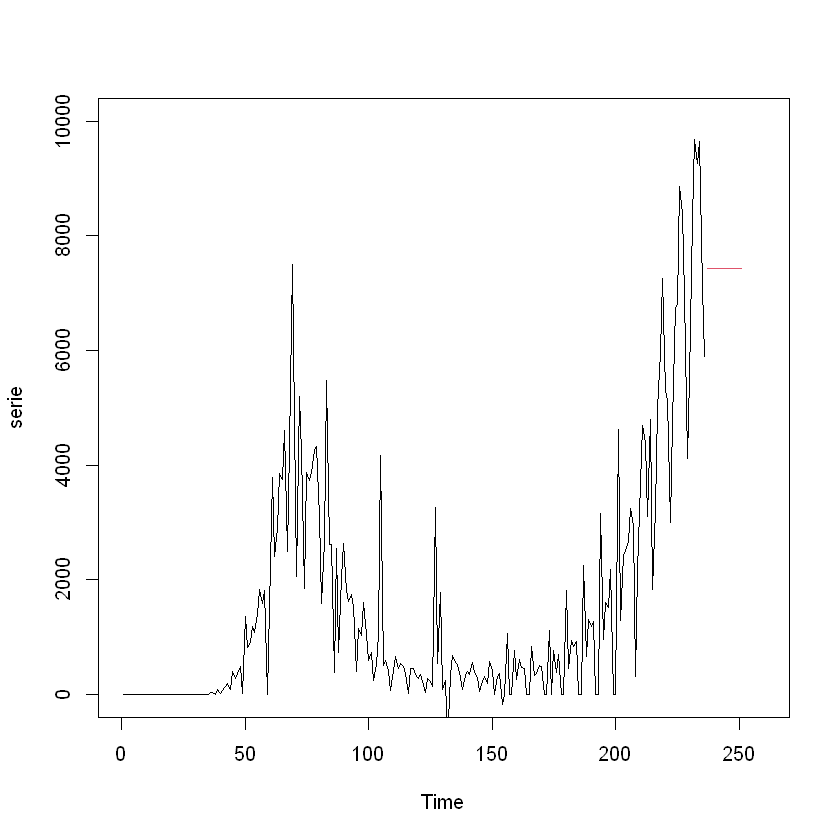

In [319]:
LES=HoltWinters(covid19_F_nc,alpha=NULL,beta=FALSE,gamma=FALSE)
plot(serie,xlim=c(1,260),ylim=c(0,10000))
pred<-predict(LES,n.ahead=15)
lines(pred,col=2)

In [321]:
print(pred)

Time Series:
Start = 237 
End = 251 
Frequency = 1 
          fit
 [1,] 7428.15
 [2,] 7428.15
 [3,] 7428.15
 [4,] 7428.15
 [5,] 7428.15
 [6,] 7428.15
 [7,] 7428.15
 [8,] 7428.15
 [9,] 7428.15
[10,] 7428.15
[11,] 7428.15
[12,] 7428.15
[13,] 7428.15
[14,] 7428.15
[15,] 7428.15


**prediction : 7428**

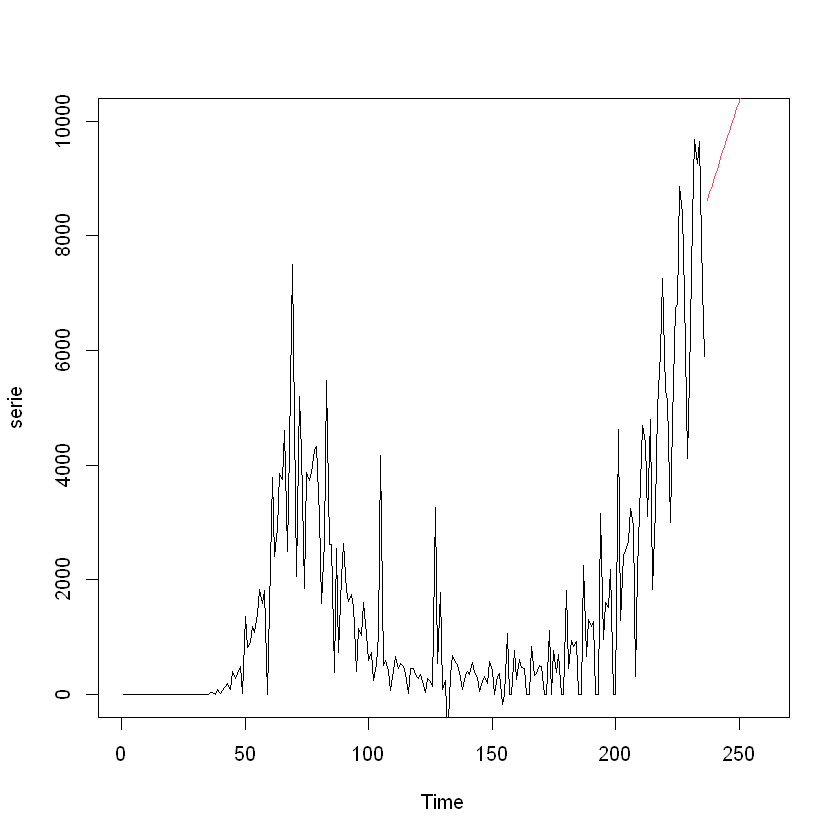

In [323]:
LES=HoltWinters(covid19_F_nc,alpha=NULL,beta=NULL,gamma=FALSE)
plot(serie,xlim=c(1,260),ylim=c(0,10000))
pred<-predict(LES,n.ahead=15)
lines(pred,col=2)

In [330]:
print(pred)

Time Series:
Start = 237 
End = 251 
Frequency = 1 
            fit
 [1,]  8623.026
 [2,]  8755.993
 [3,]  8888.961
 [4,]  9021.928
 [5,]  9154.895
 [6,]  9287.863
 [7,]  9420.830
 [8,]  9553.798
 [9,]  9686.765
[10,]  9819.732
[11,]  9952.700
[12,] 10085.667
[13,] 10218.634
[14,] 10351.602
[15,] 10484.569


           fit
 [1,]  8623.026
 [2,]  8755.993
 [3,]  8888.961
 [4,]  9021.928
 [5,]  9154.895
 [6,]  9287.863
 [7,]  9420.830
 [8,]  9553.798
 [9,]  9686.765
[10,]  9819.732
[11,]  9952.700
[12,] 10085.667
[13,] 10218.634
[14,] 10351.602
[15,] 10484.569